In [1]:
# General
import os
import glob

# Display
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.gridspec import GridSpec
import matplotlib.cm as cm
# import seaborn as sns

# Data treatment
import xarray as xr
import numpy as np
# from scipy.interpolate import griddata
# from scipy.optimize import curve_fit
# import pandas as pd 
from tqdm import tqdm
# import ephem

# Default parameters
mpl.rcParams.update({'font.size': 18})
mpl.rcParams['figure.figsize'] = (15, 10)
mpl.rcParams['axes.facecolor'] = 'white'
mpl.rcParams['figure.facecolor'] = 'white'

In [2]:
PTHS = {
    'sar_pth': '/home/arthur/data/temp/dsg.nc',
}

### Open data
dsg  = xr.open_dataset(PTHS['sar_pth'])

In [3]:
### FILTERS
cond = (
    (dsg.center_quality_flag < 2) & 
    (dsg.percent_outside < 50) & 
    (dsg.percent_rmx_inside == 1) &
    (abs(dsg.lat) < 30) & 
    (dsg.rmx < 100000) & 
    (dsg.vmx > 33)
)
d    = dsg.where(cond, drop=True)
print(len(d.time))

332


In [4]:
# By basin
da = d.where(d.basin == 'al', drop=True)
dc = d.where(d.basin == 'cp', drop=True)
de = d.where(d.basin == 'ep', drop=True)
di = d.where(d.basin == 'io', drop=True)
ds = d.where(d.basin == 'sh', drop=True)
dw = d.where(d.basin == 'wp', drop=True)

vmx


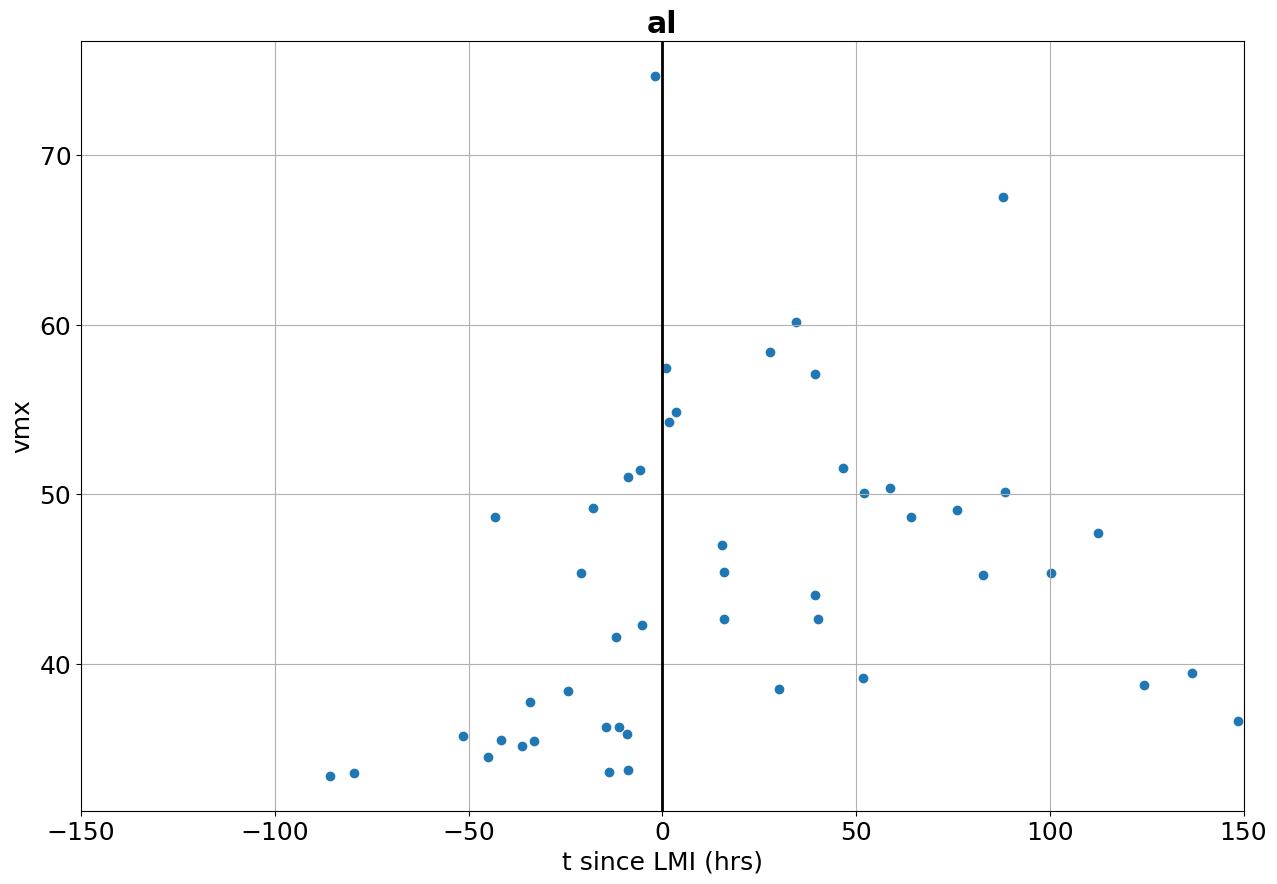

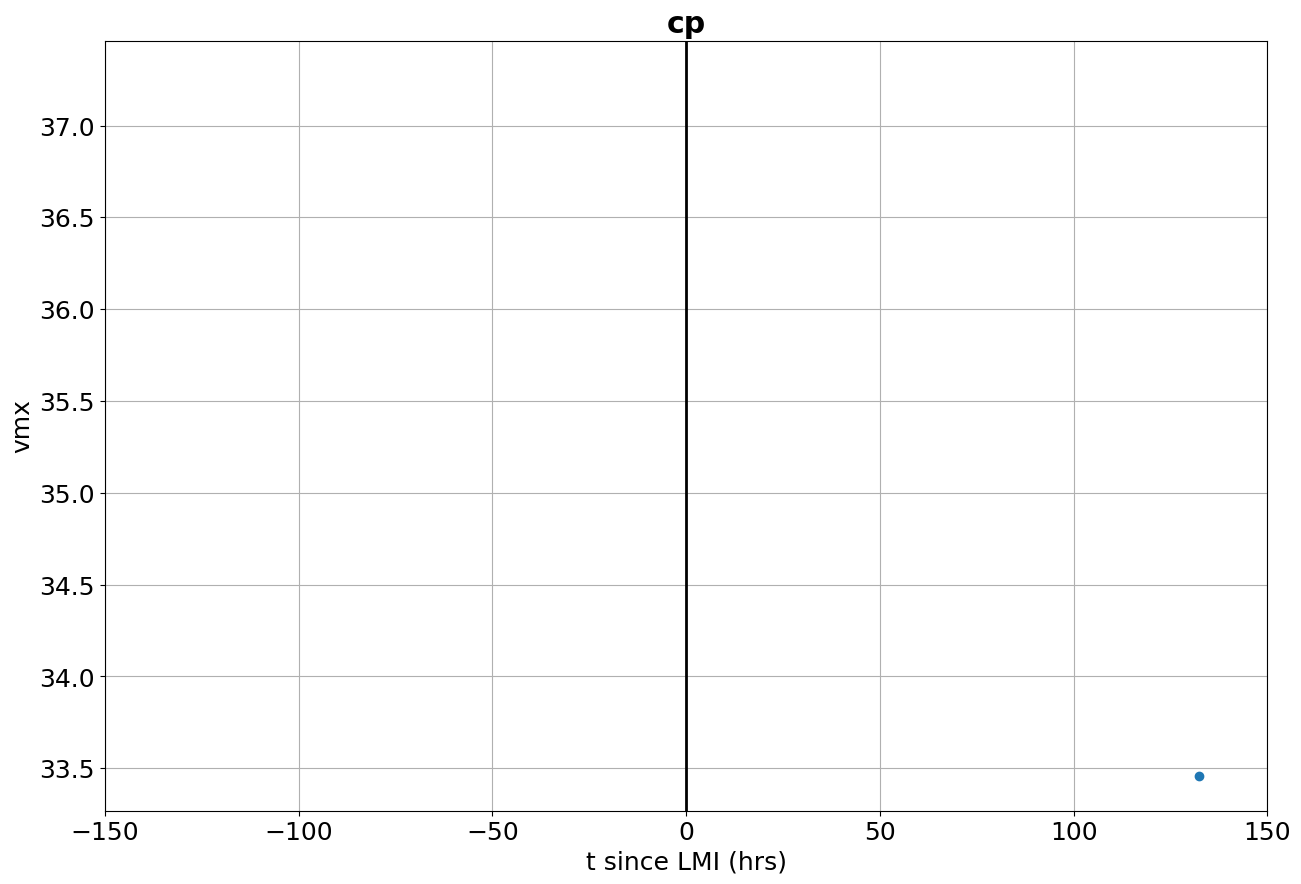

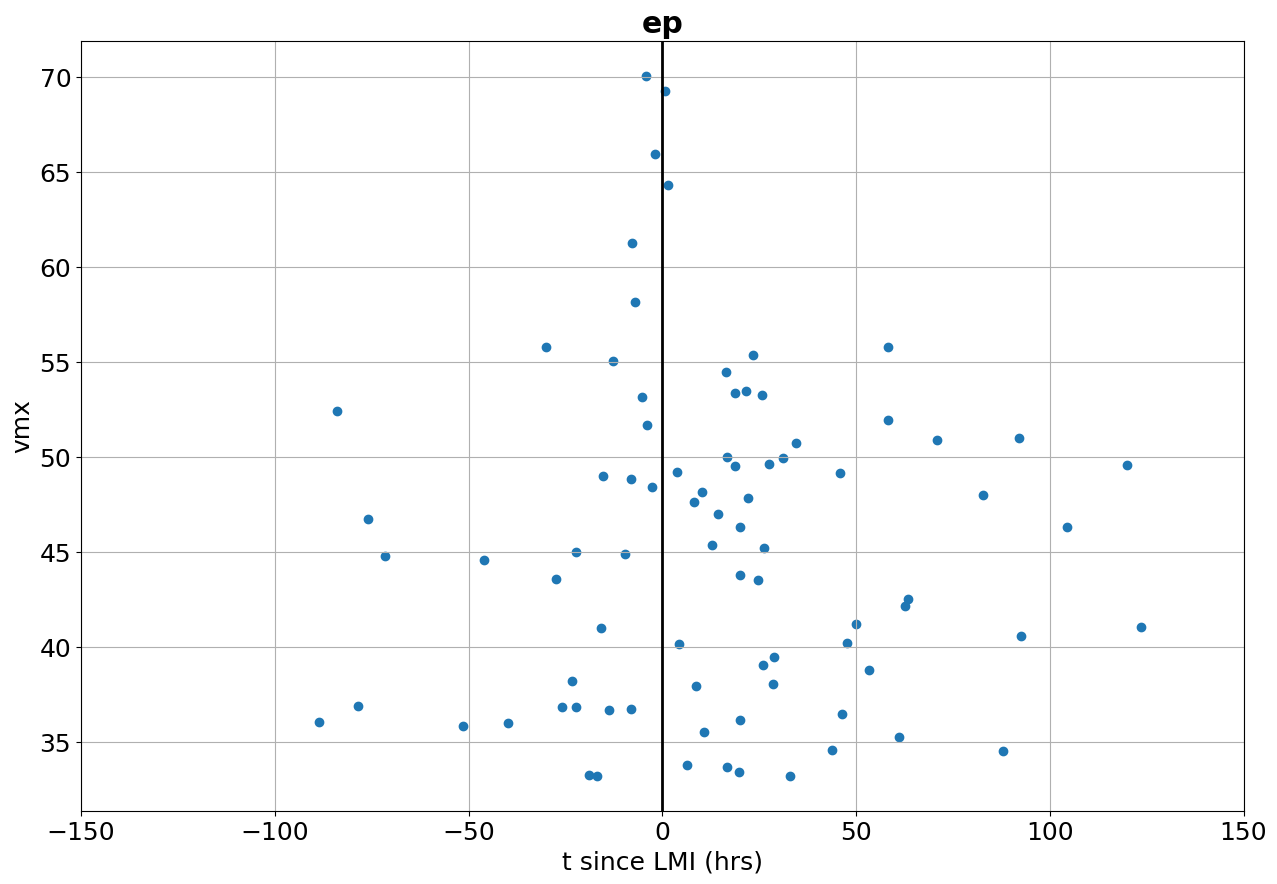

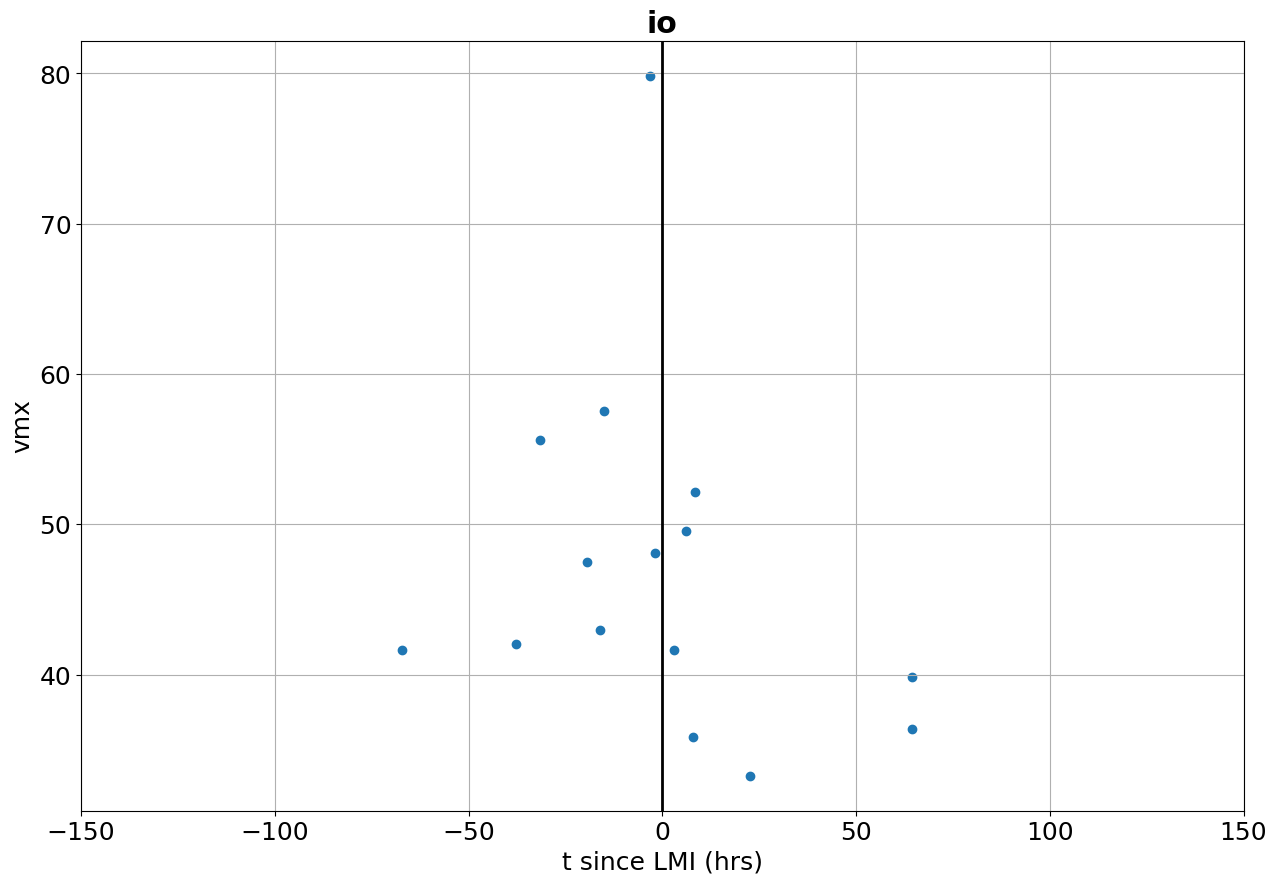

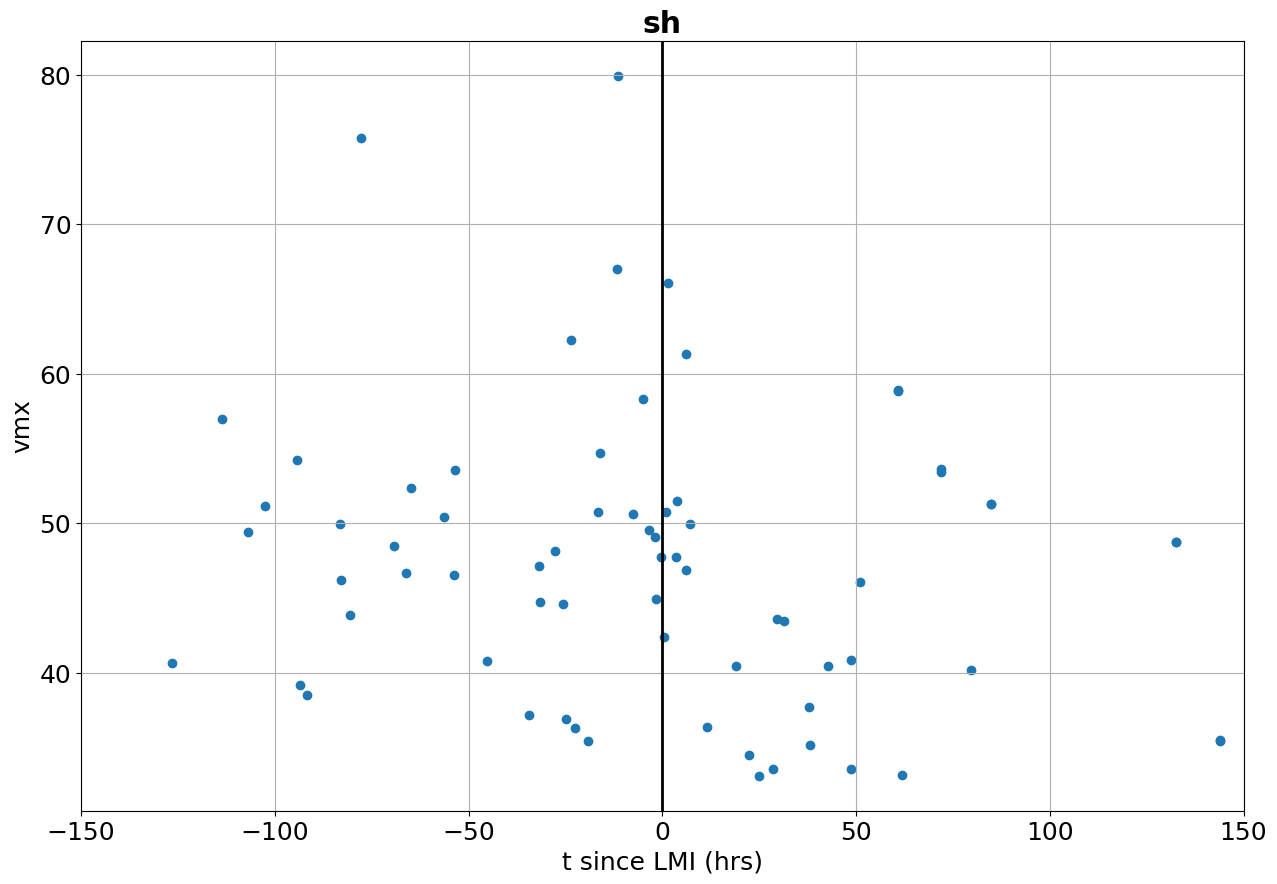

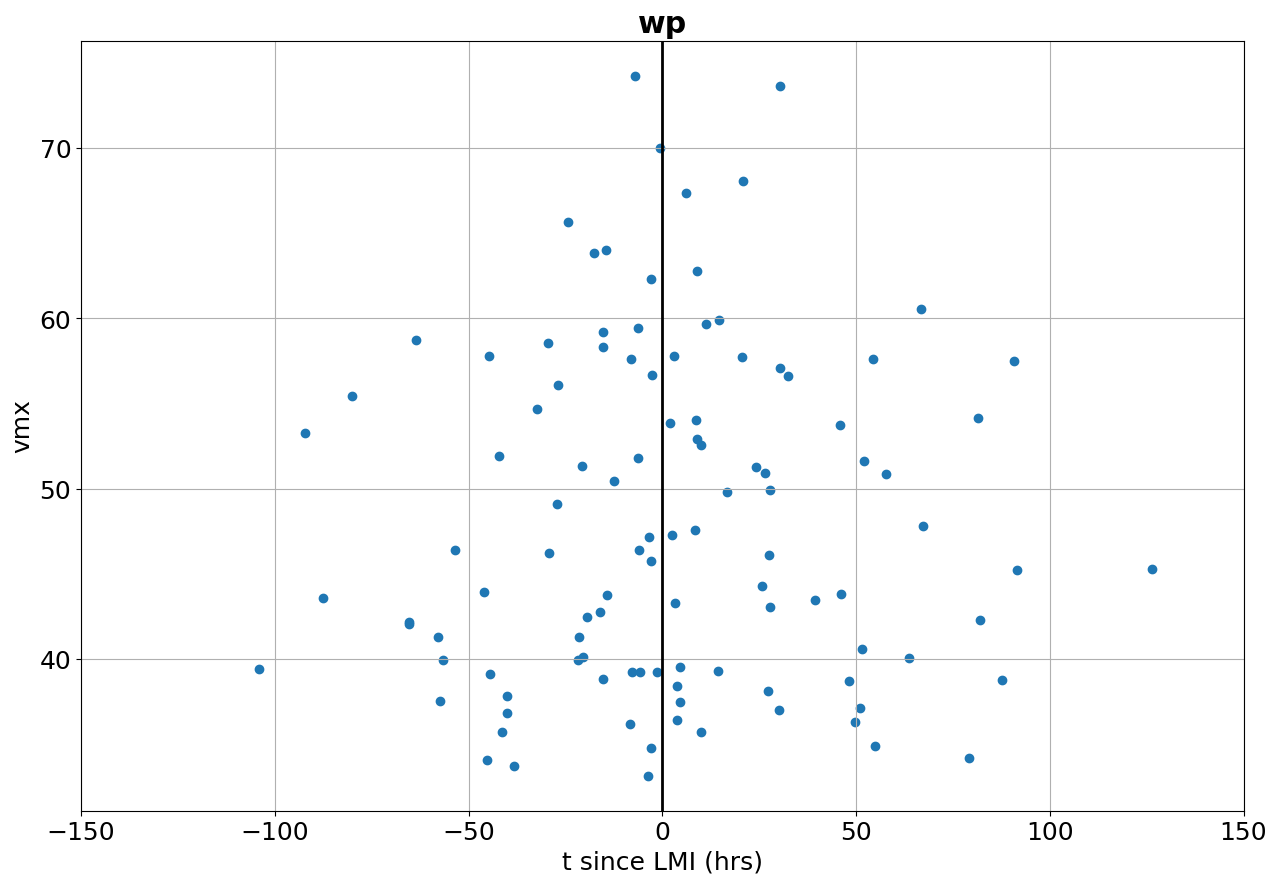

rmx


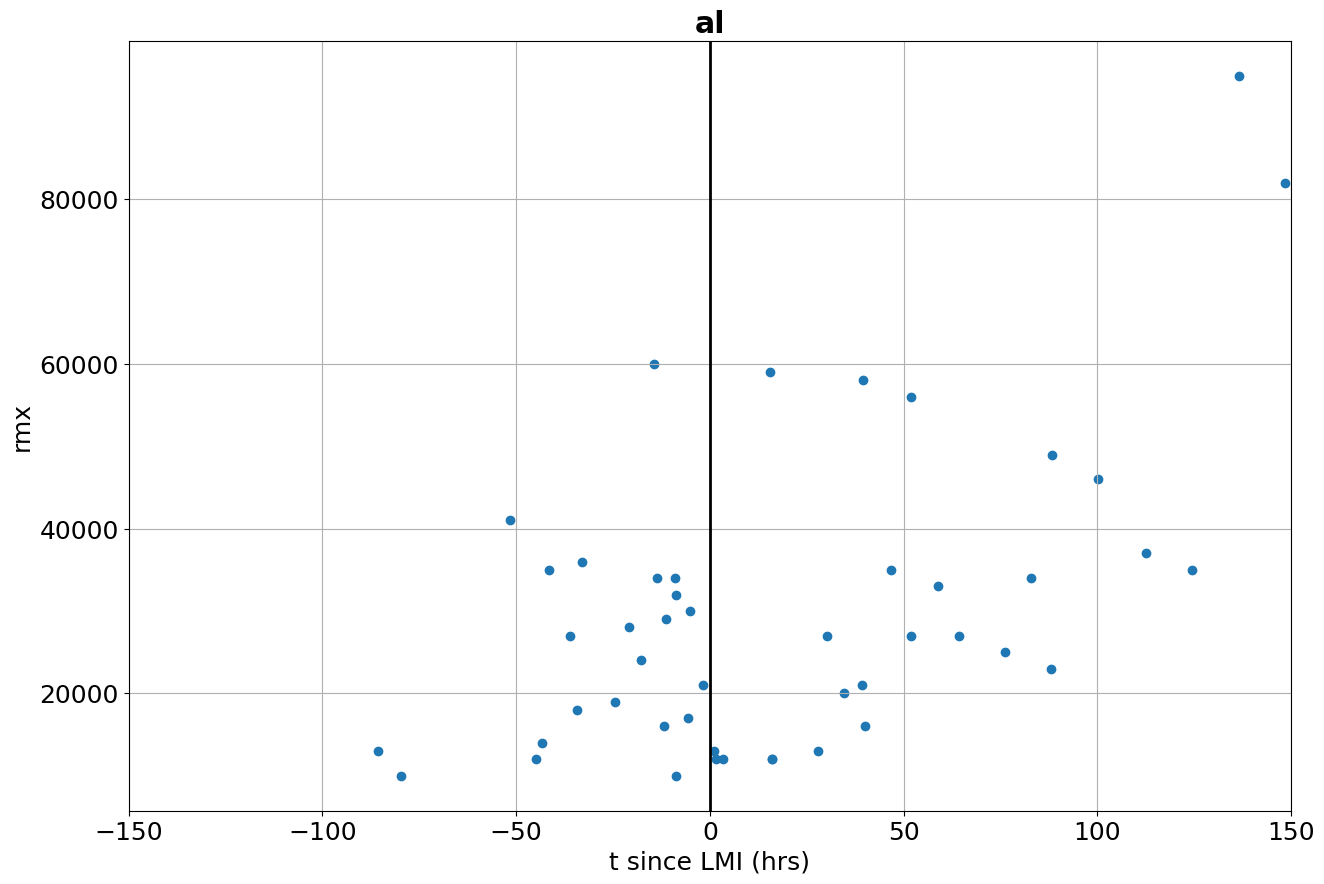

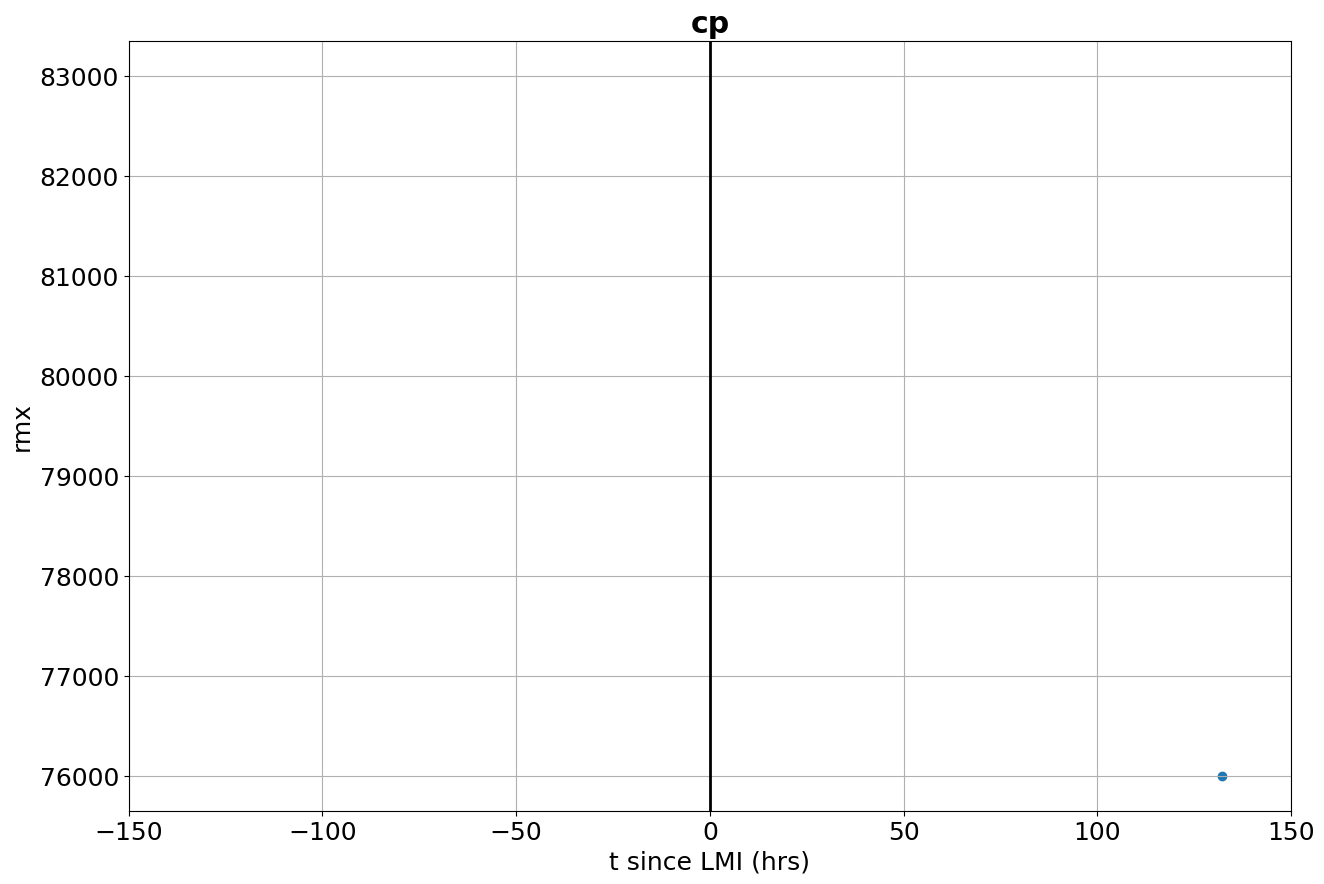

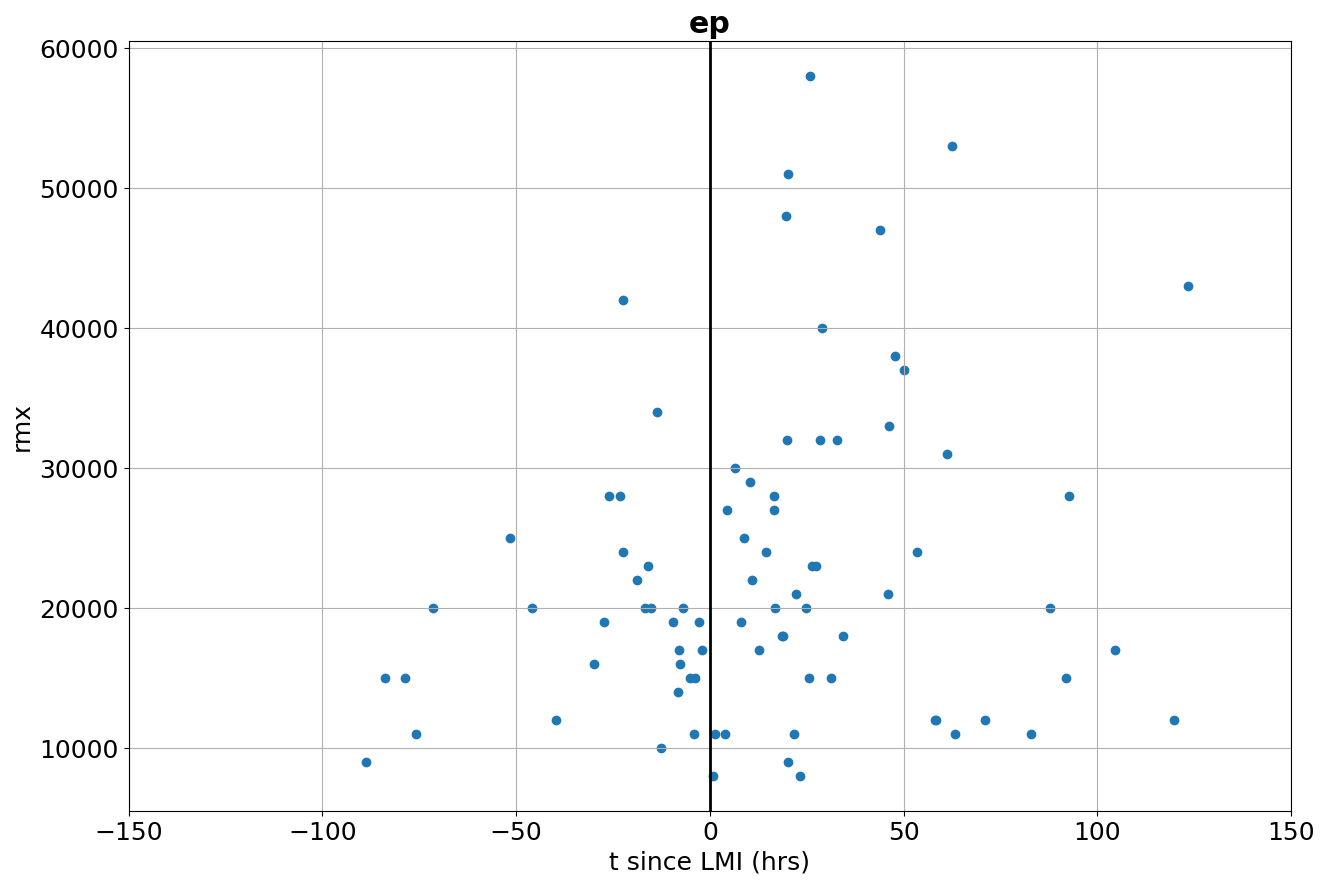

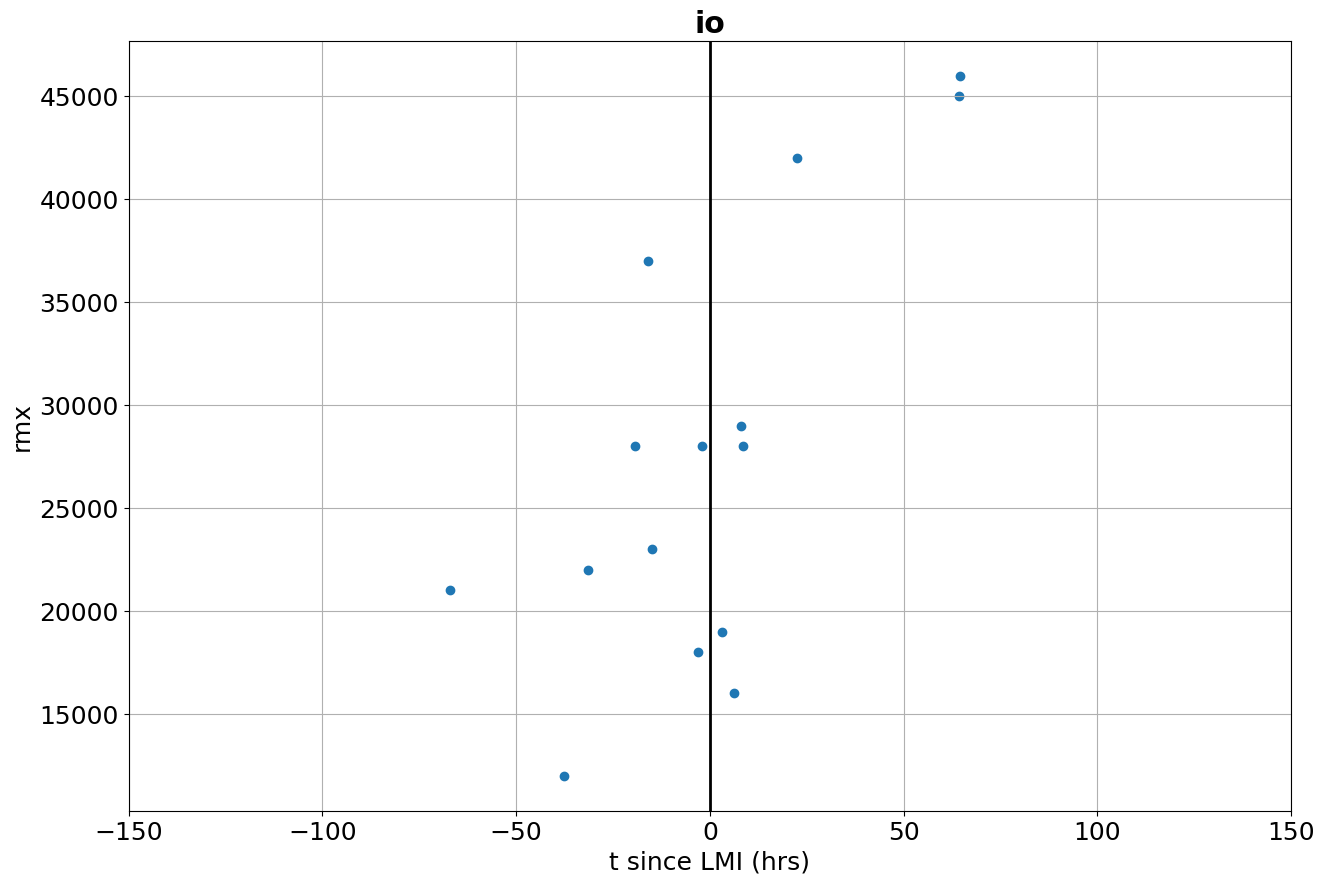

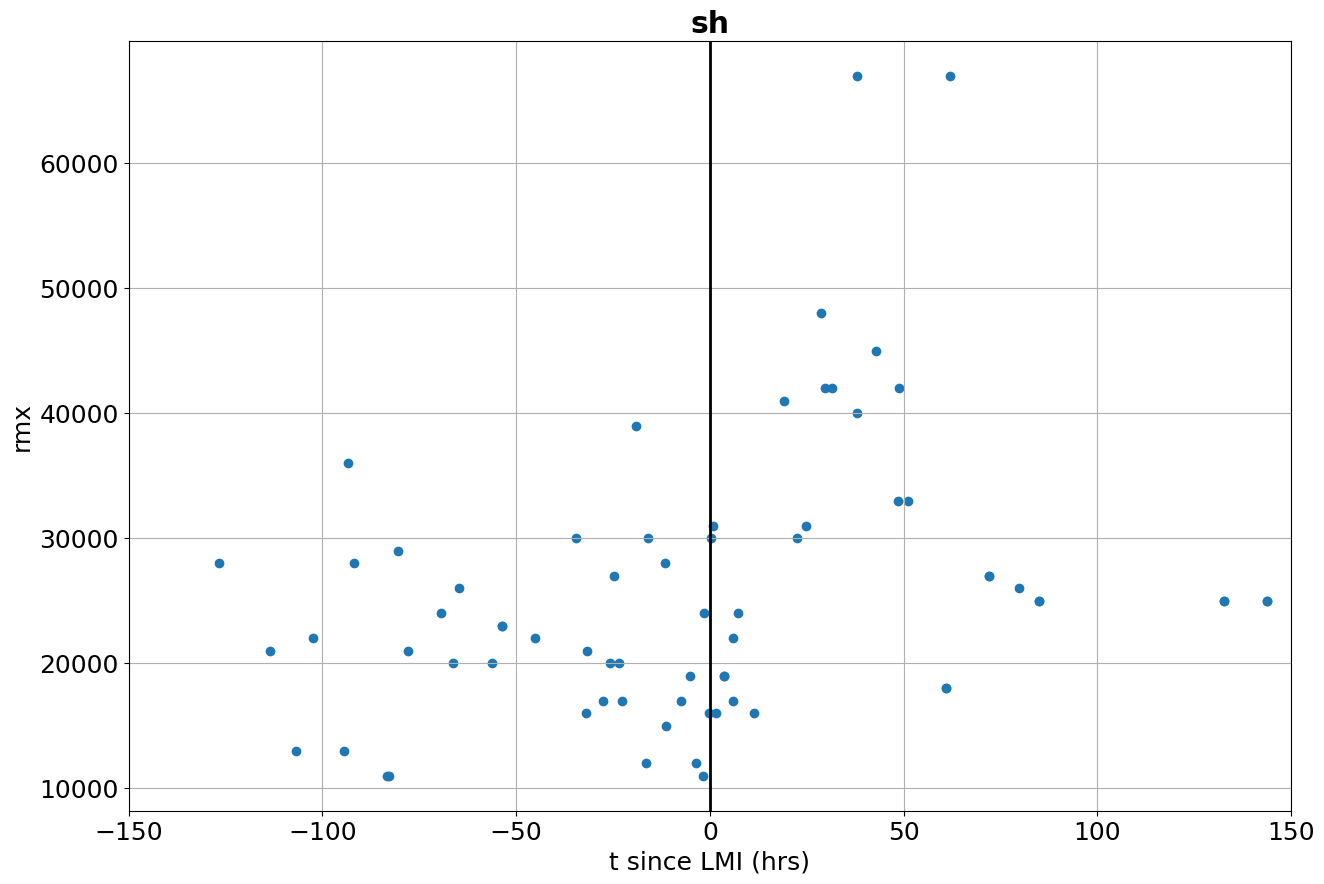

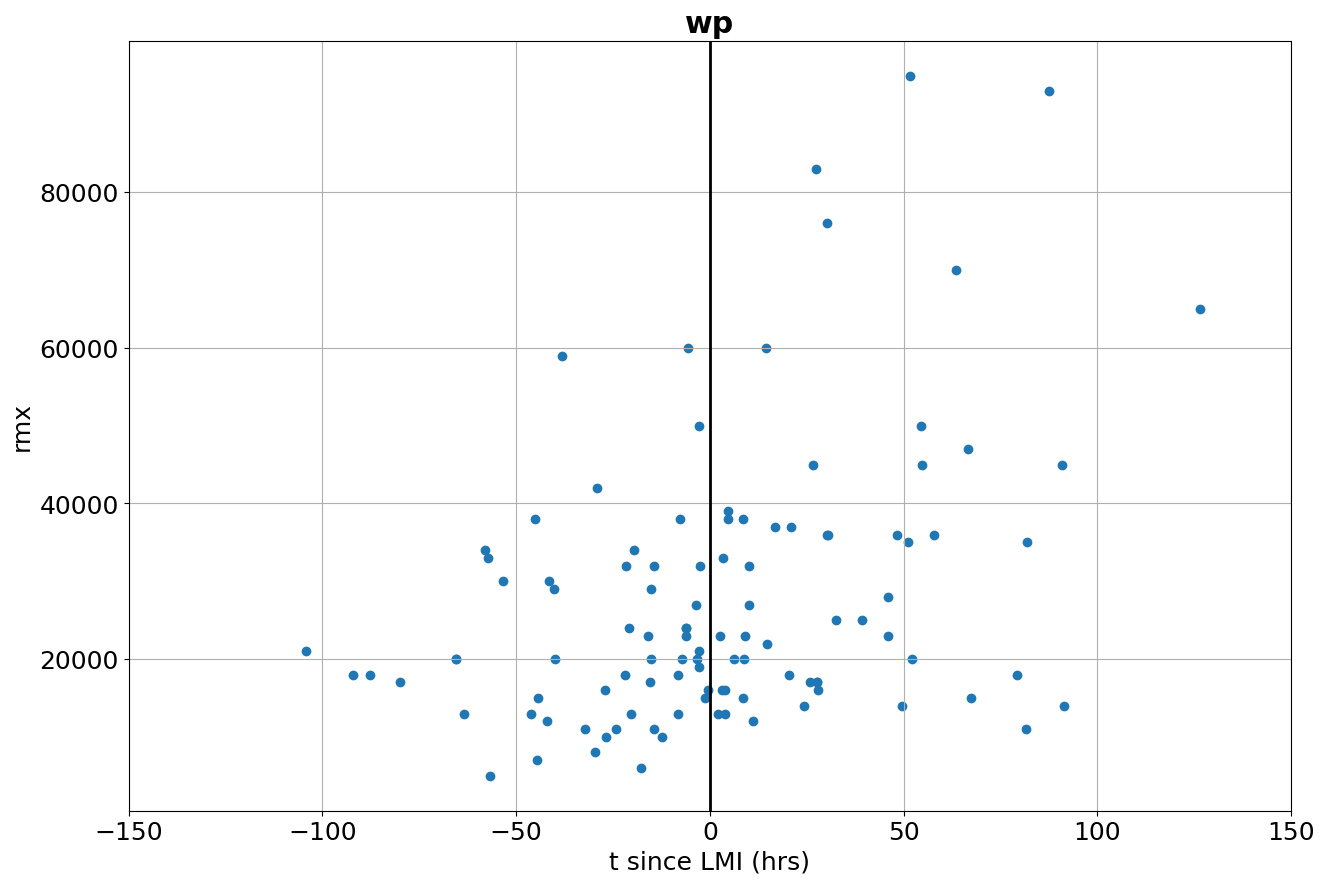

fcor


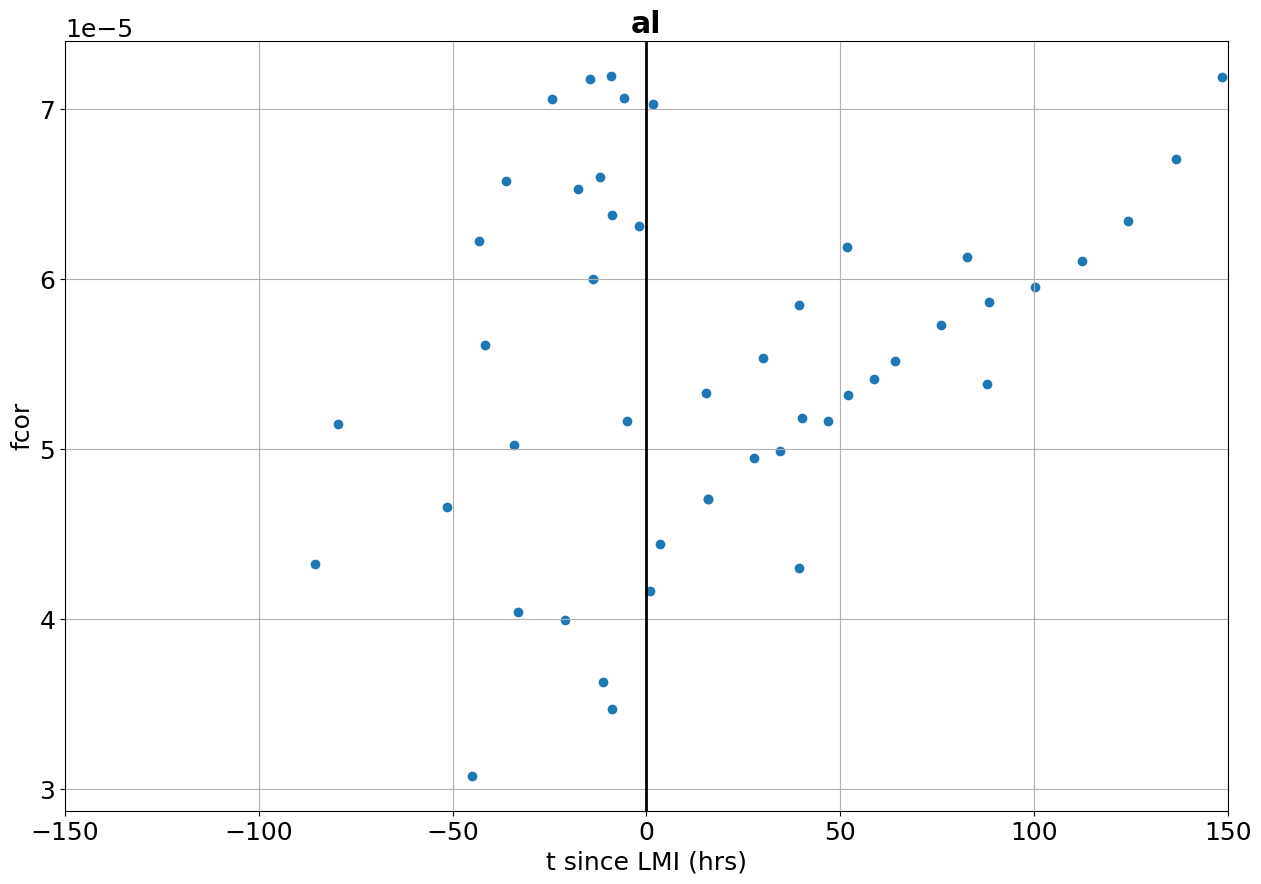

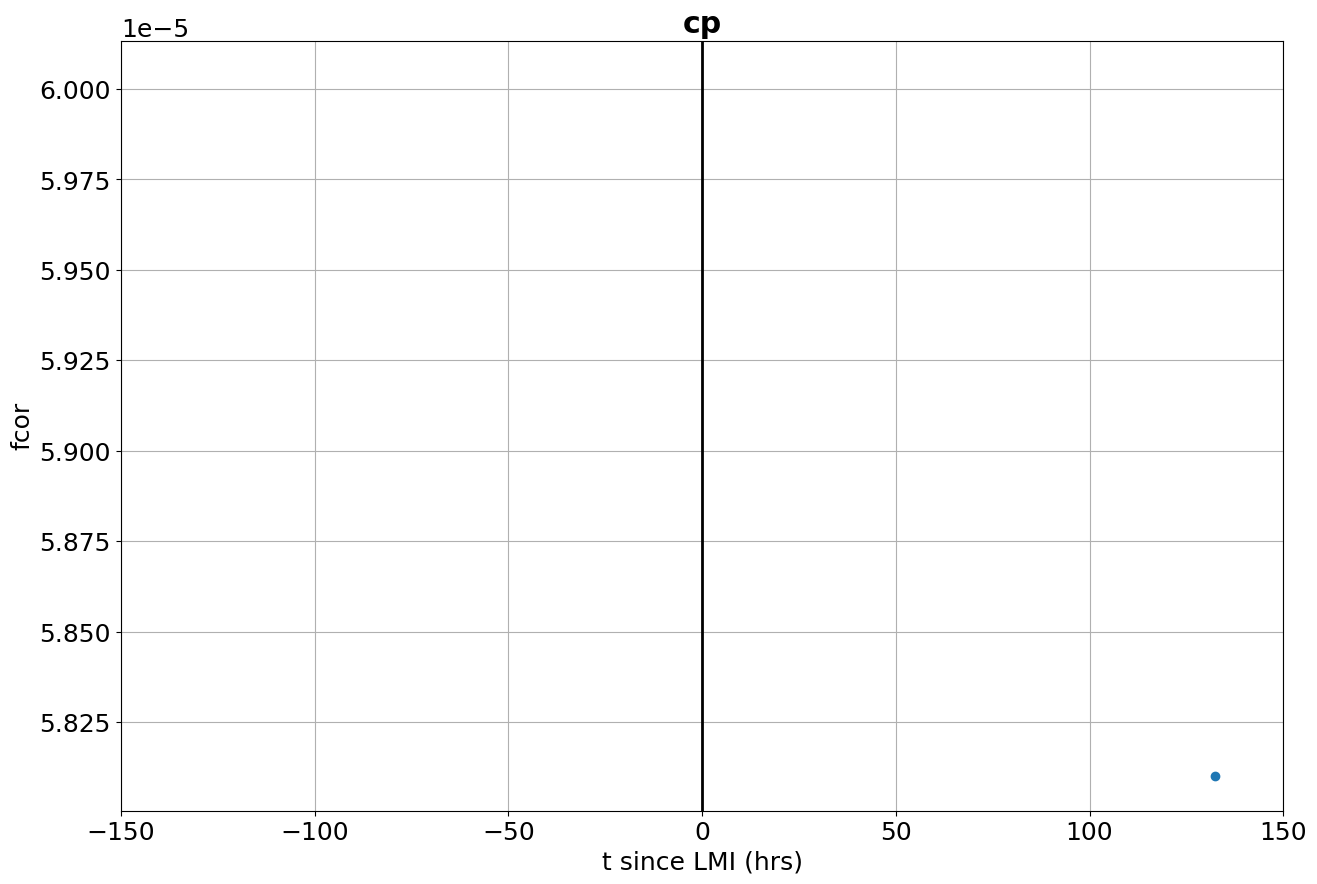

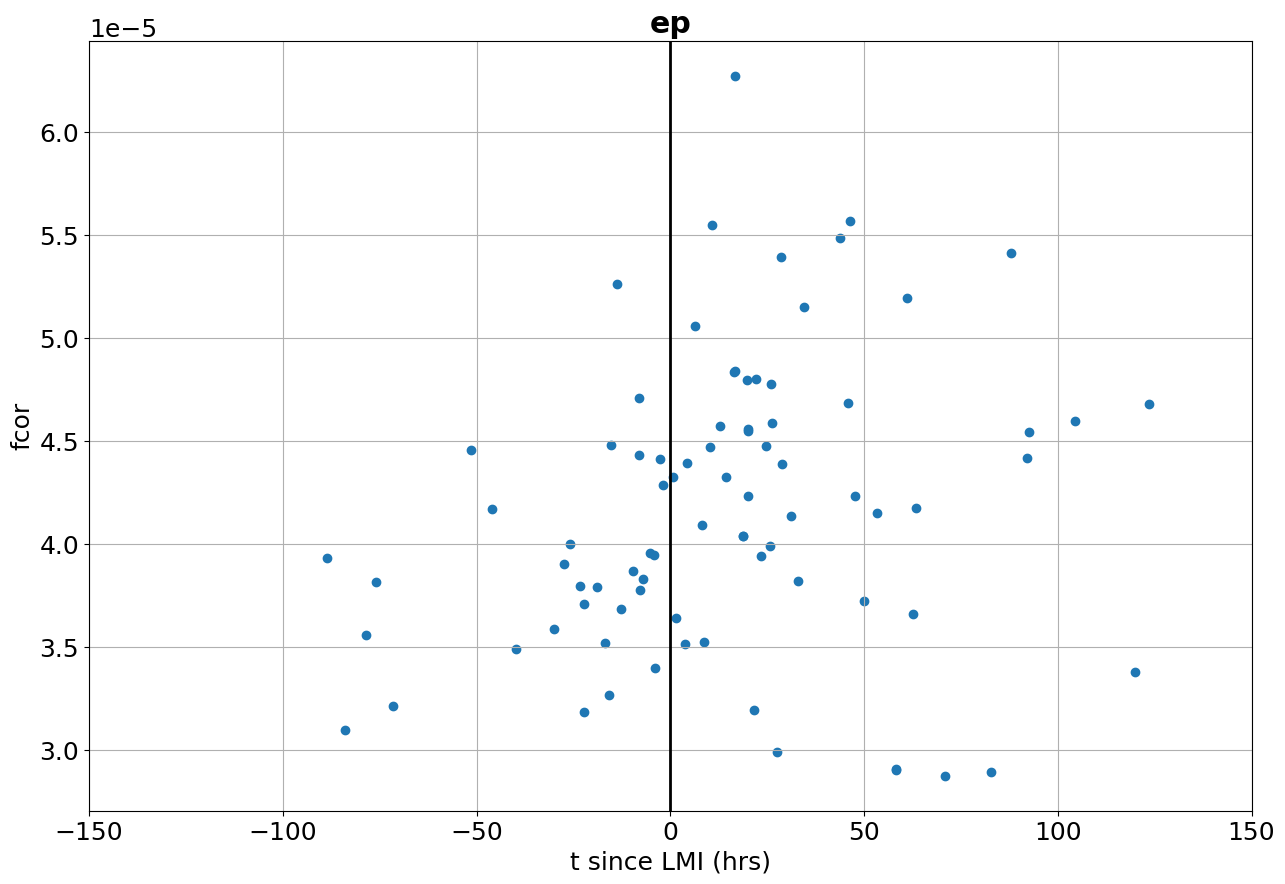

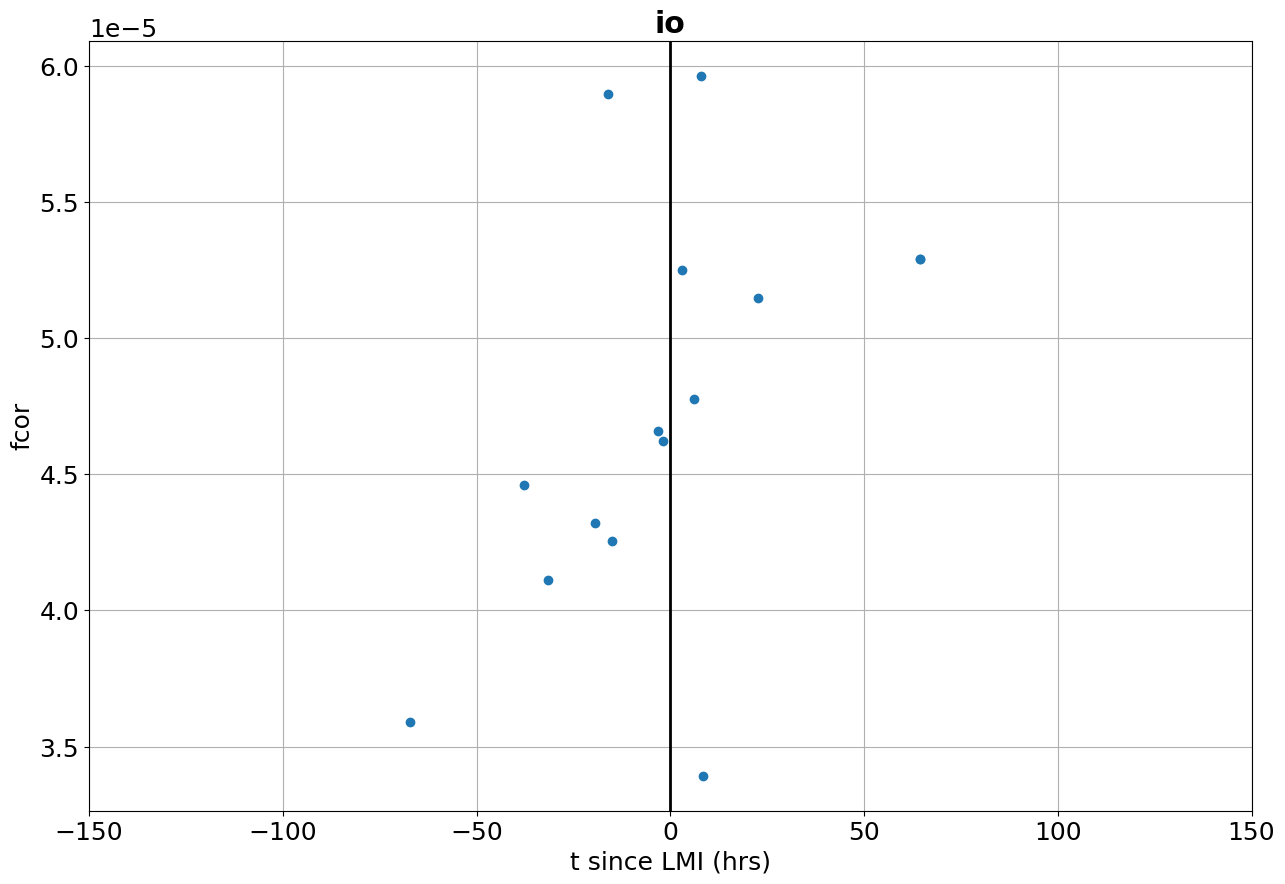

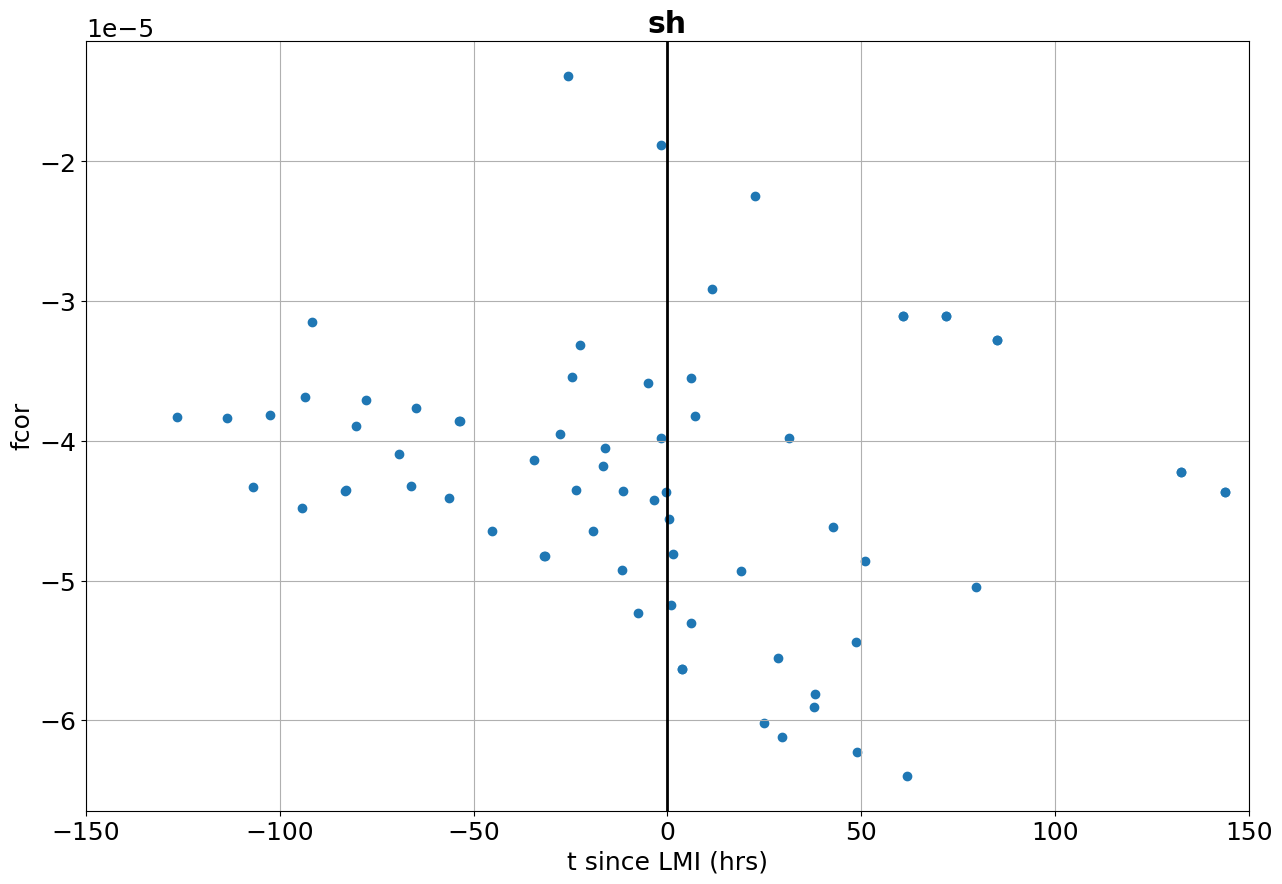

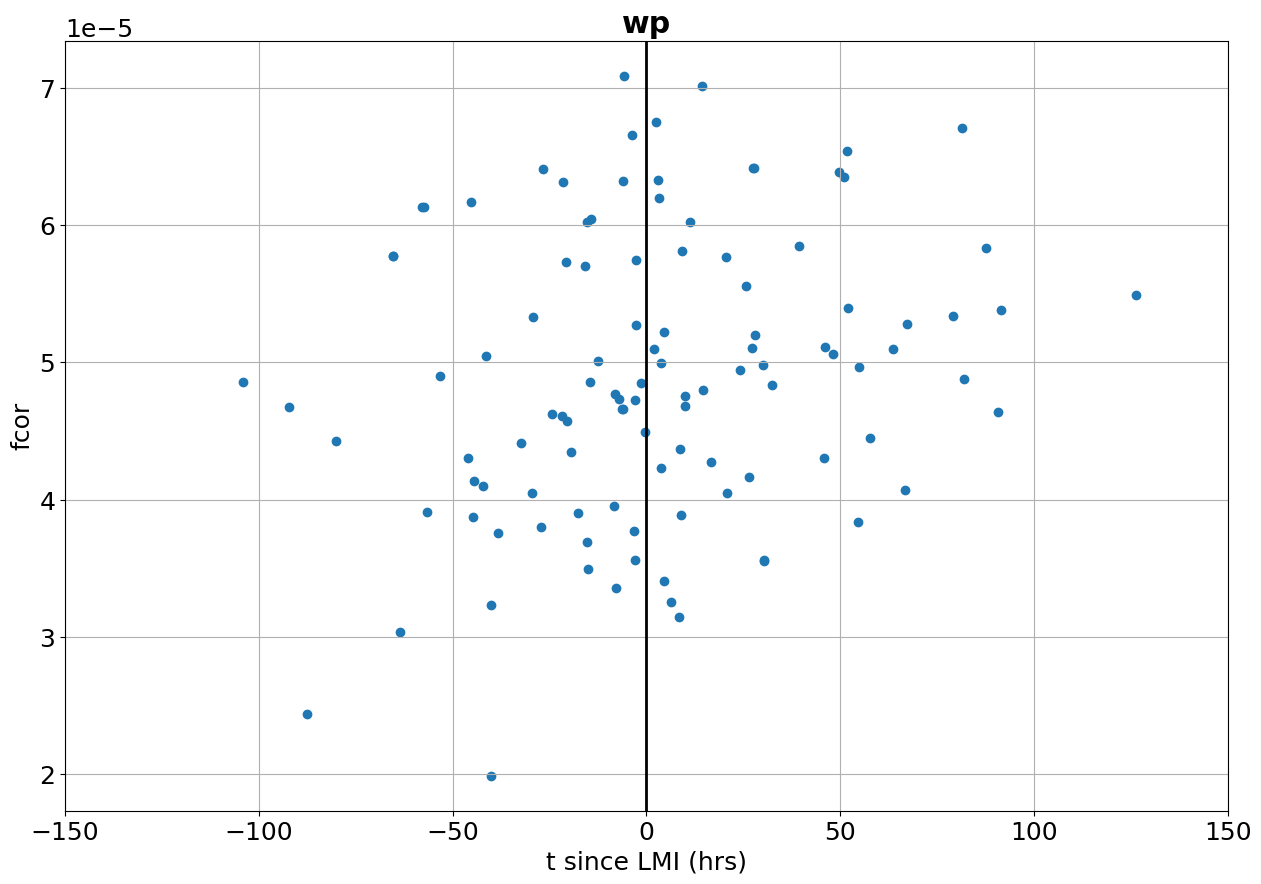

r34


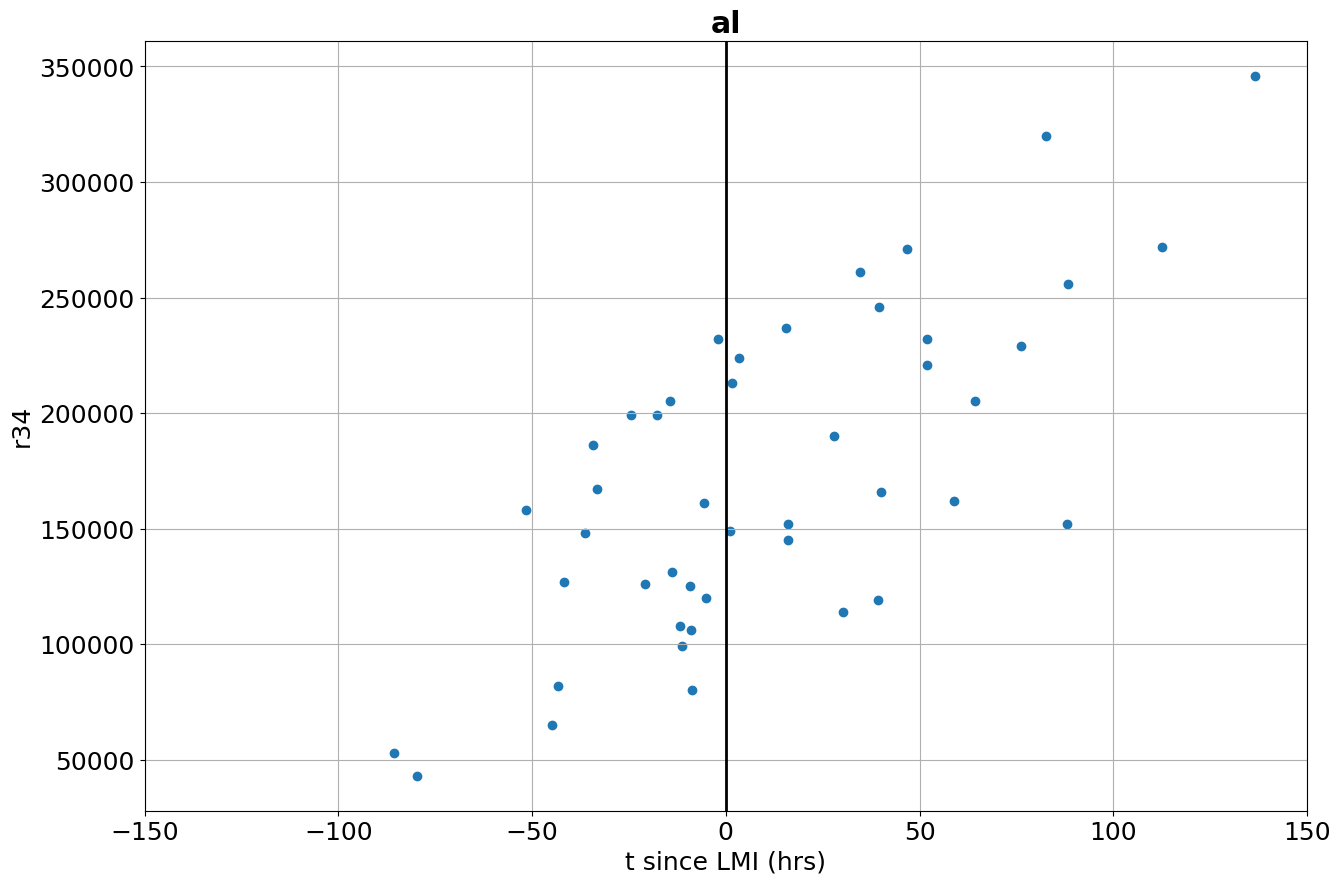

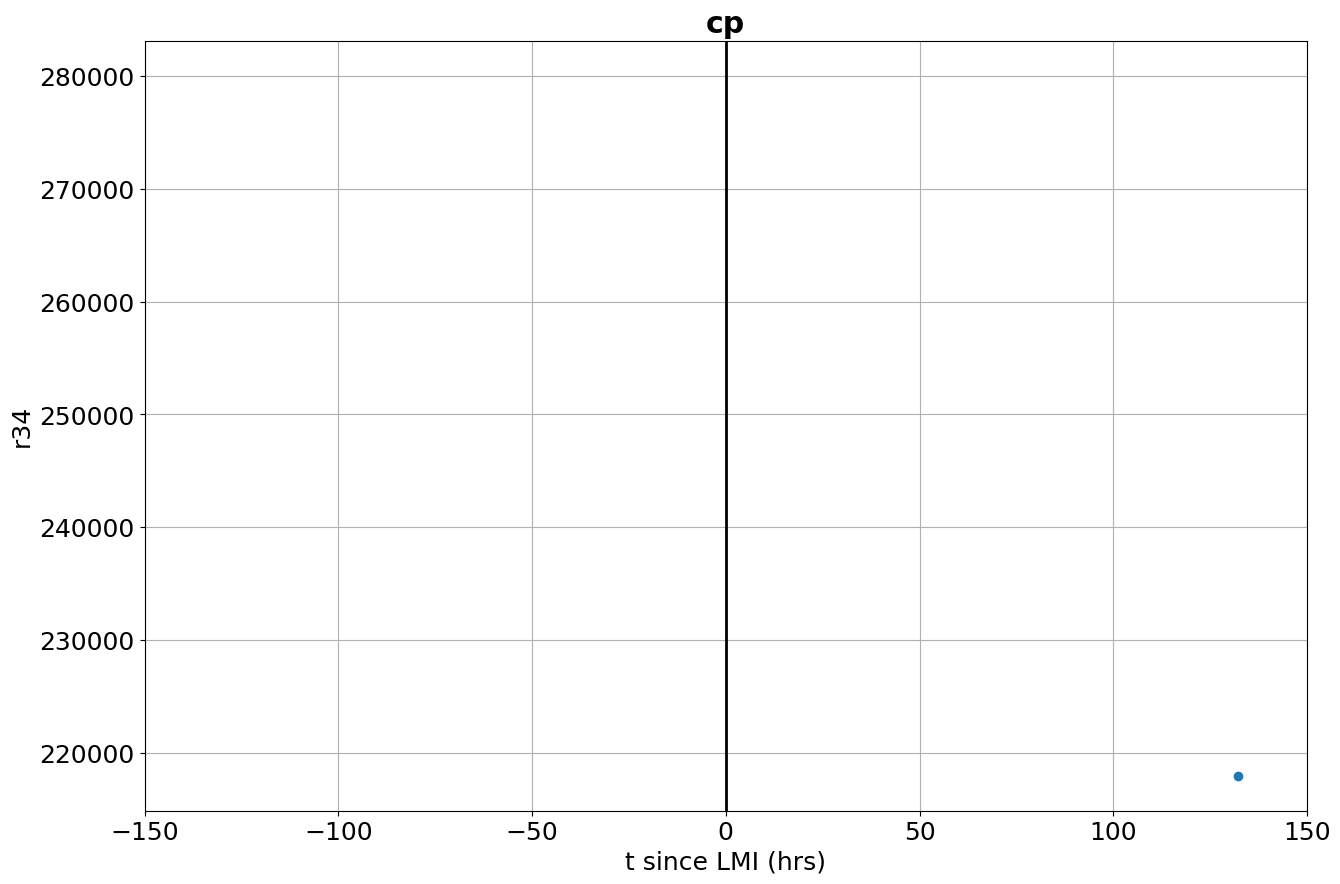

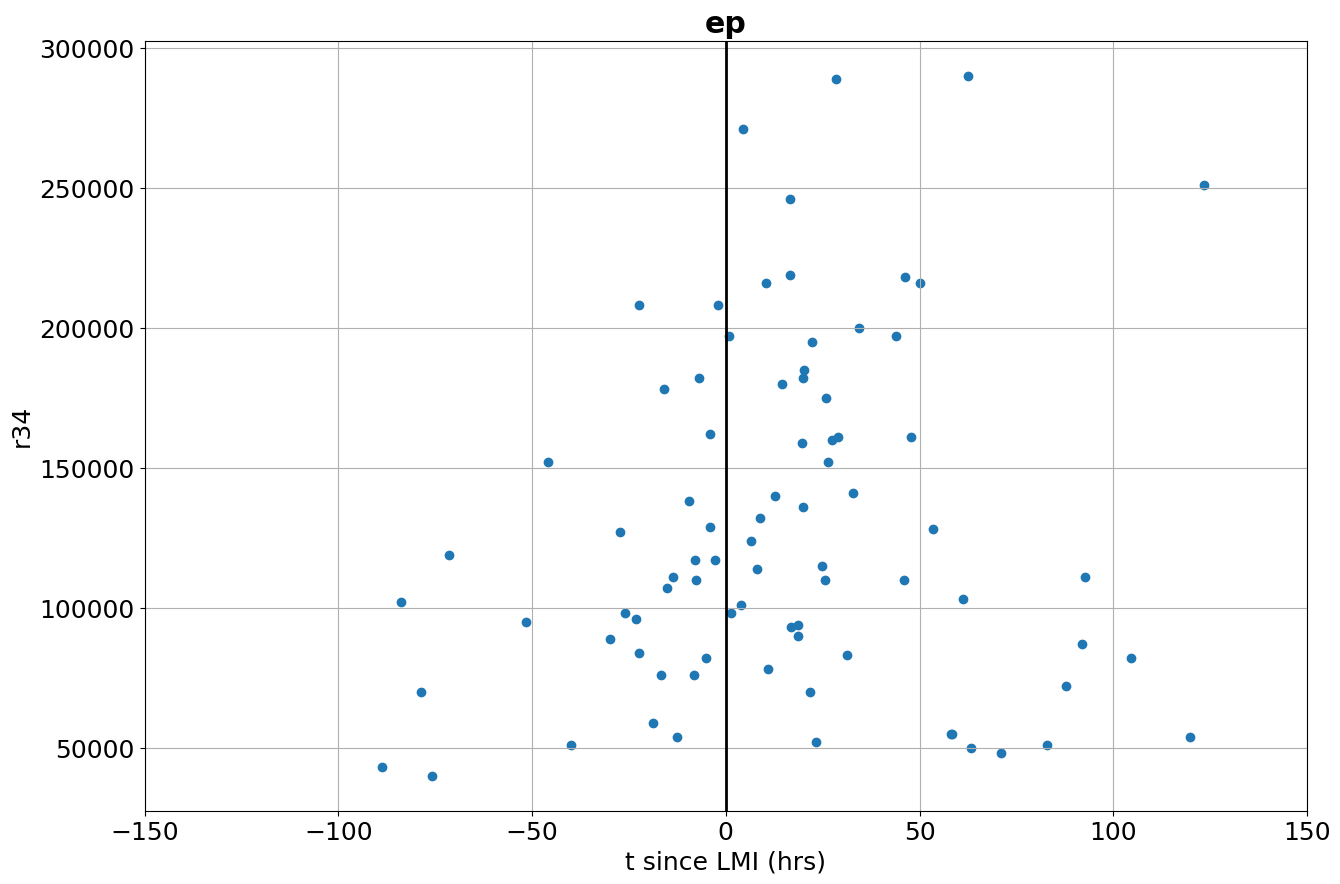

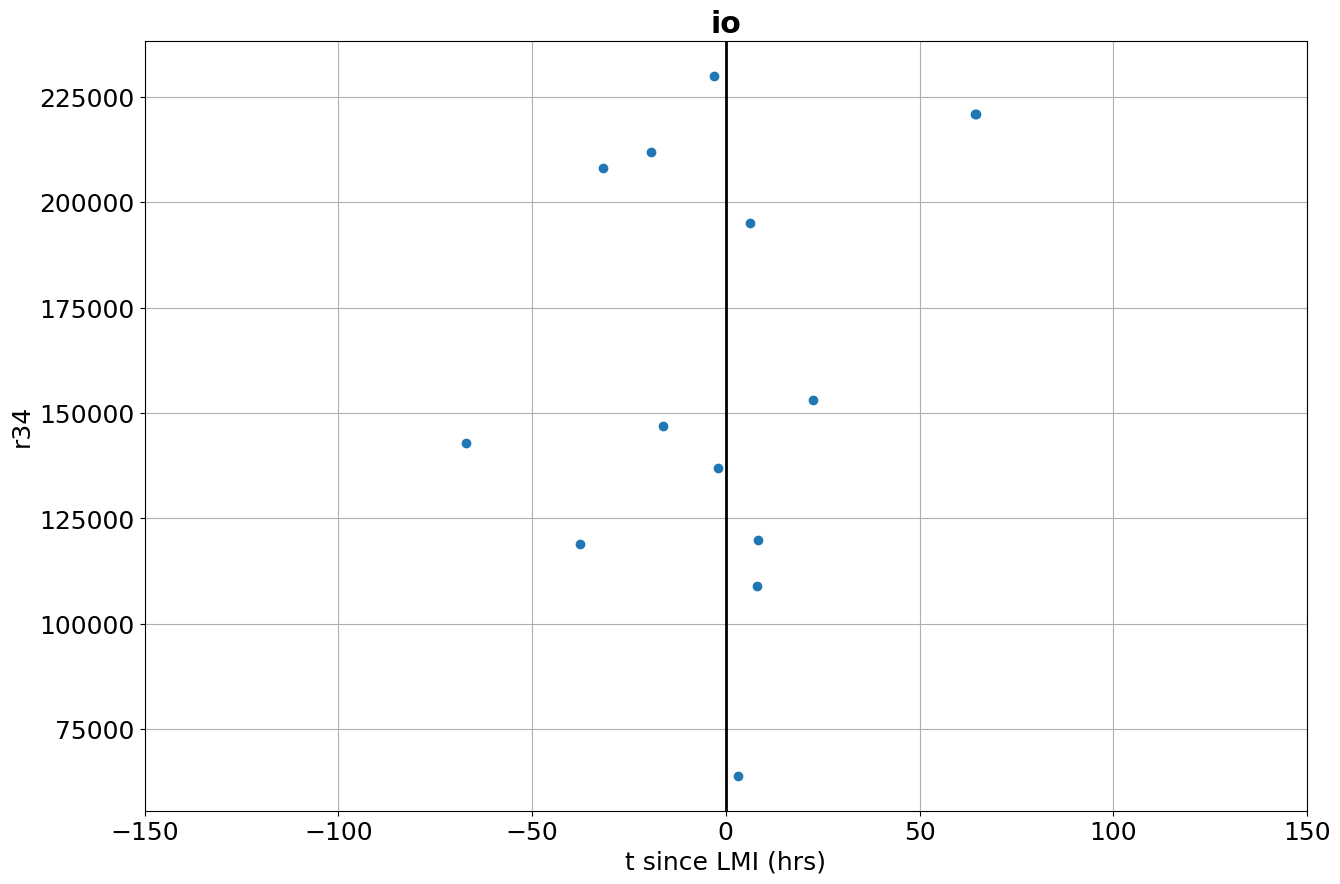

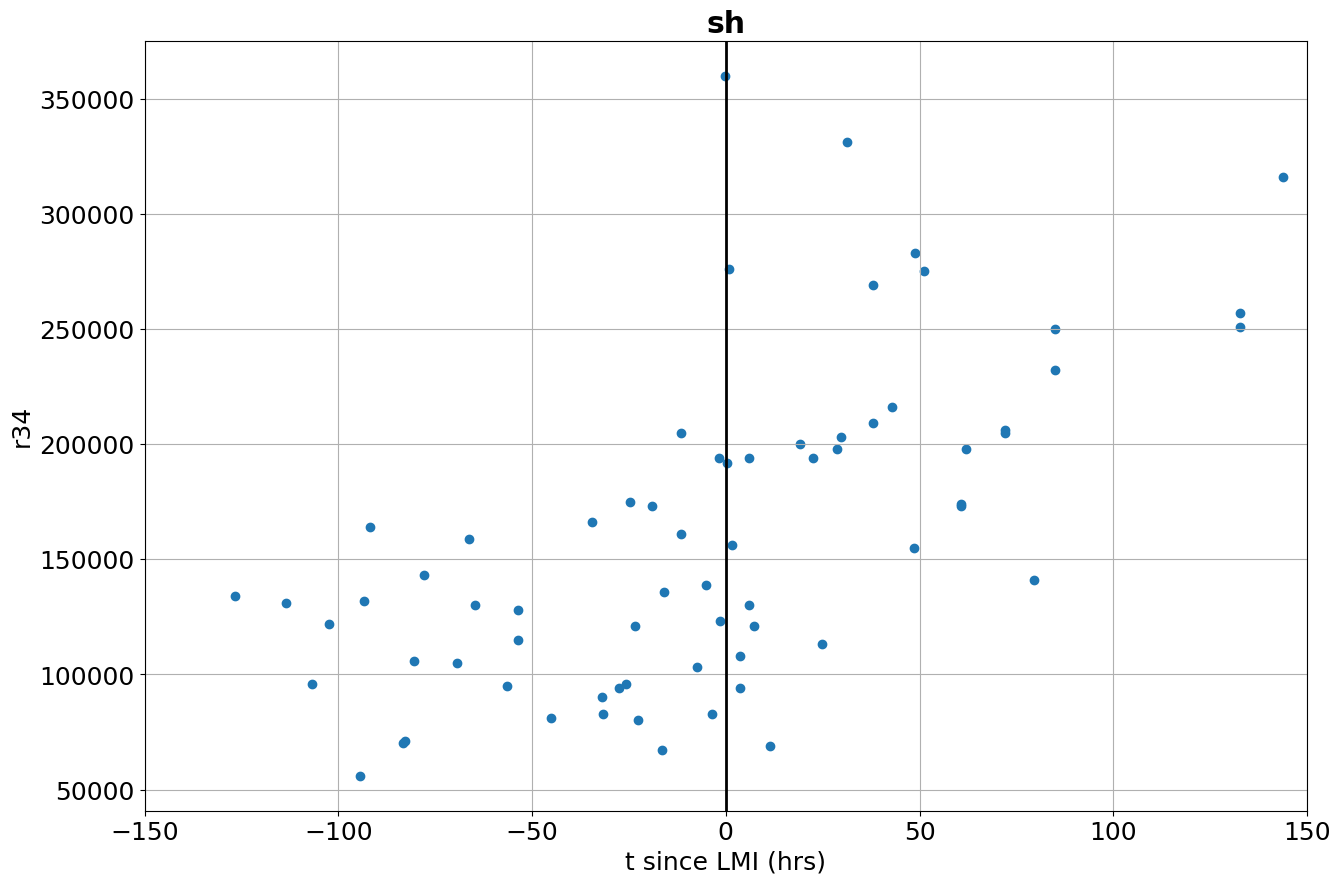

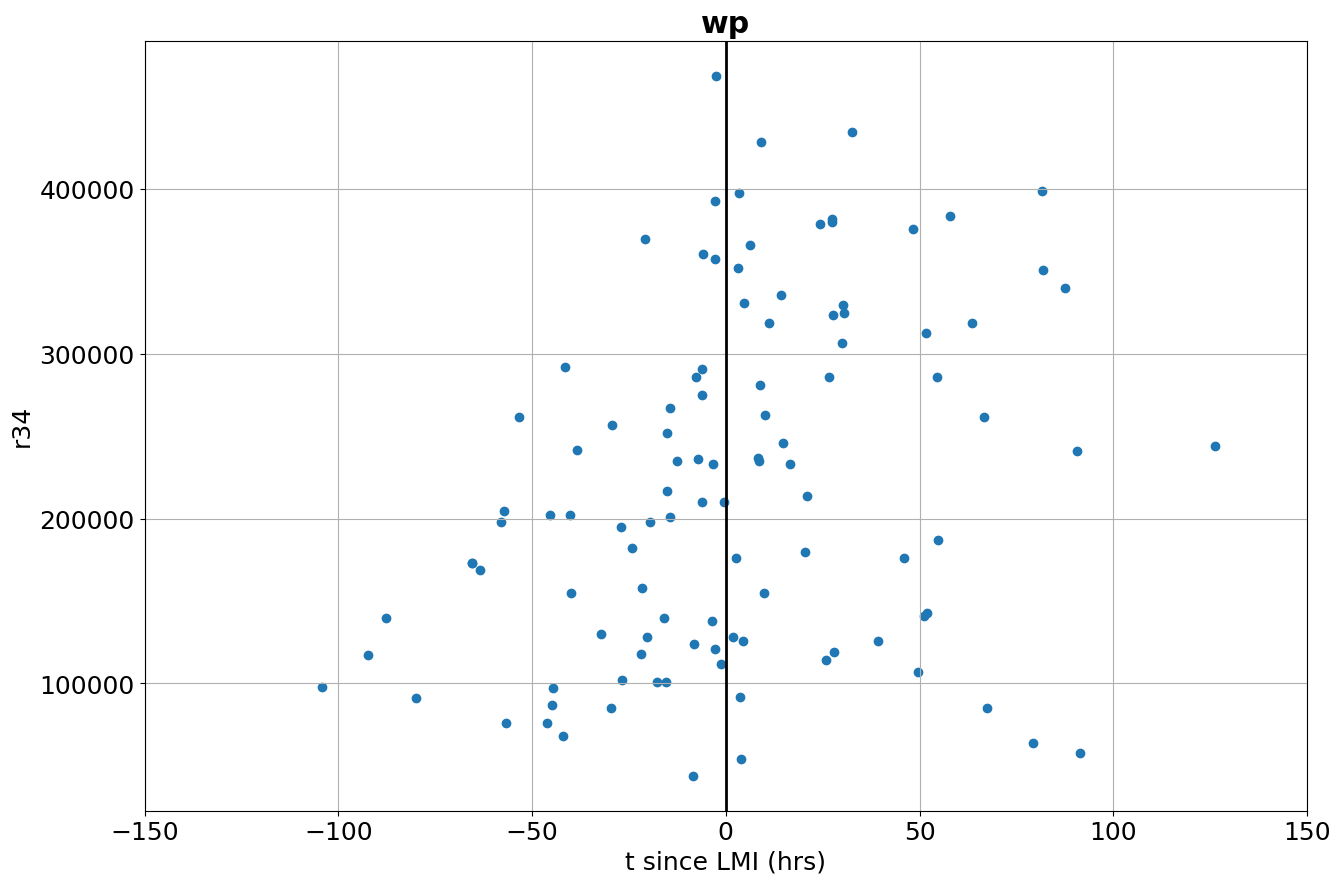

r50


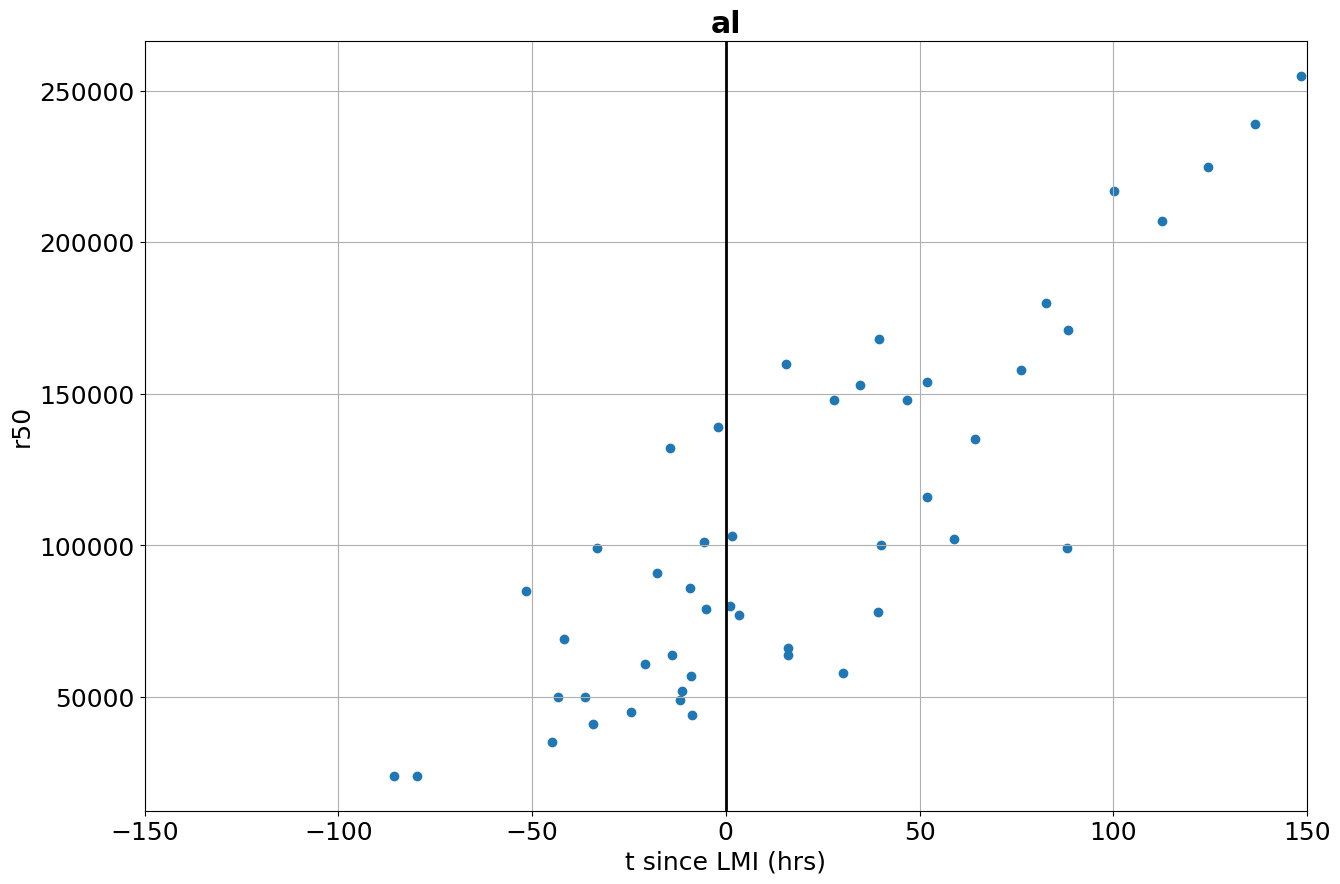

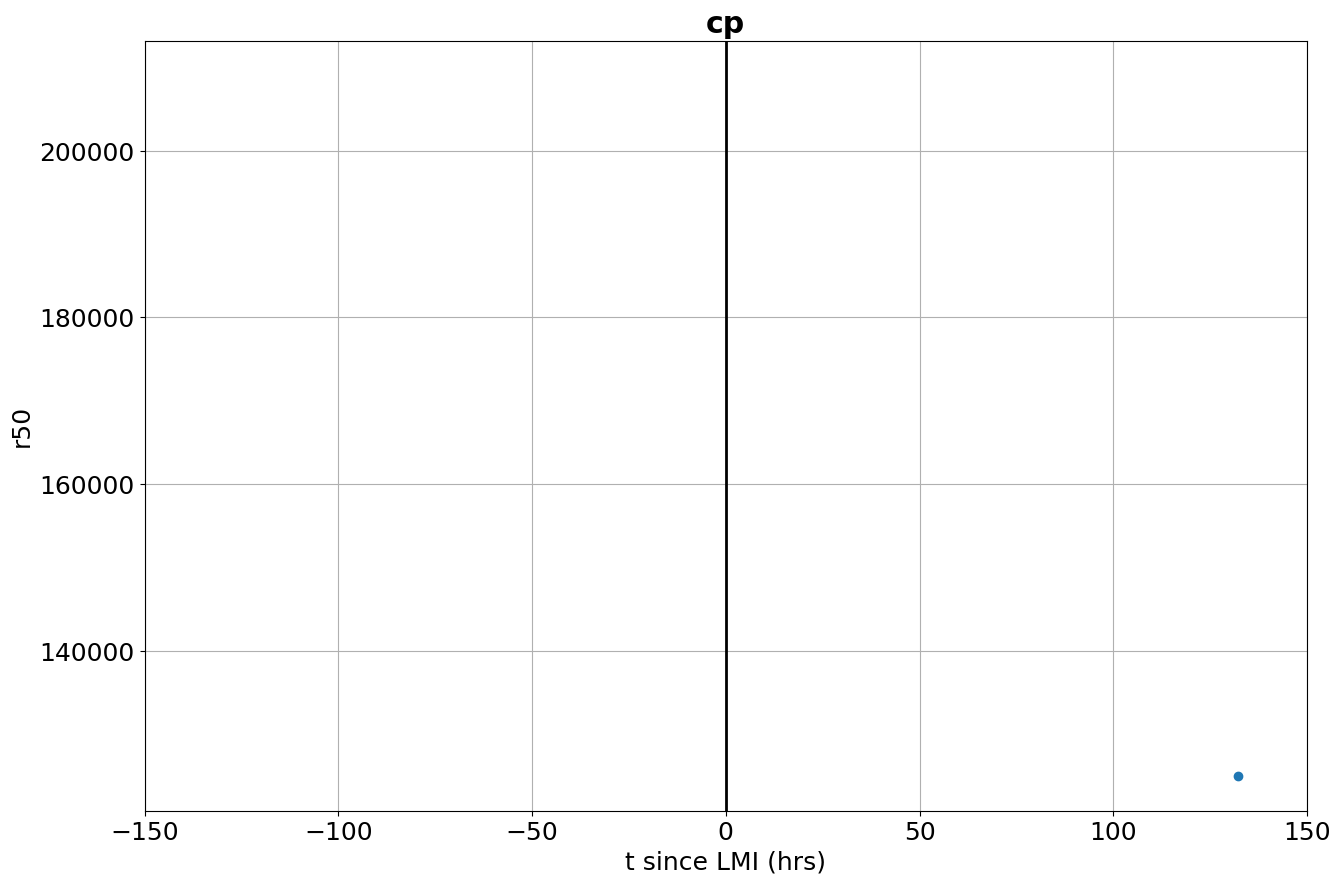

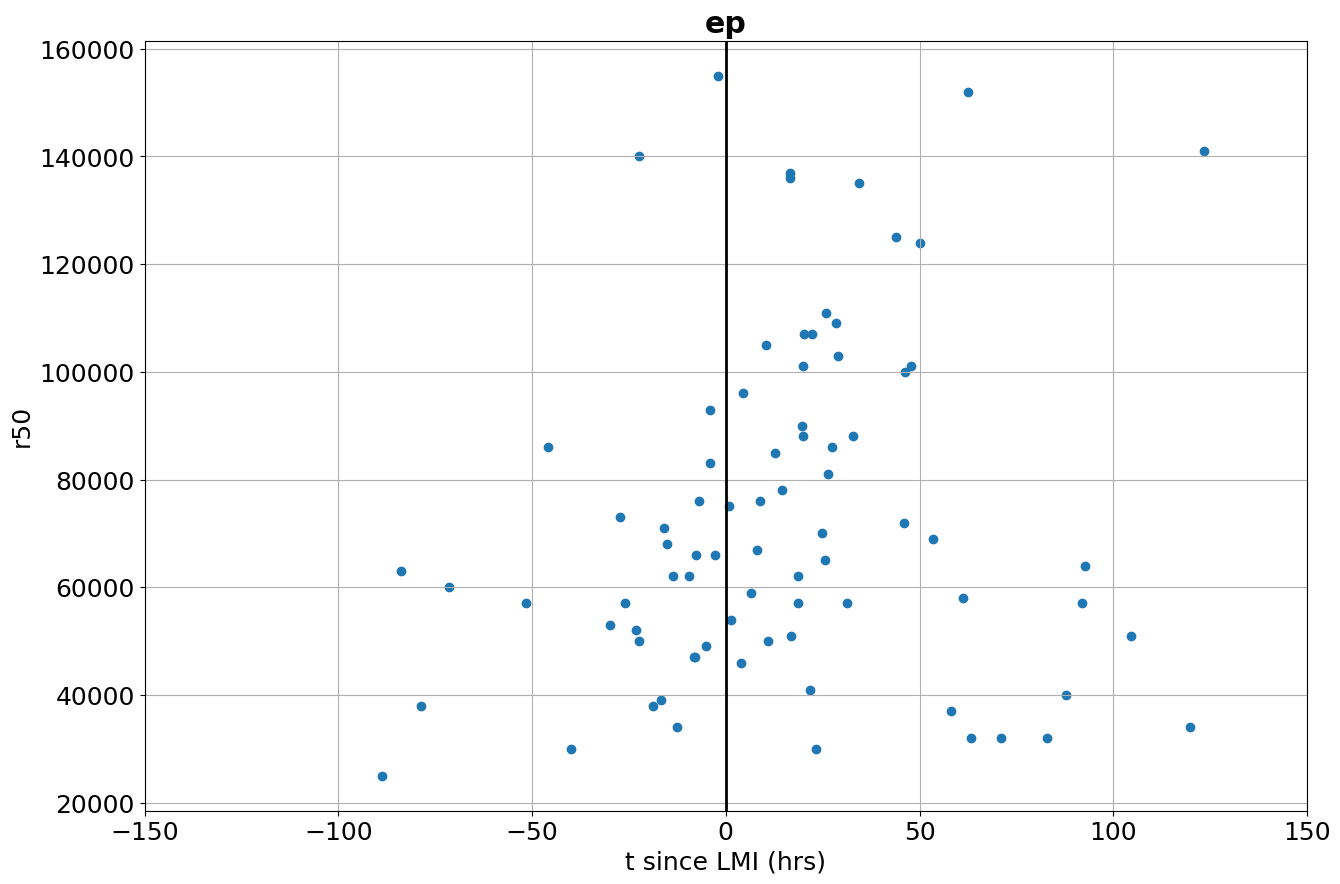

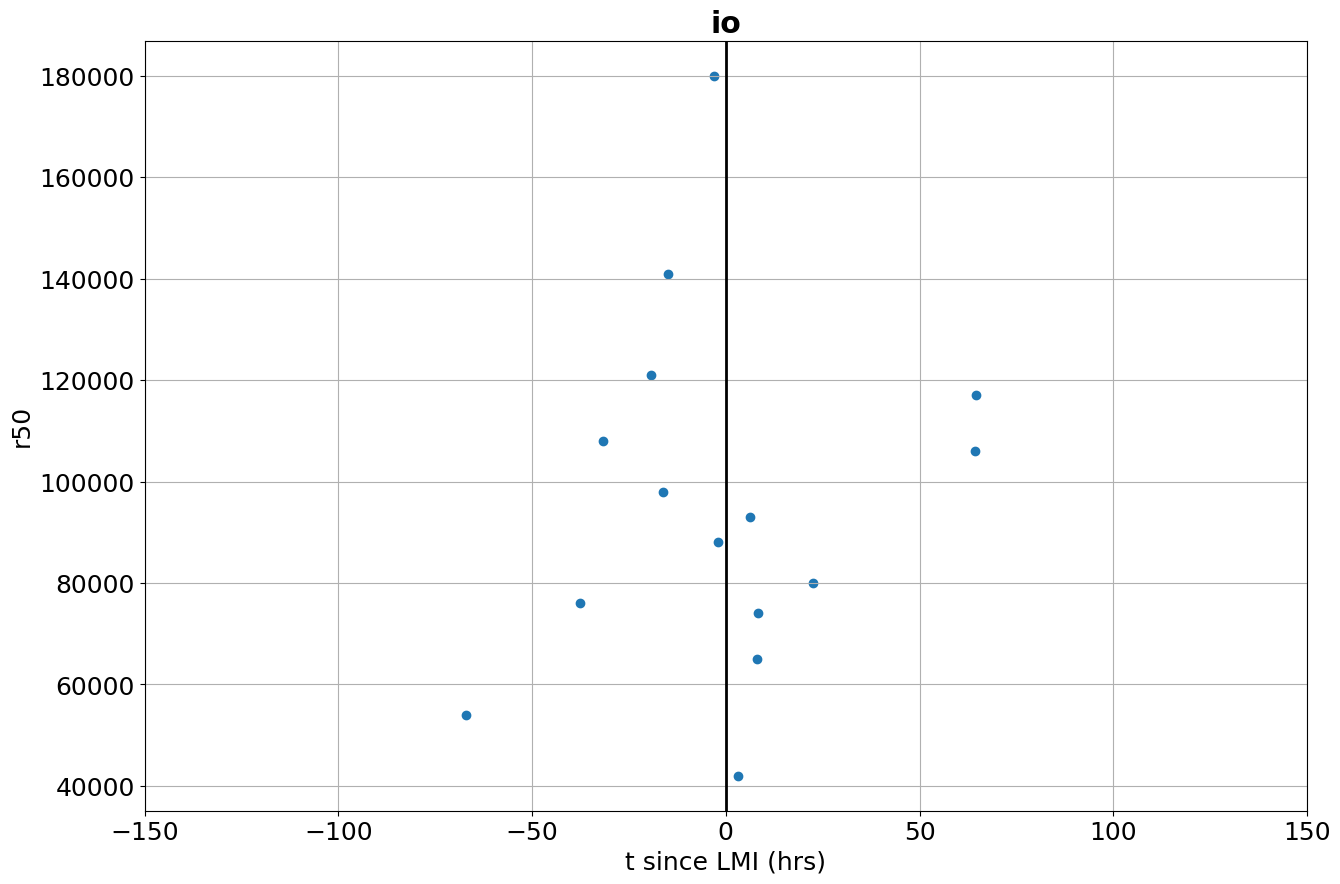

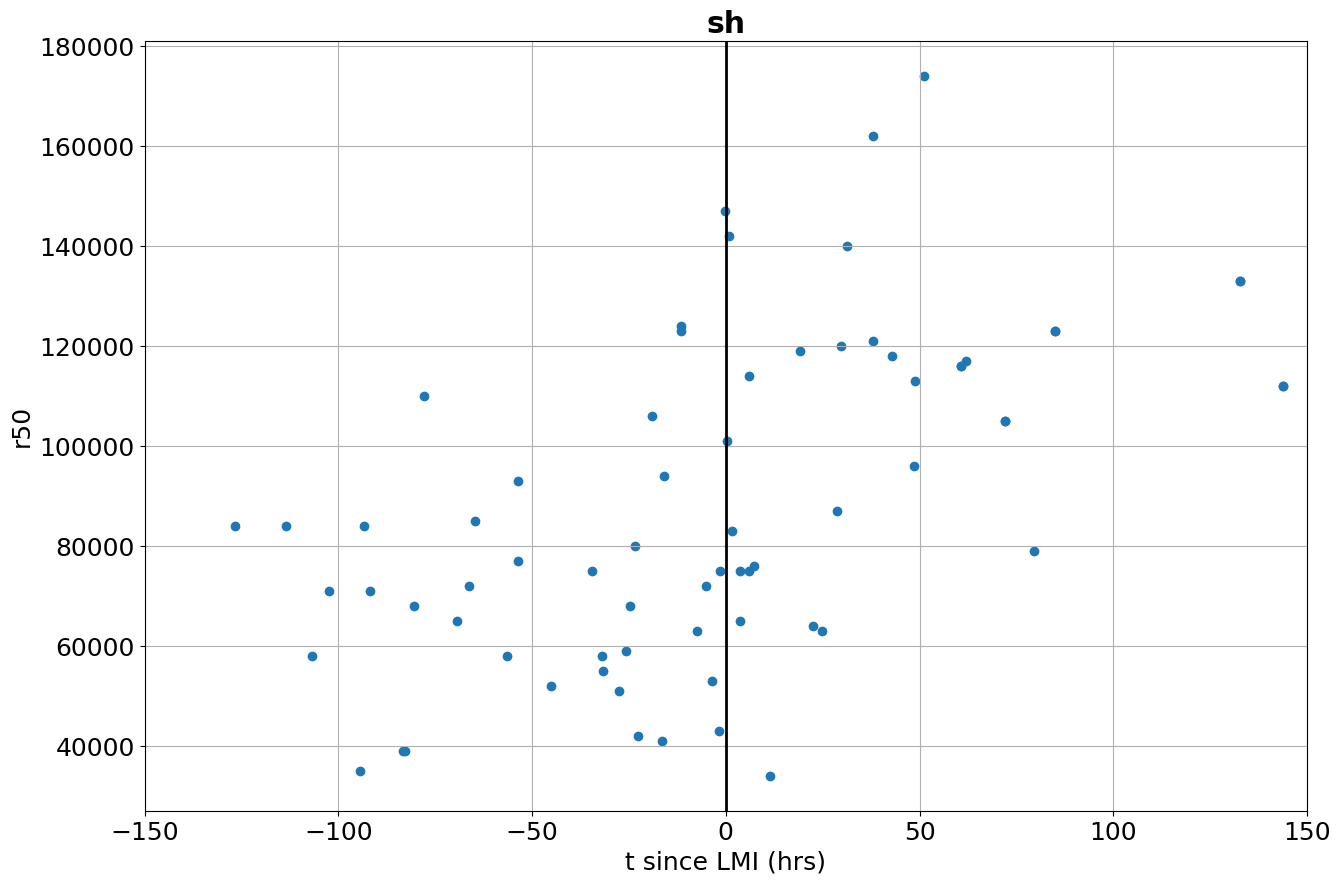

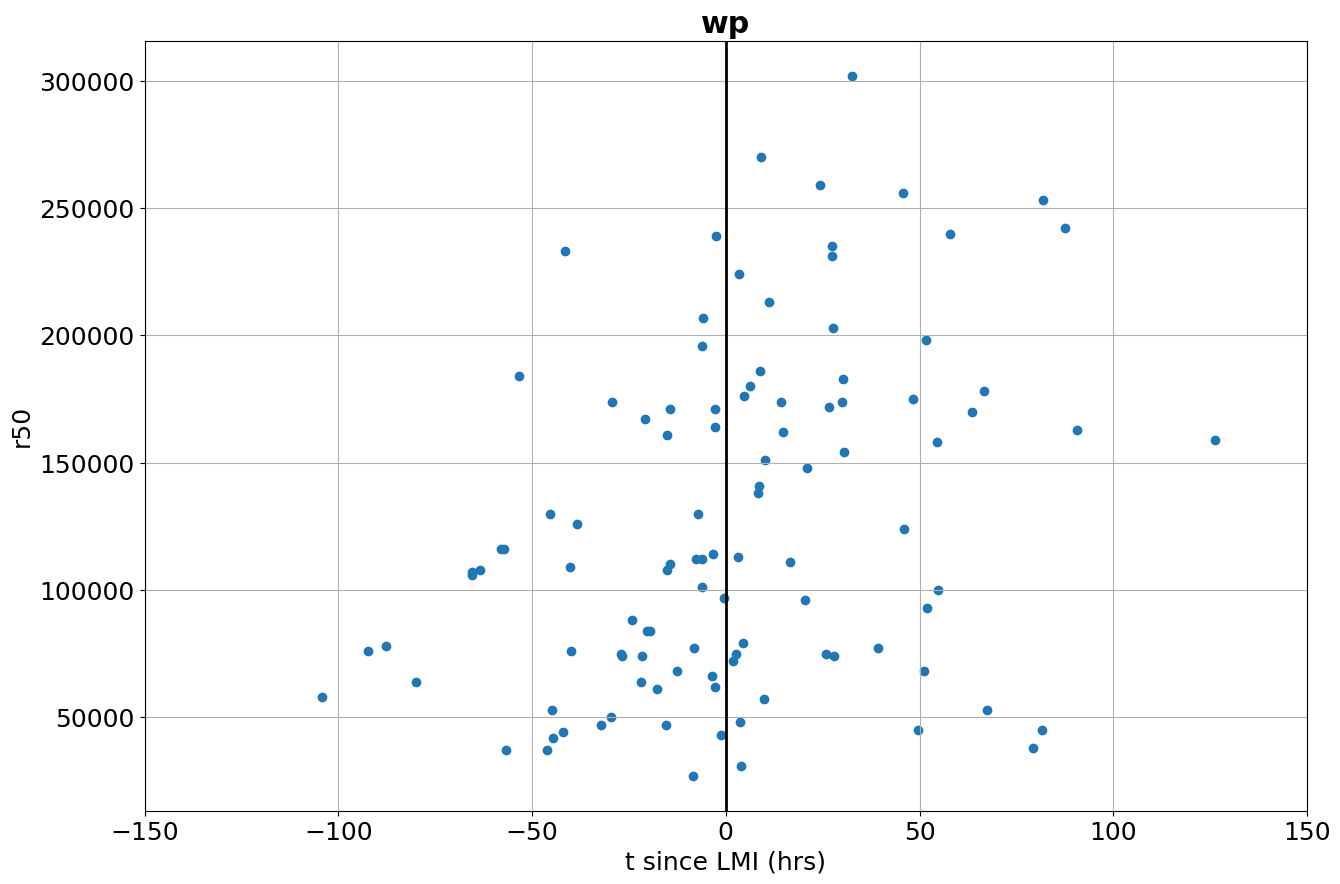

r64


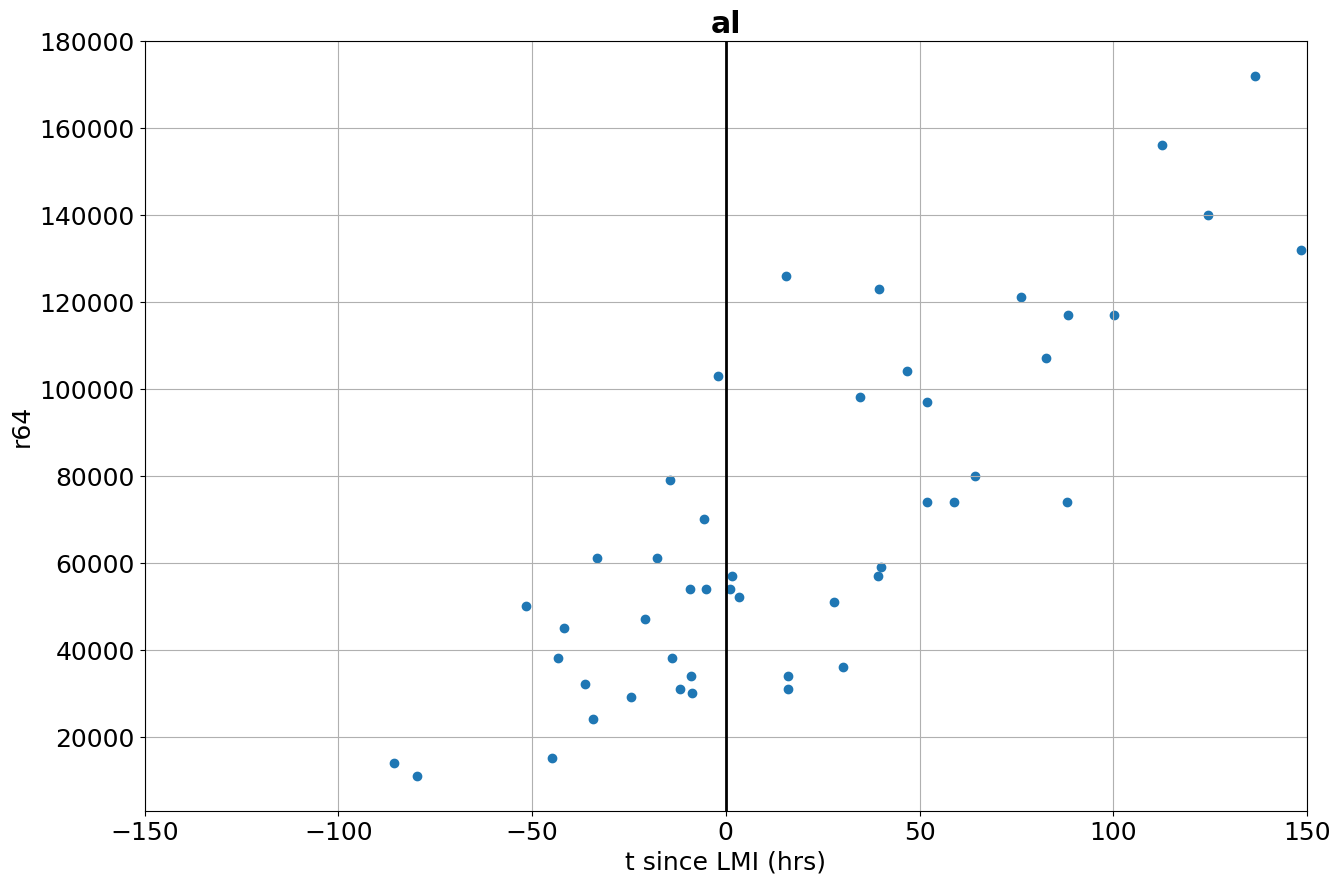

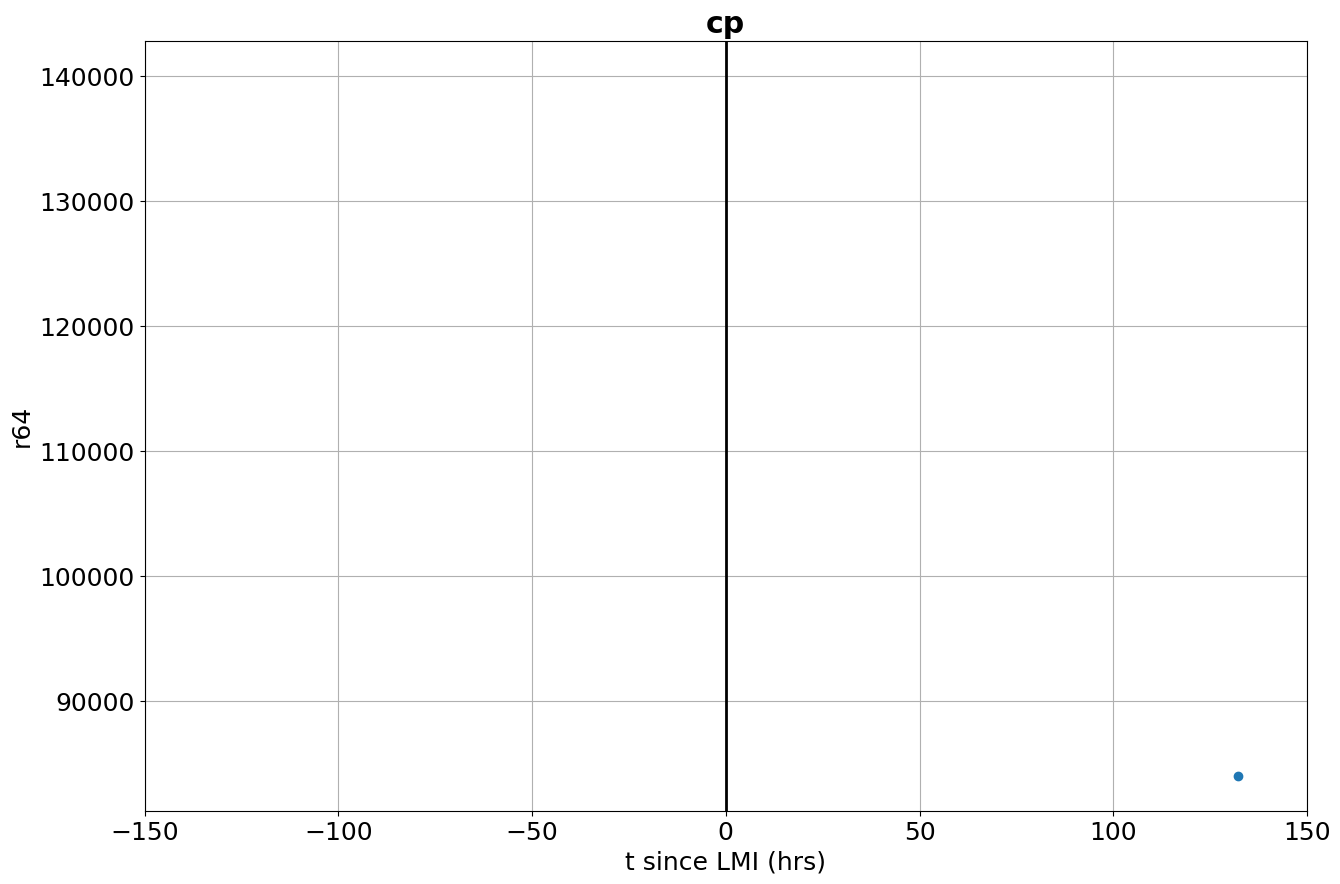

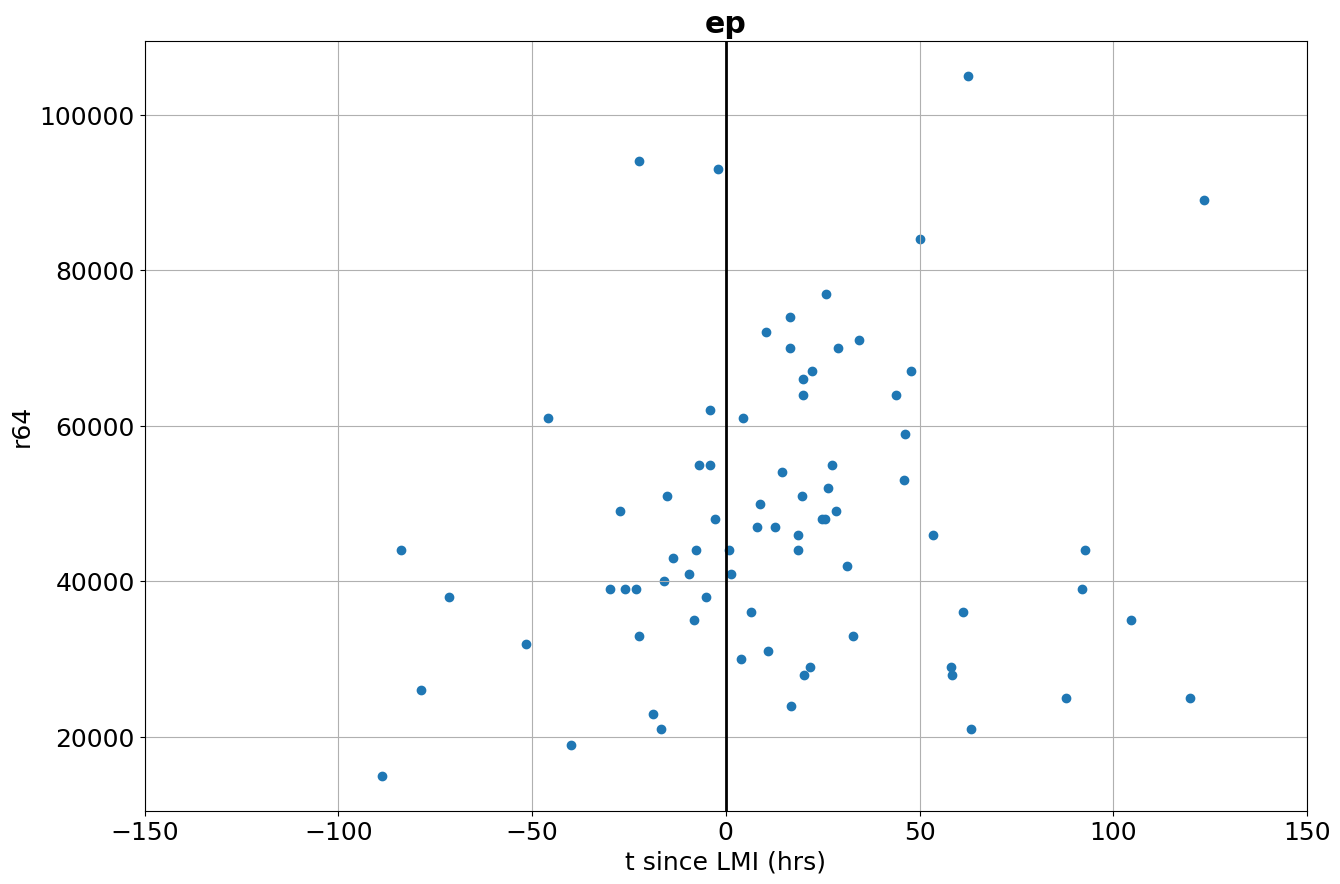

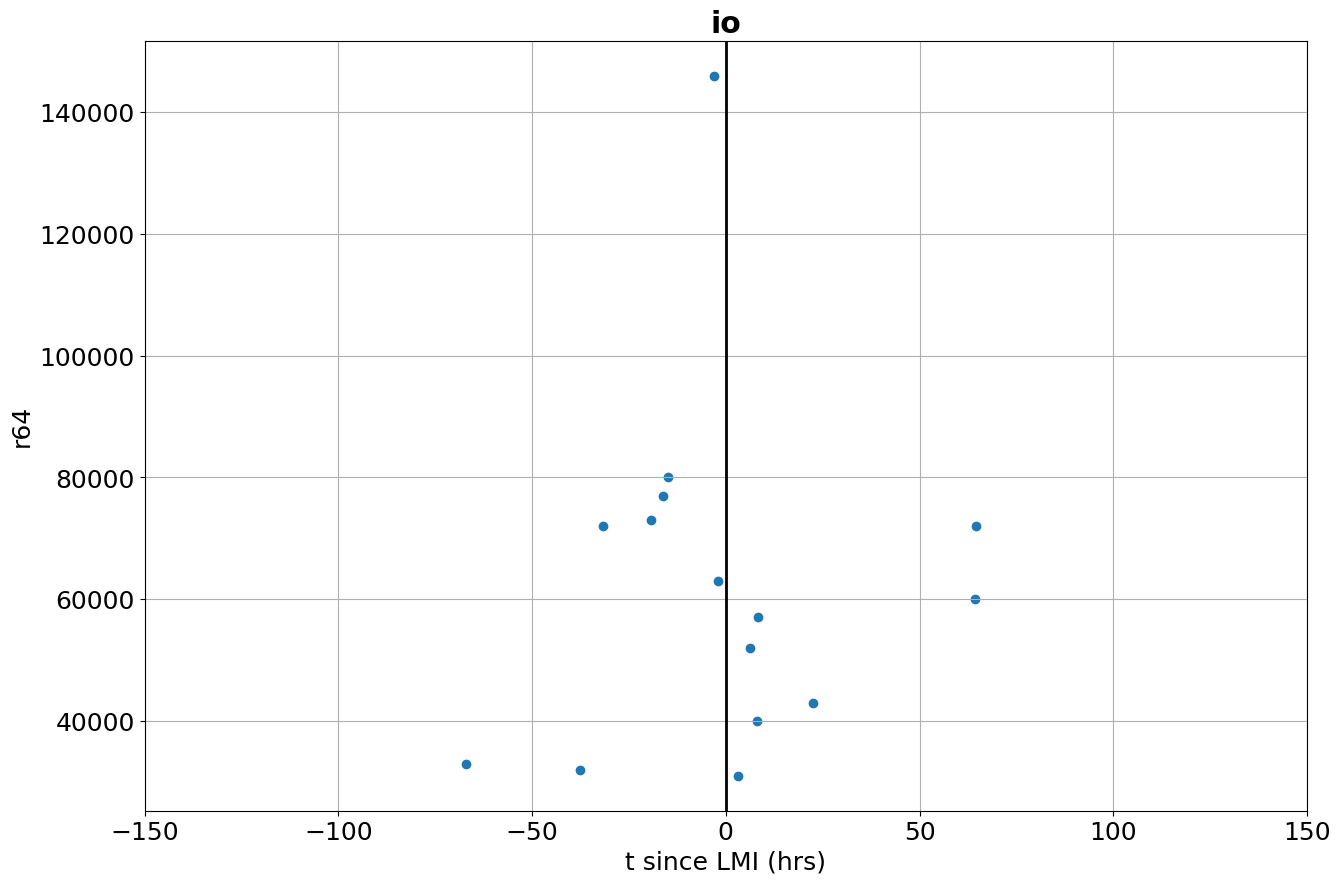

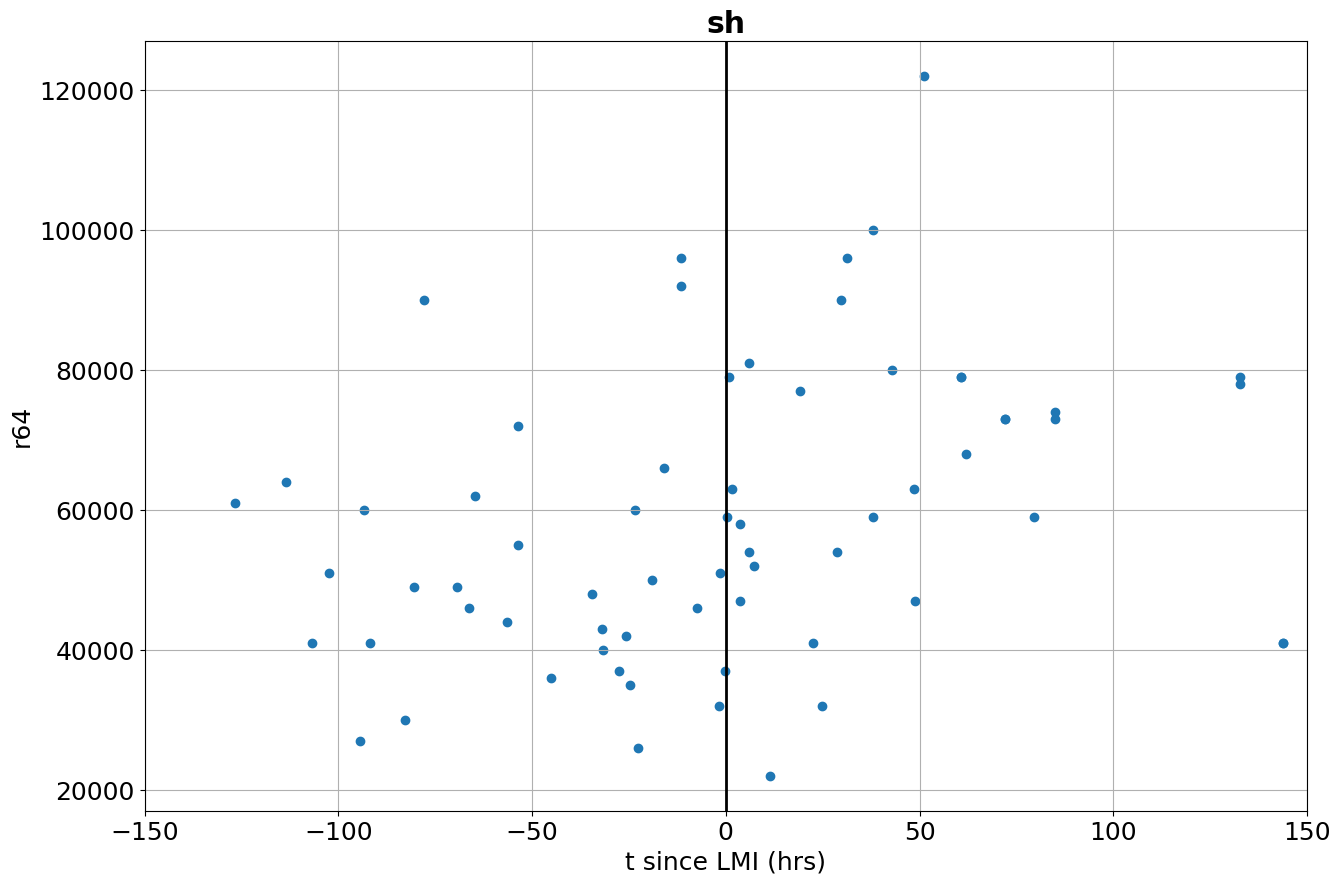

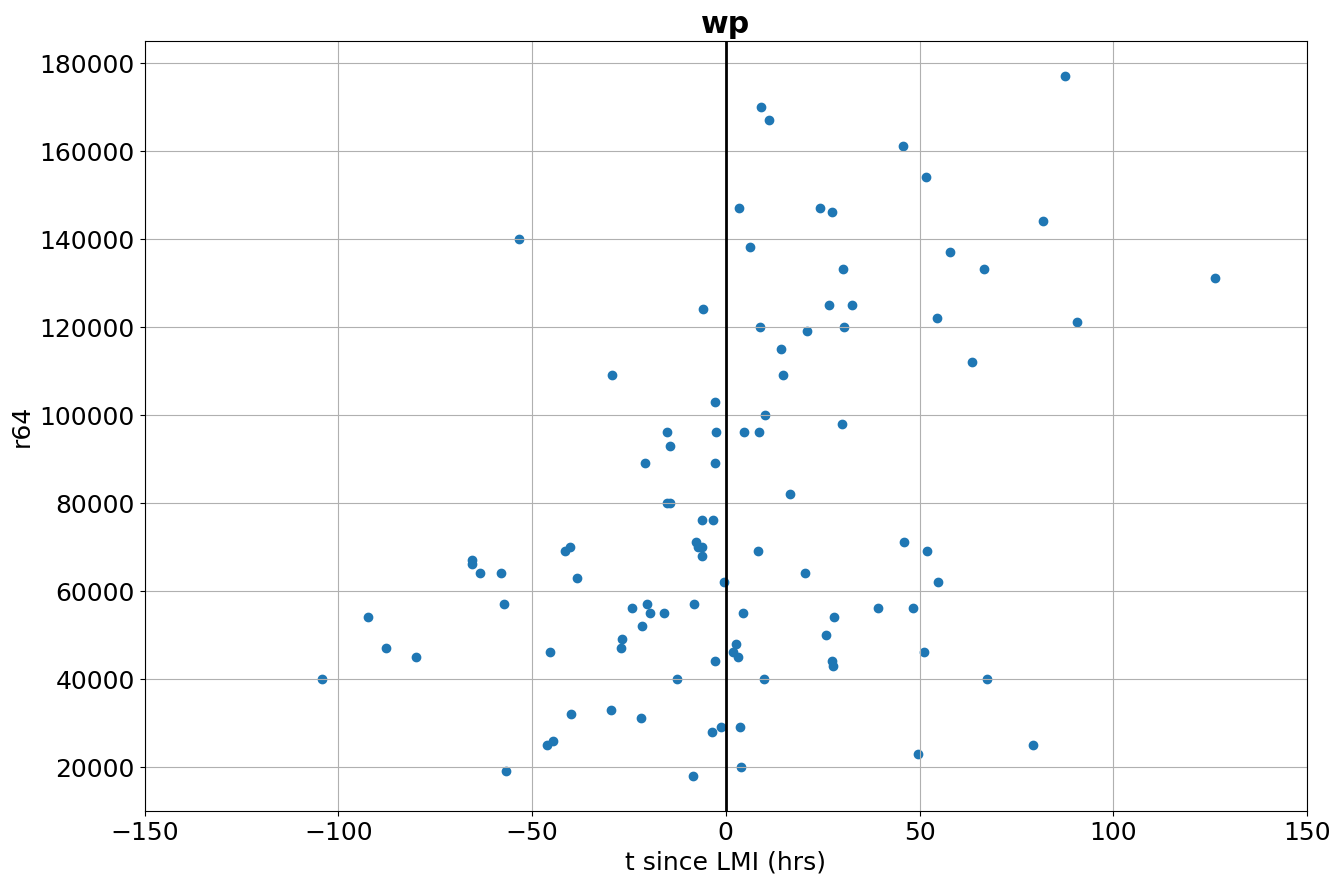

uc


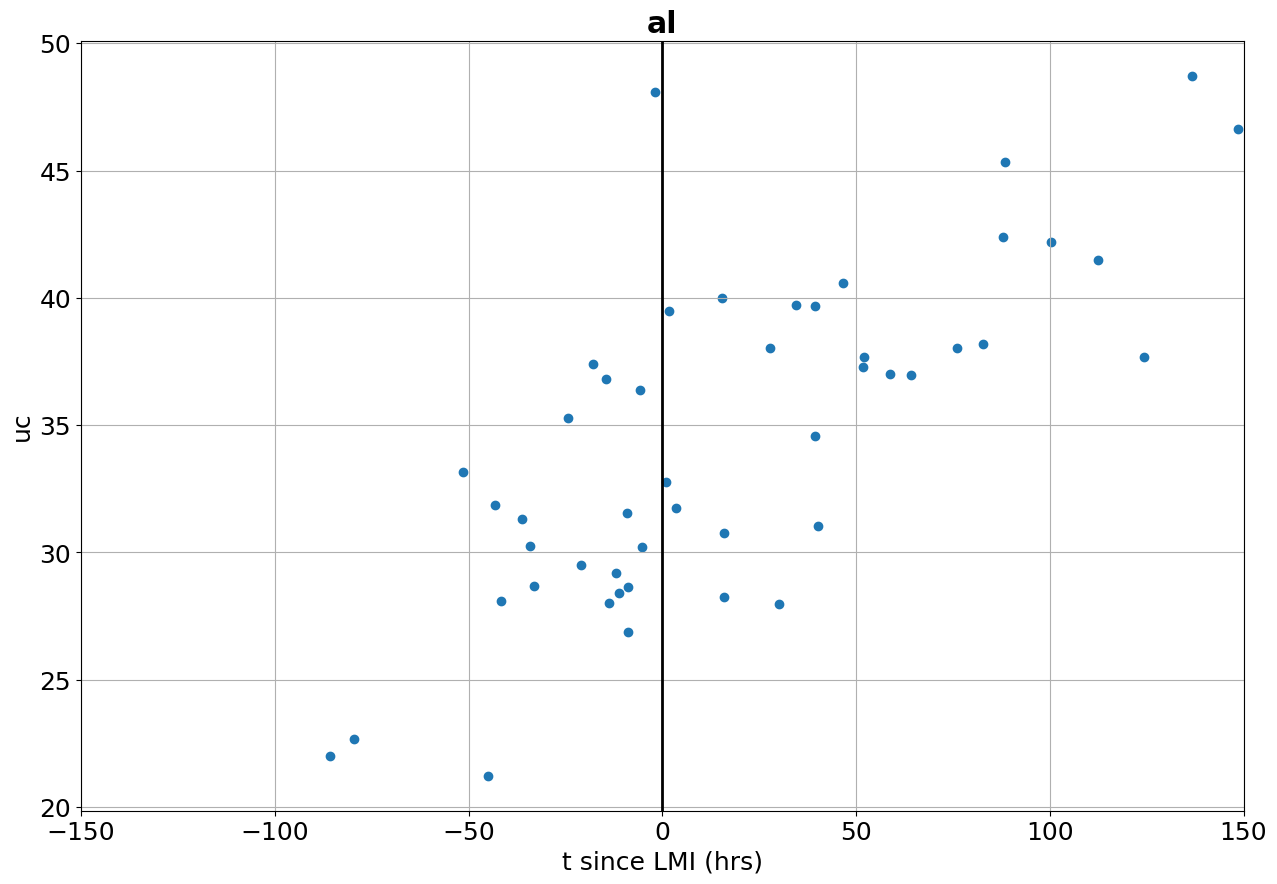

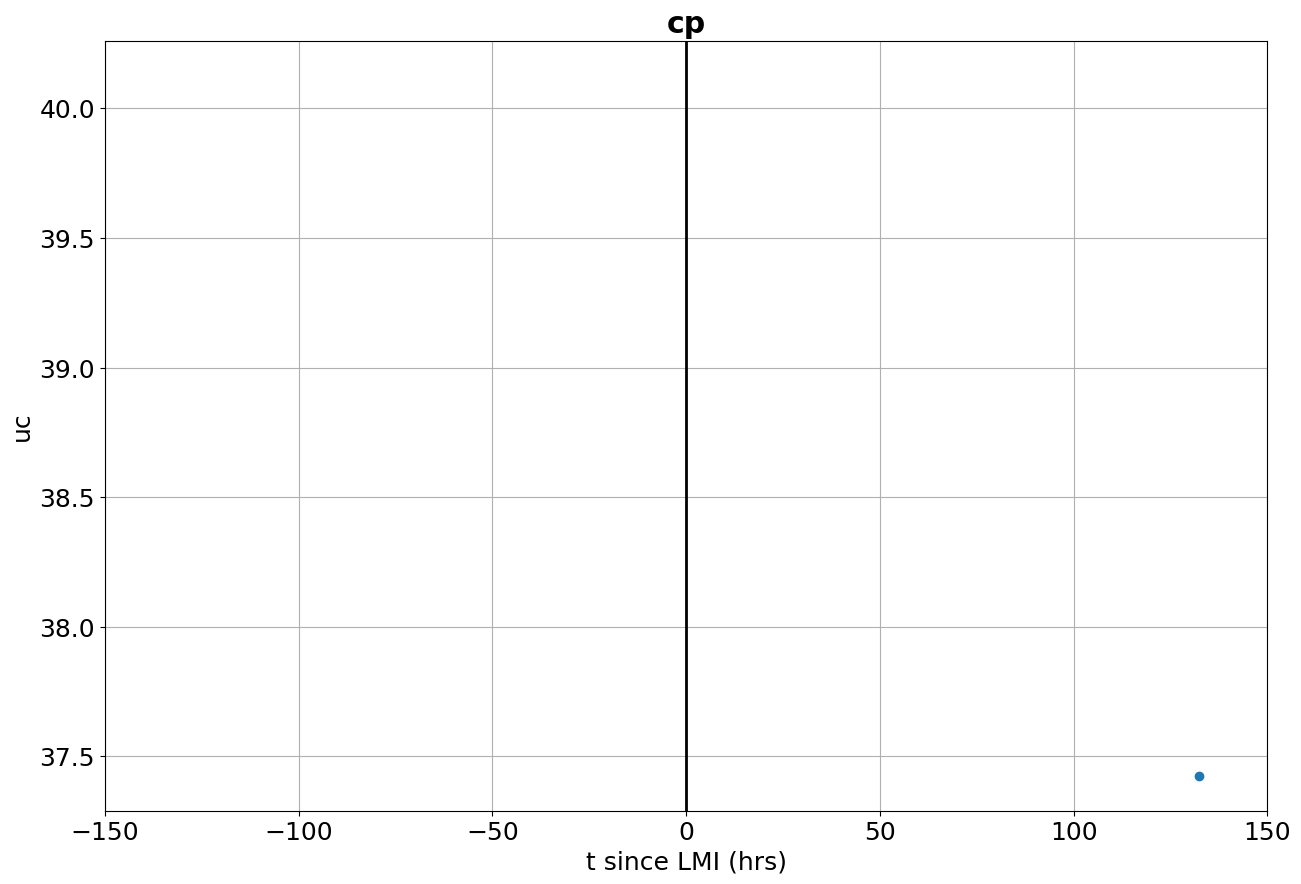

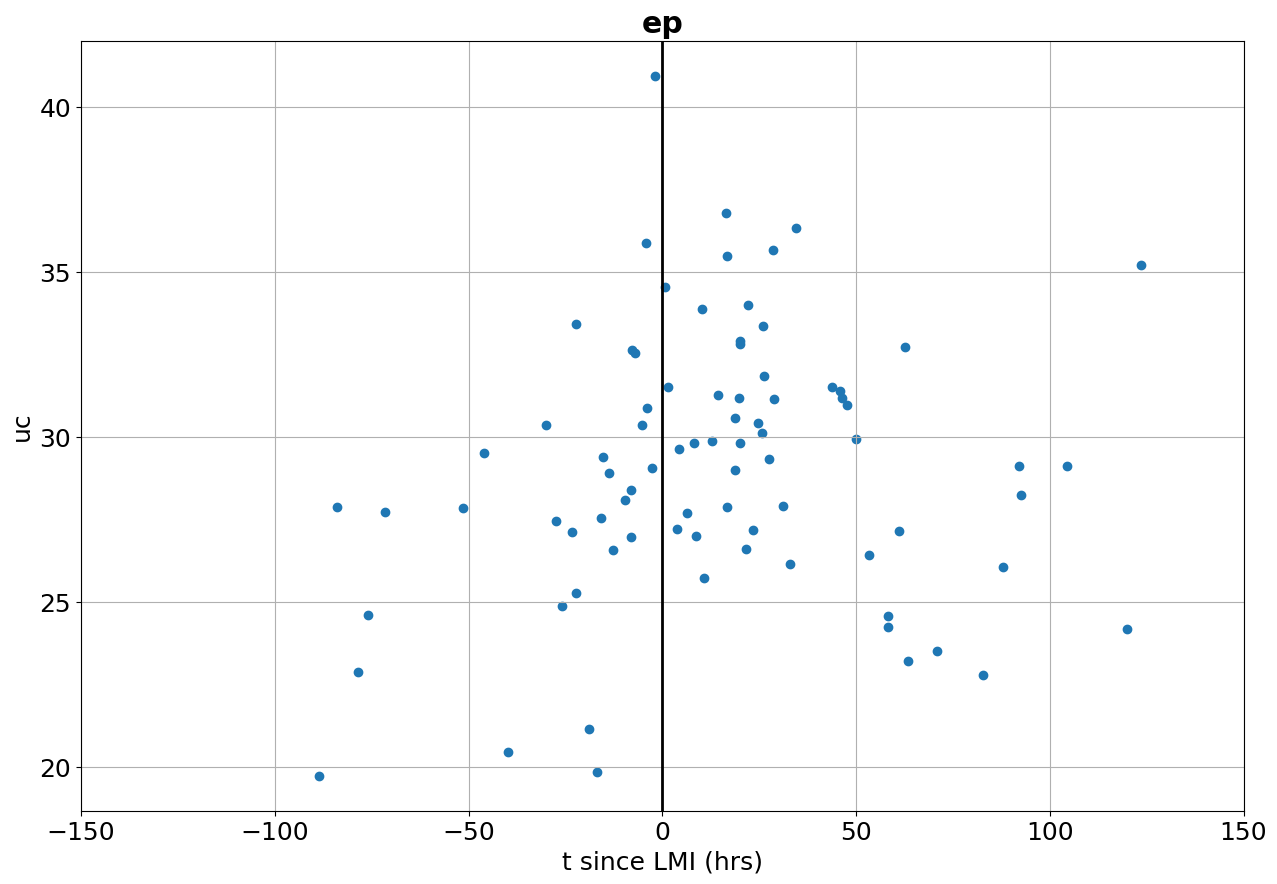

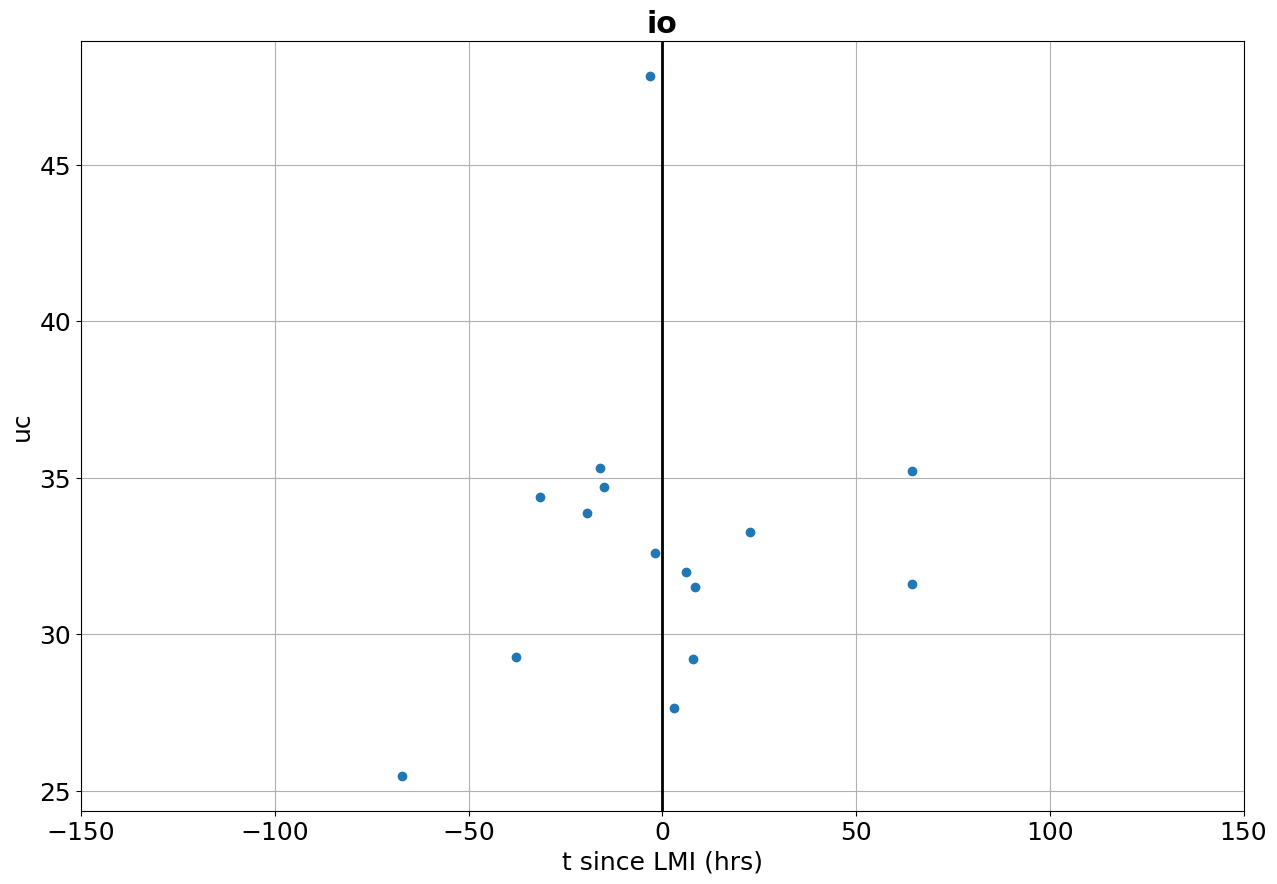

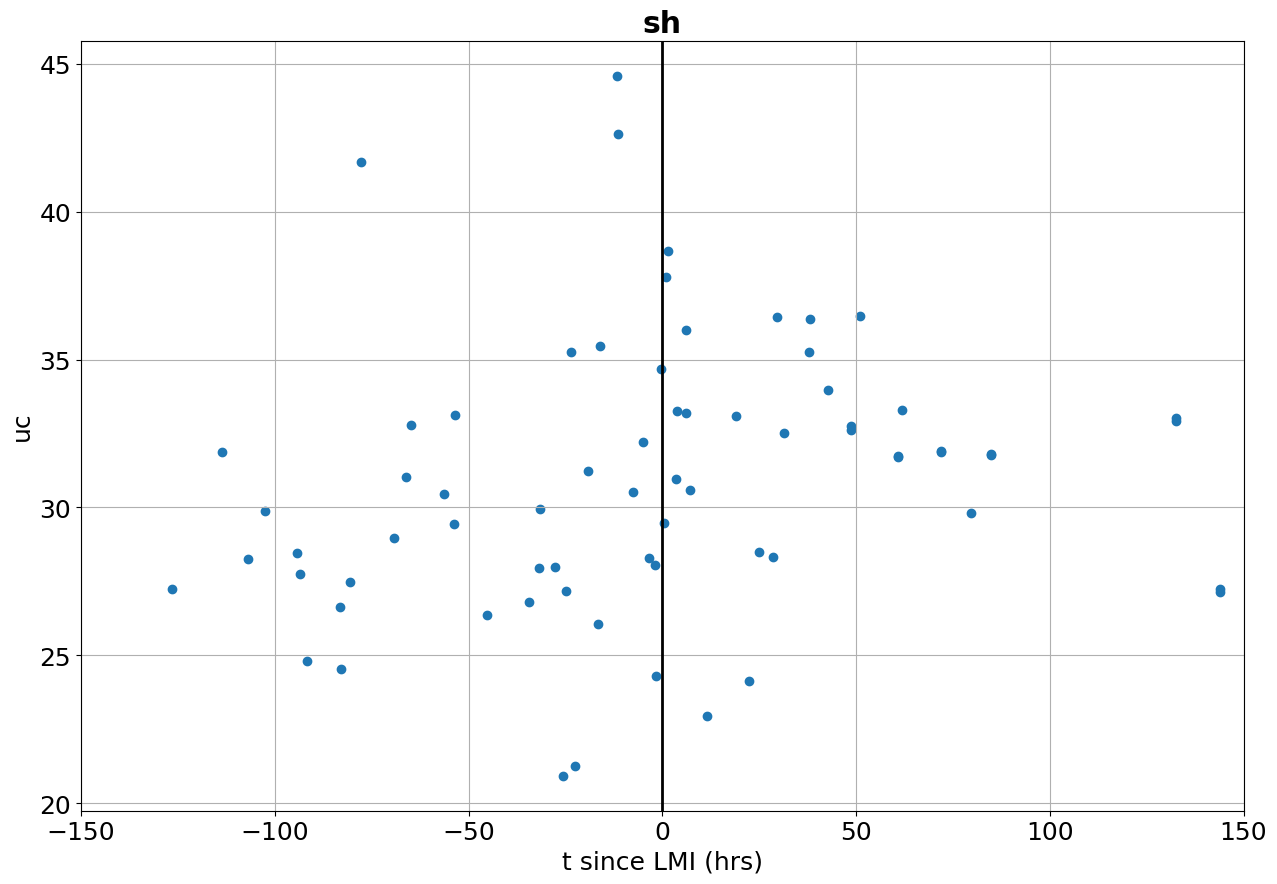

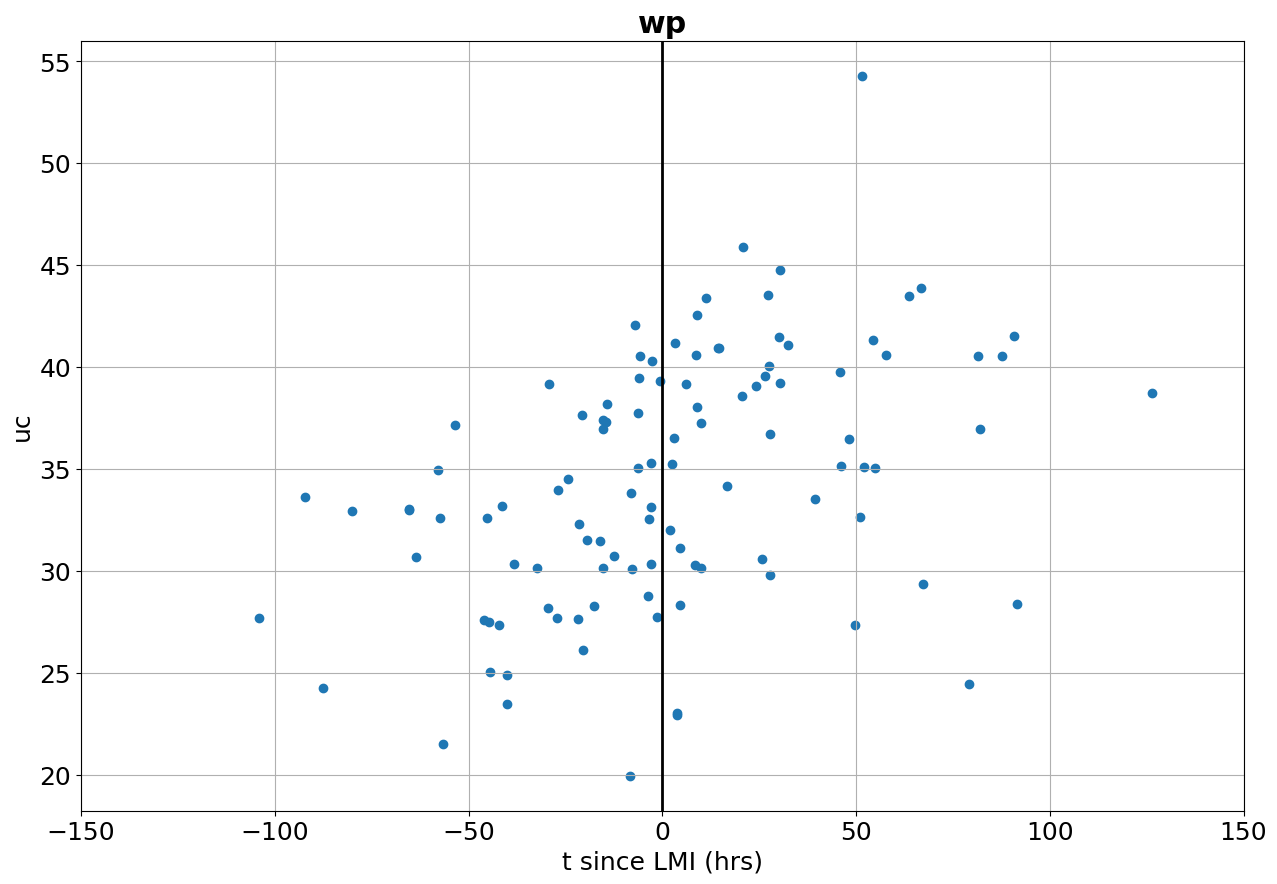

rps


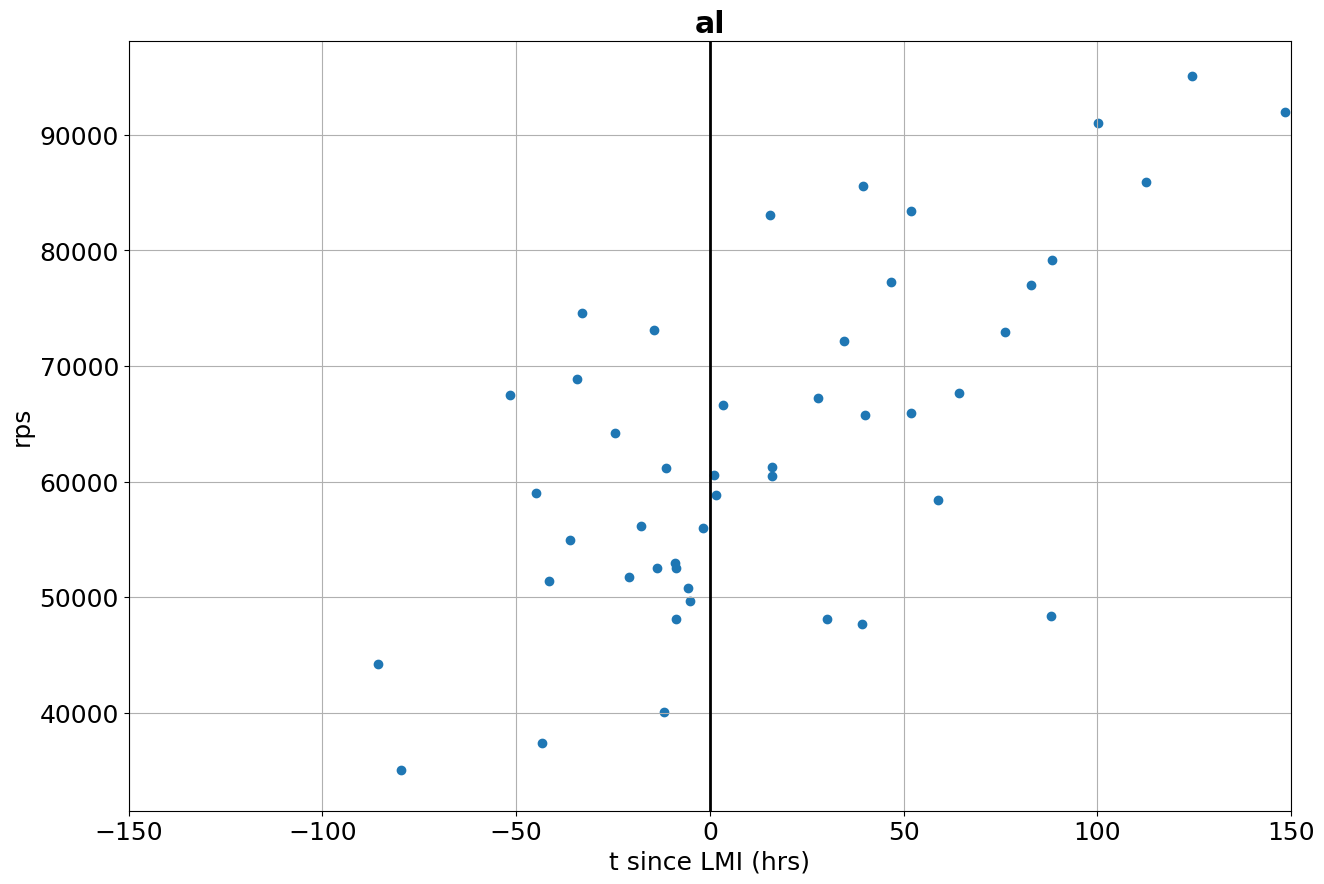

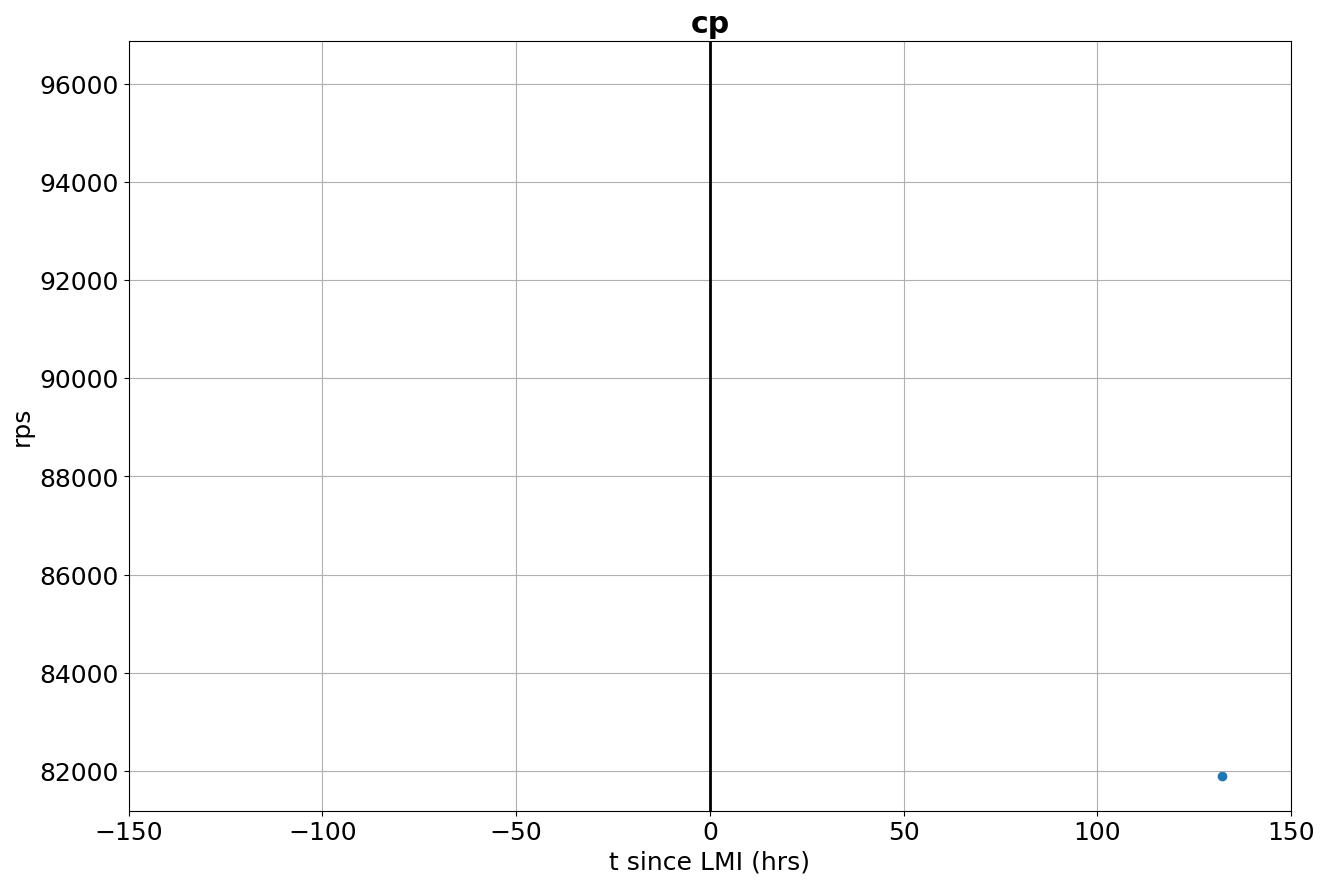

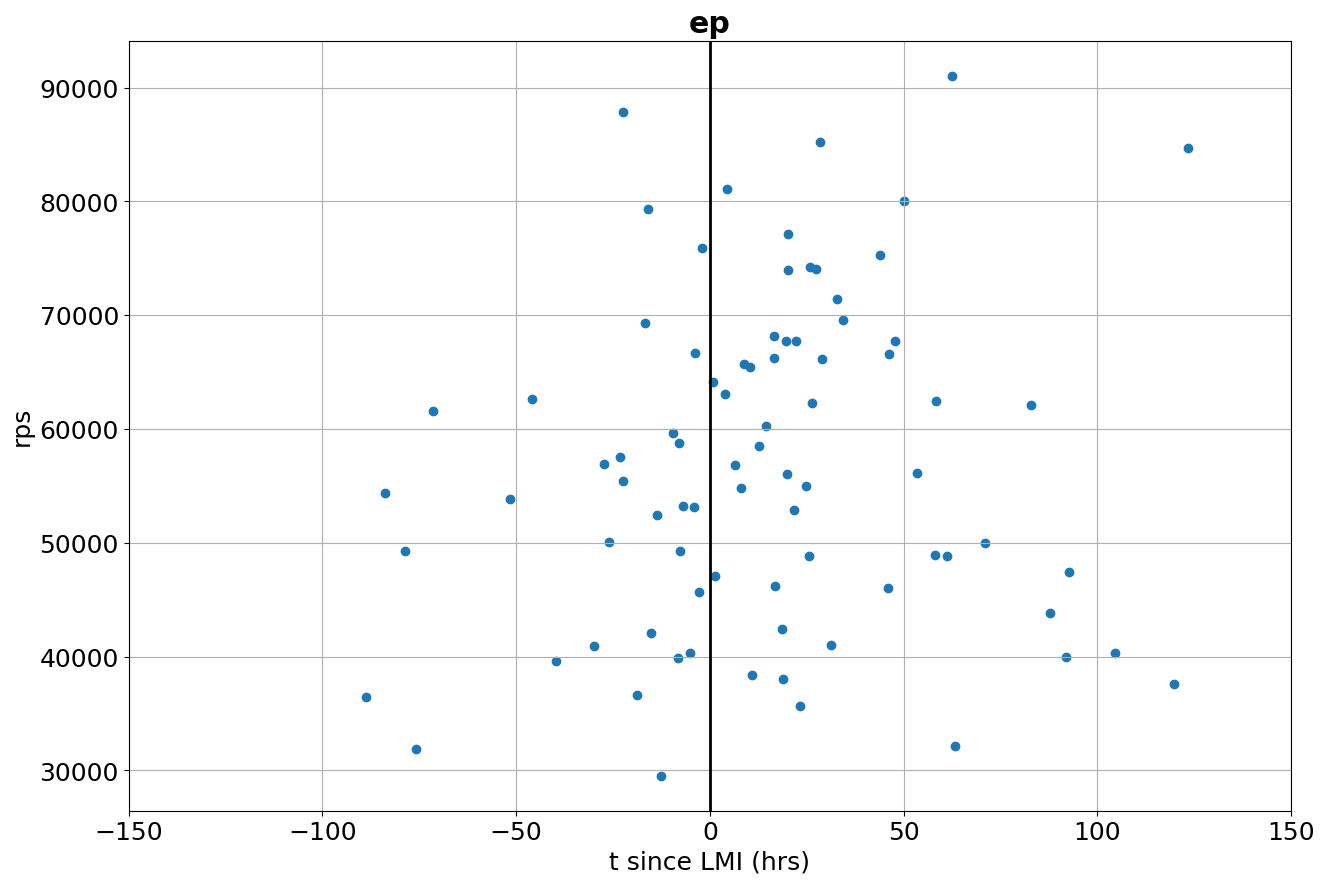

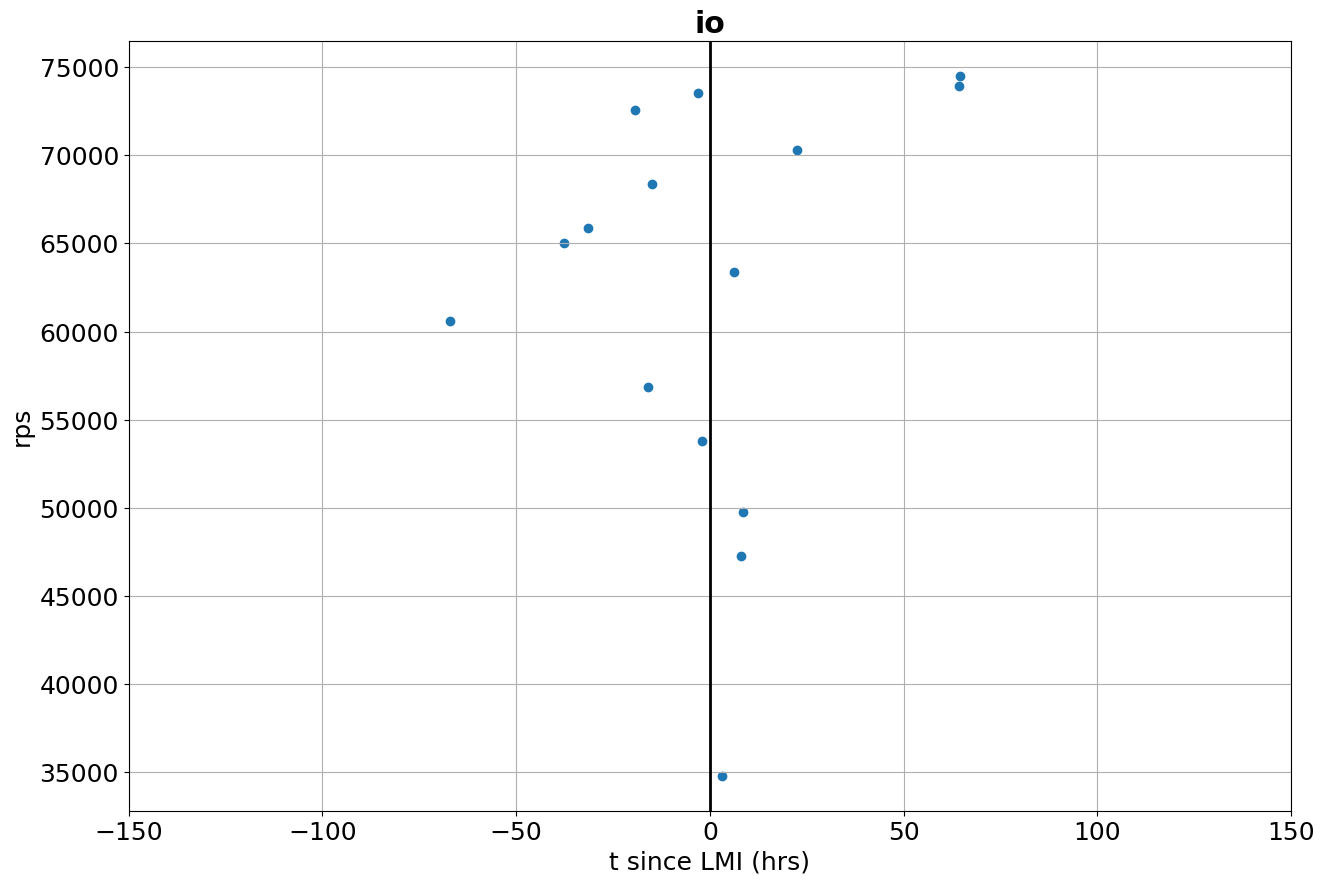

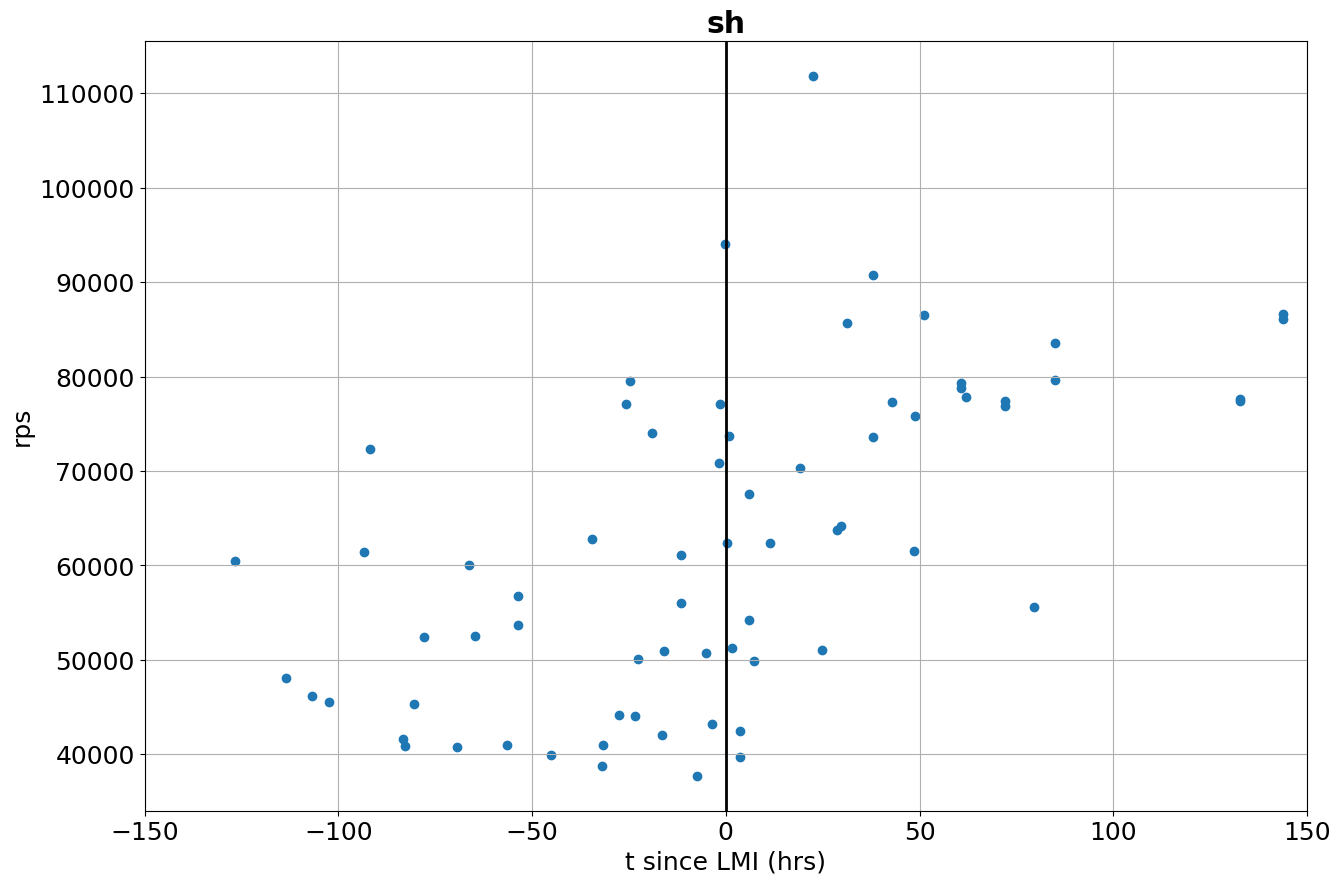

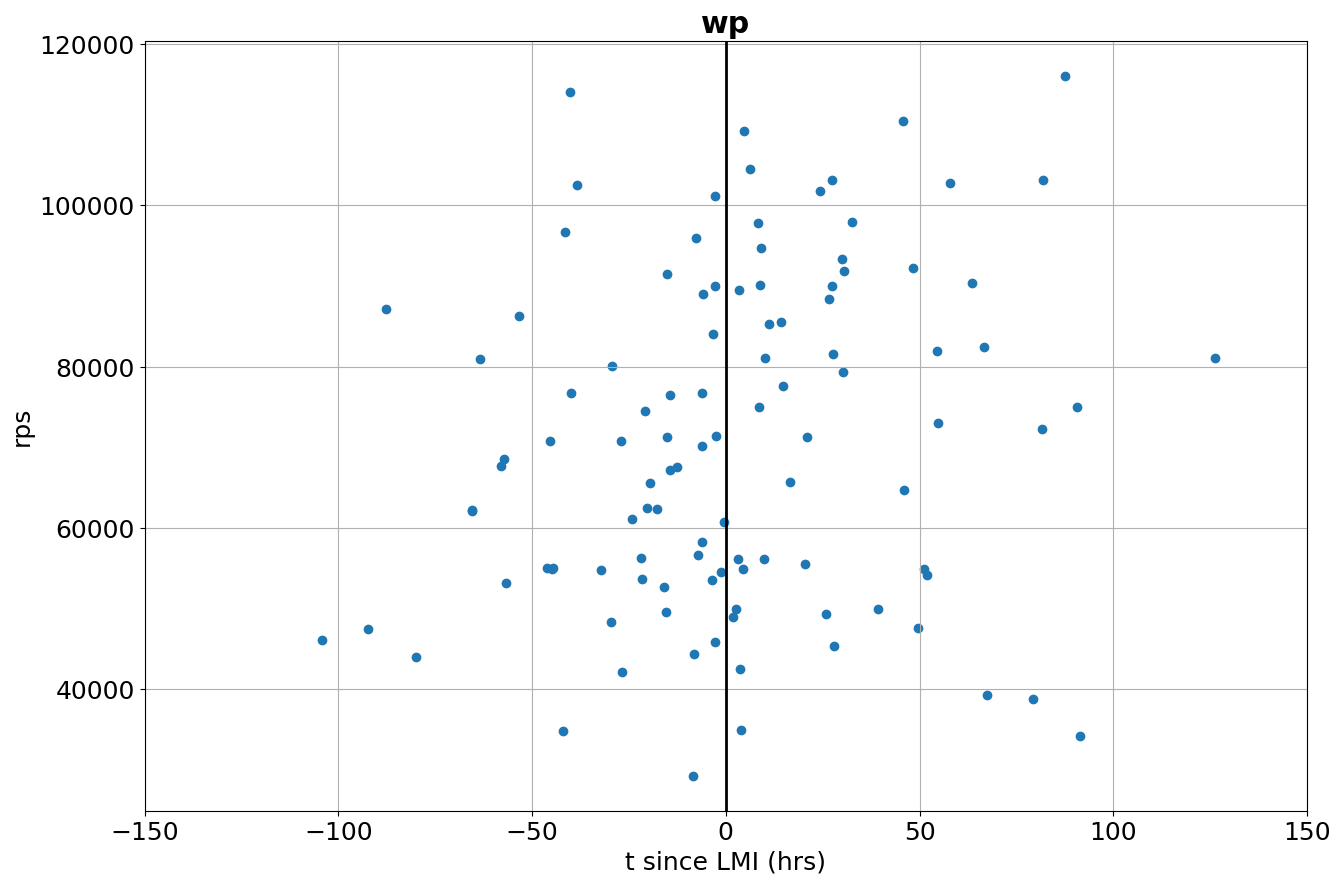

vps


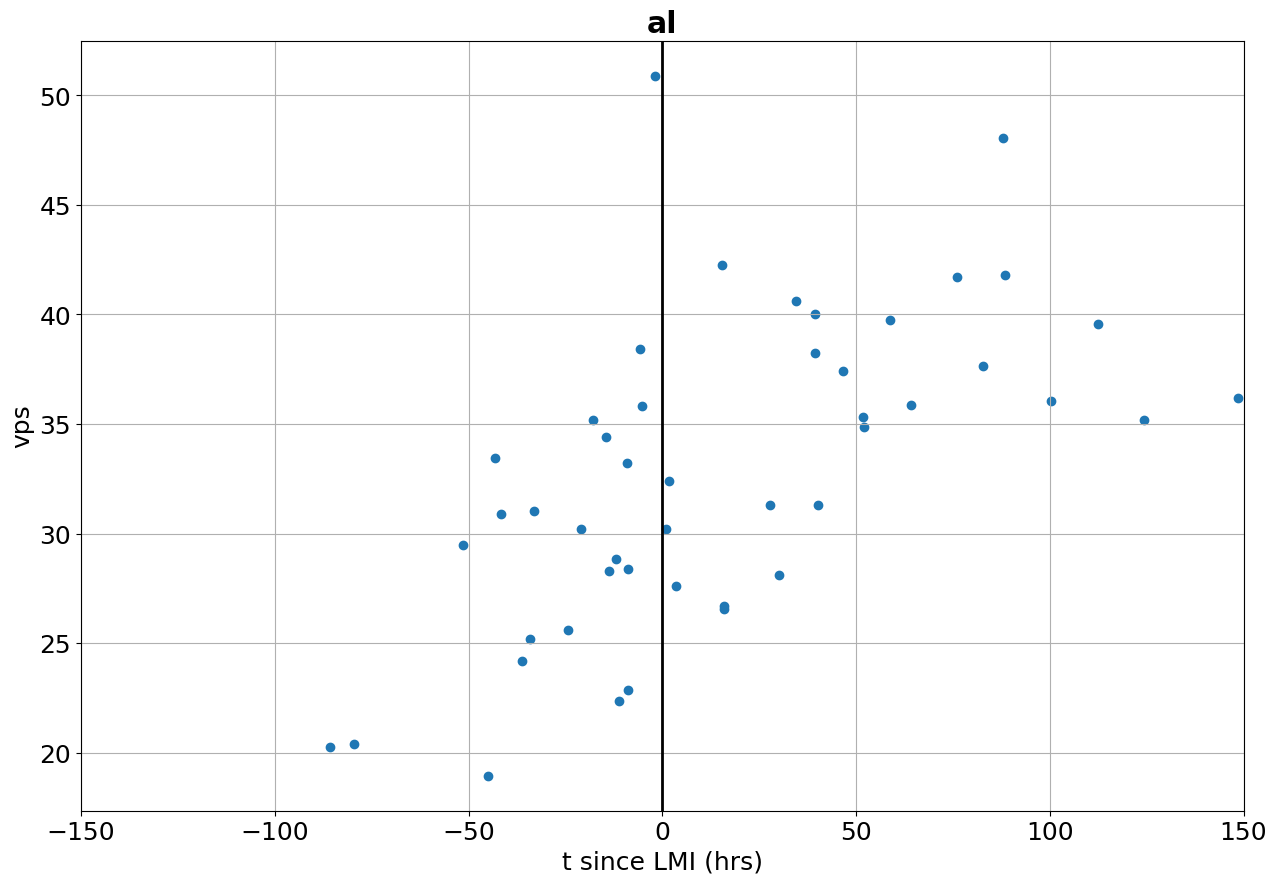

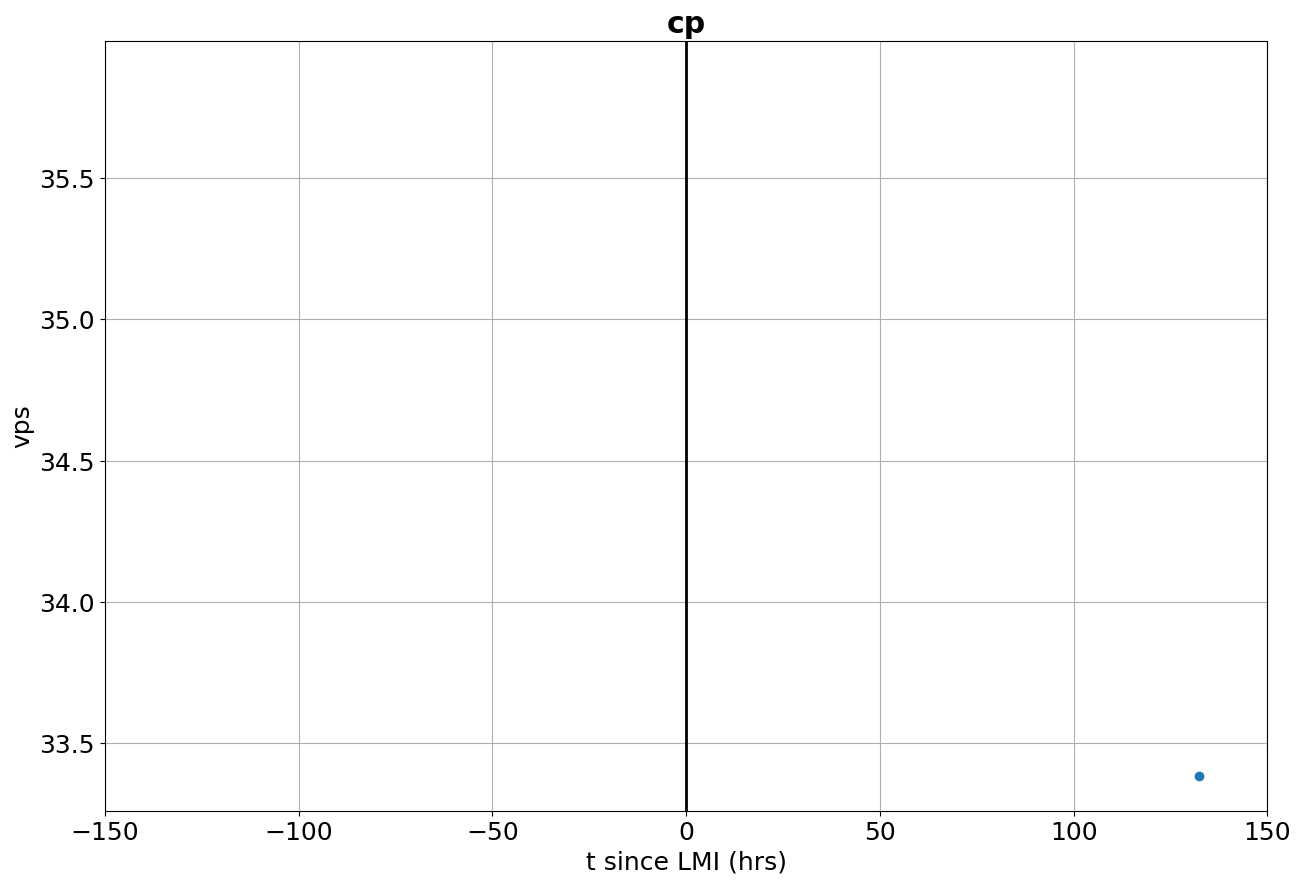

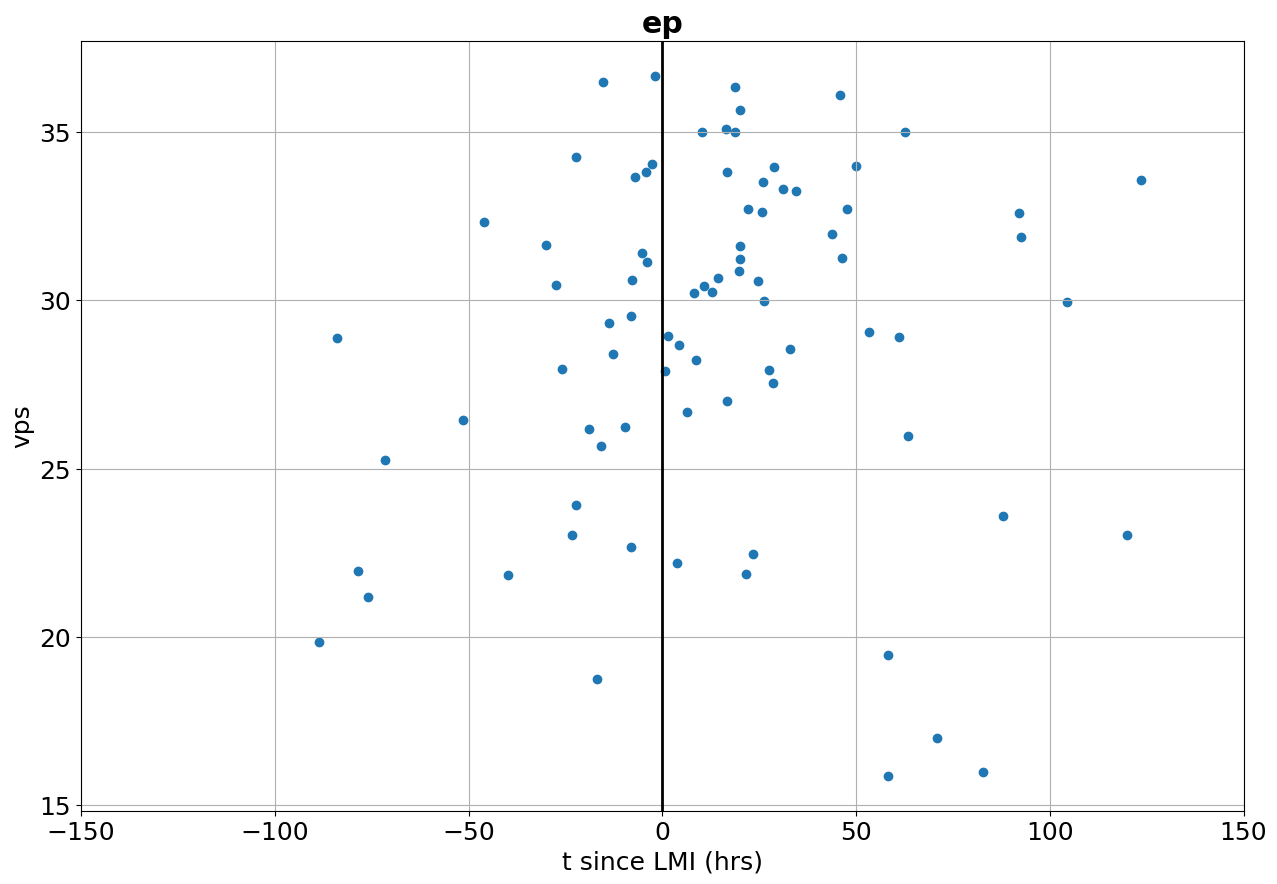

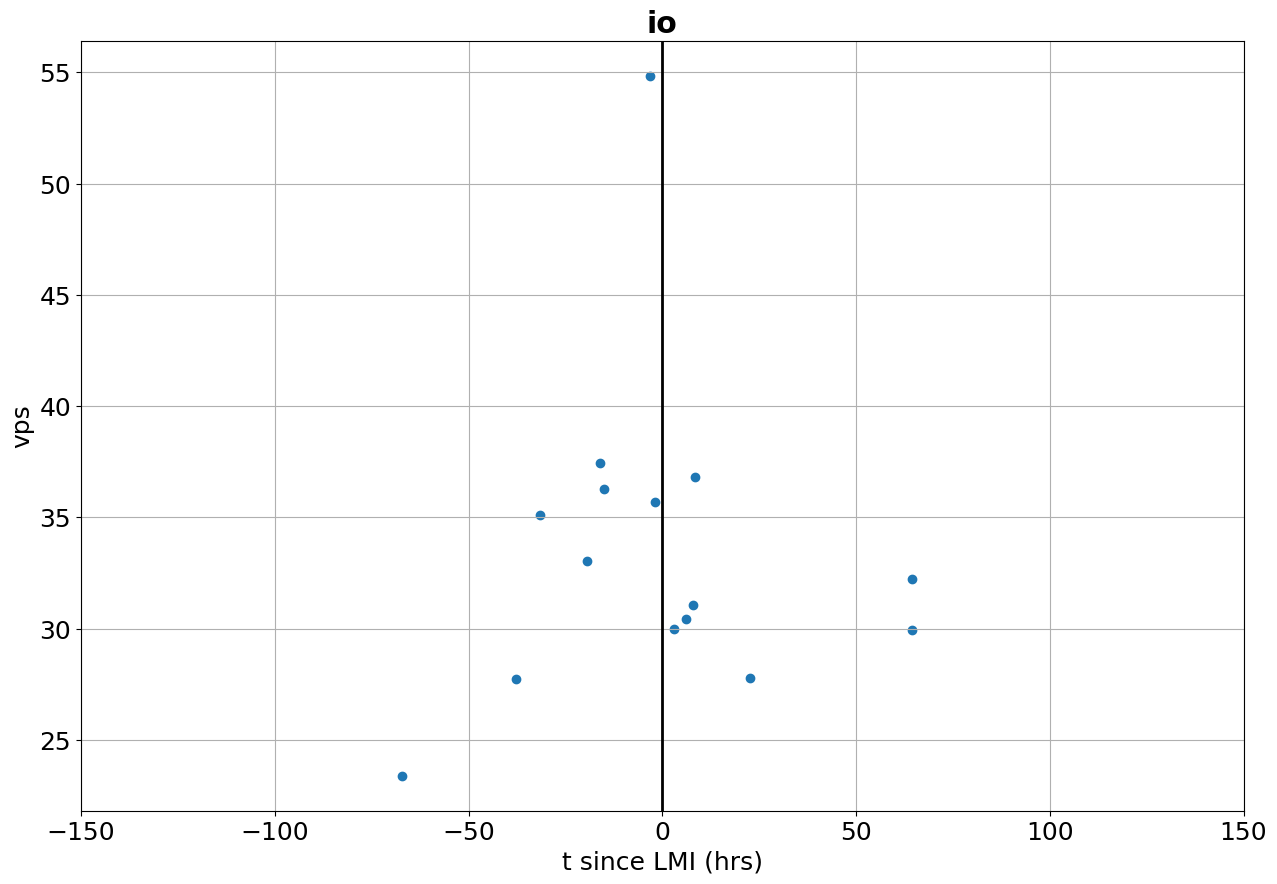

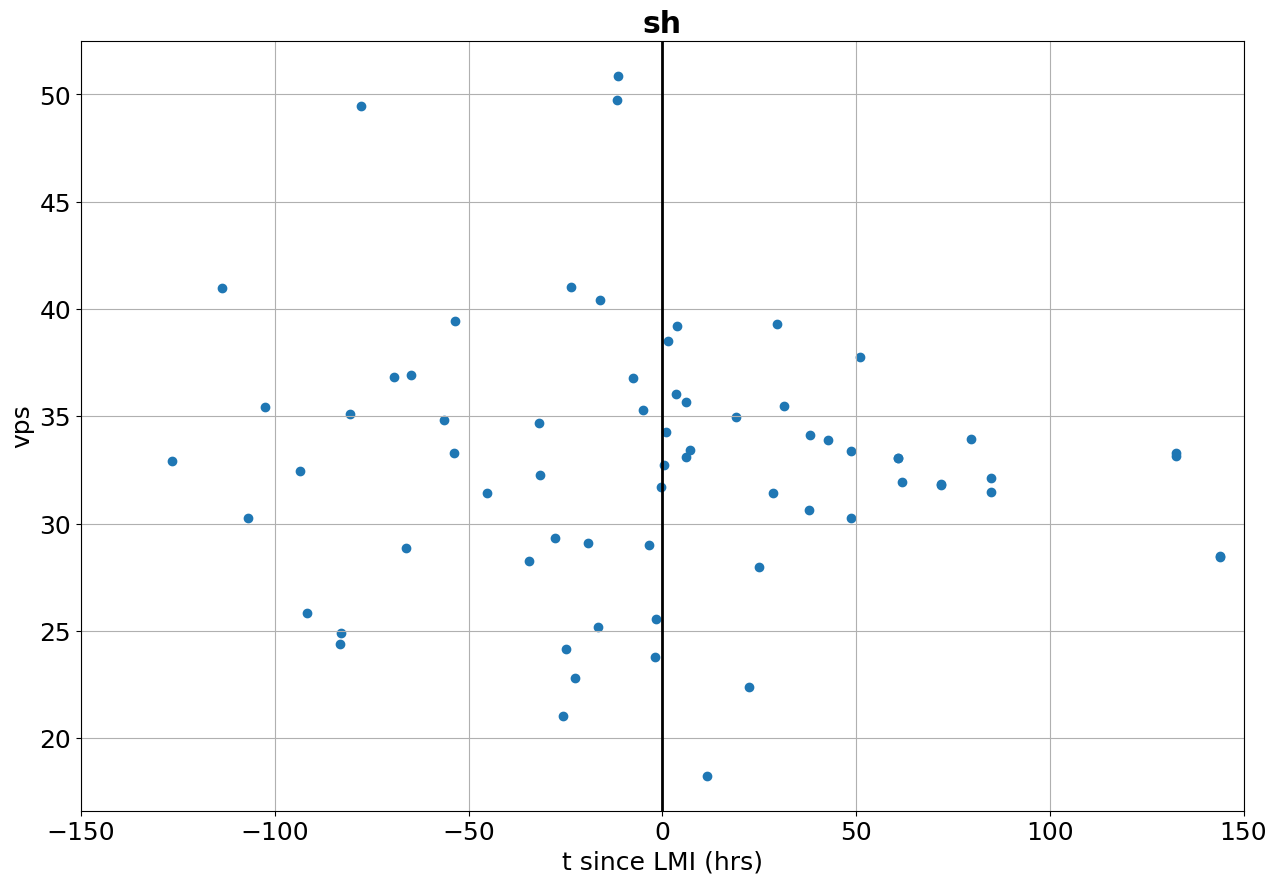

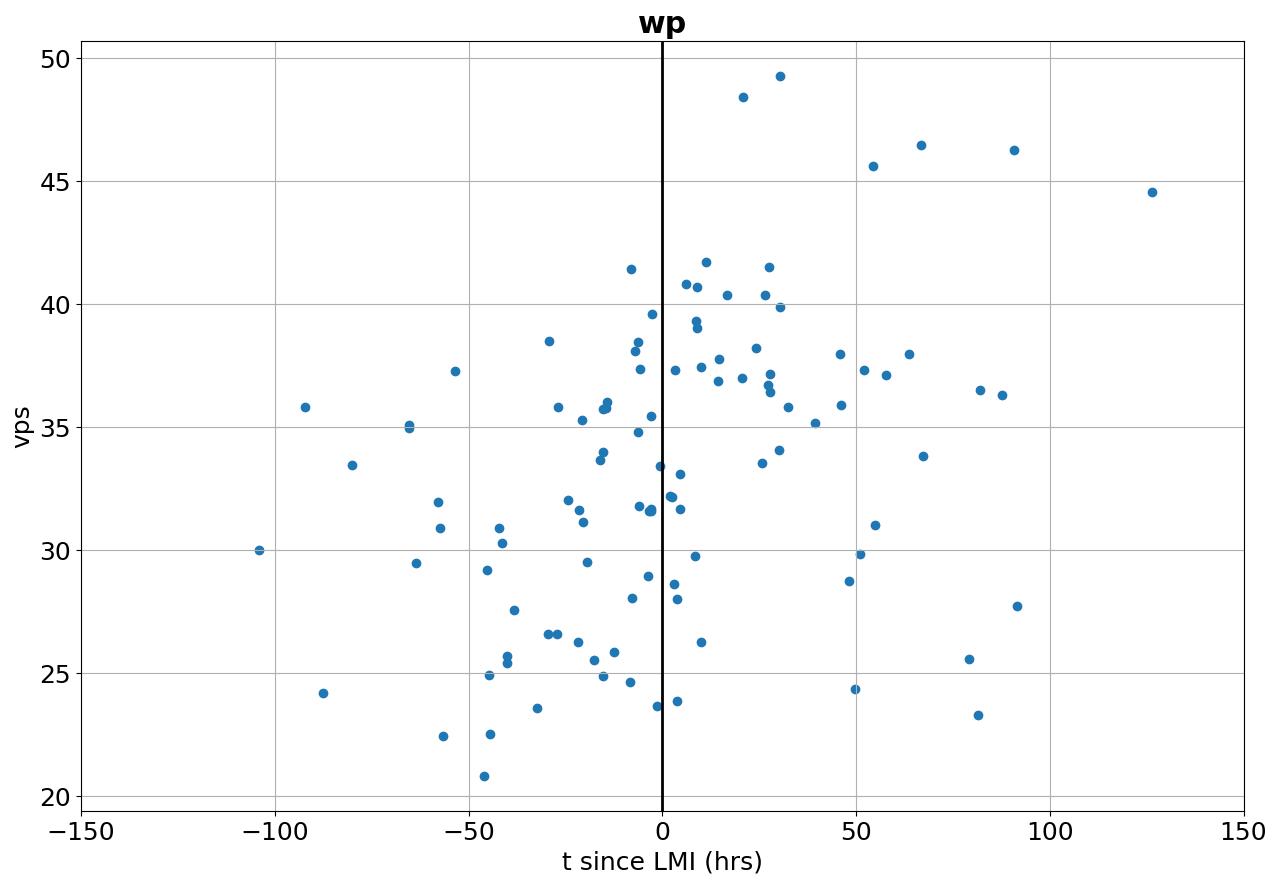

B_hol


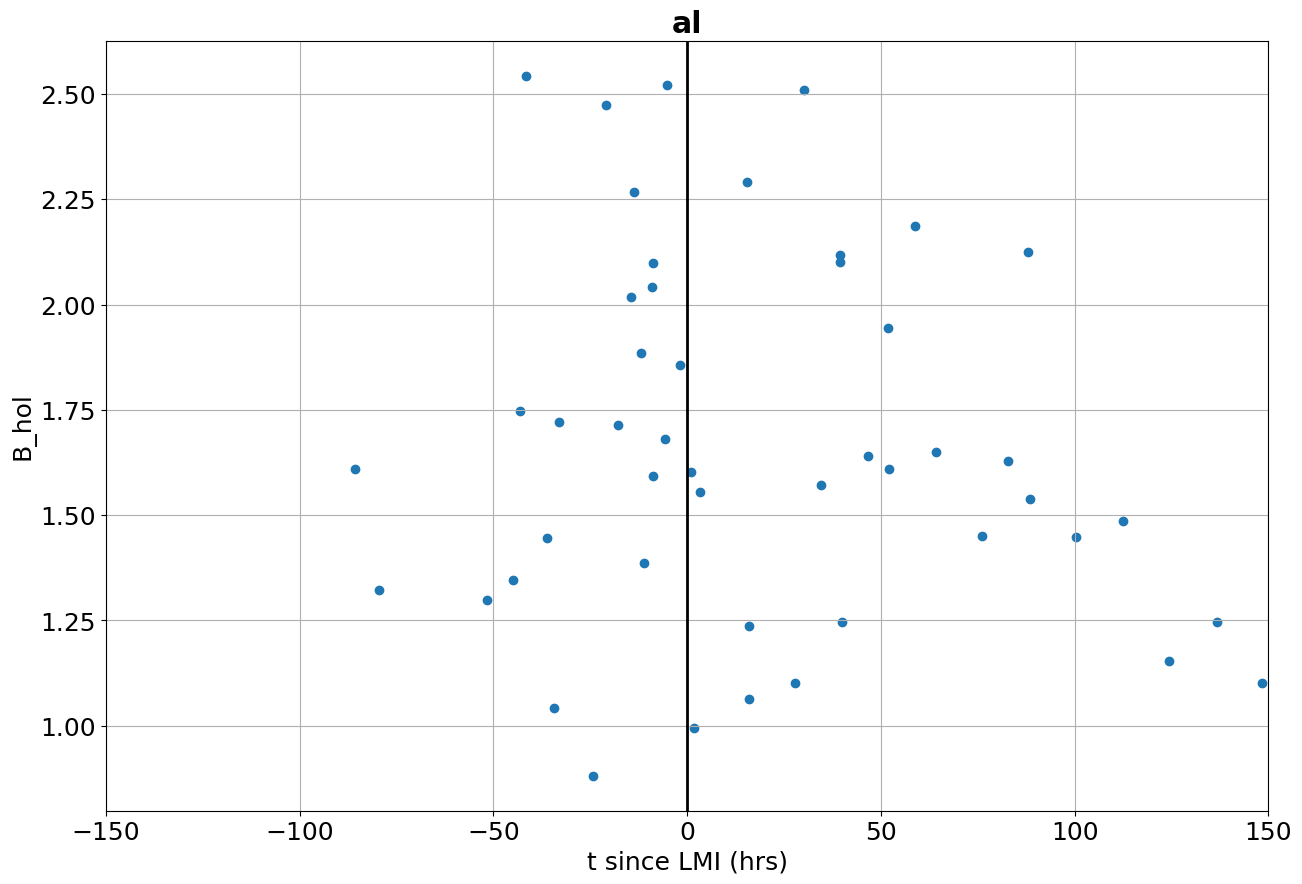

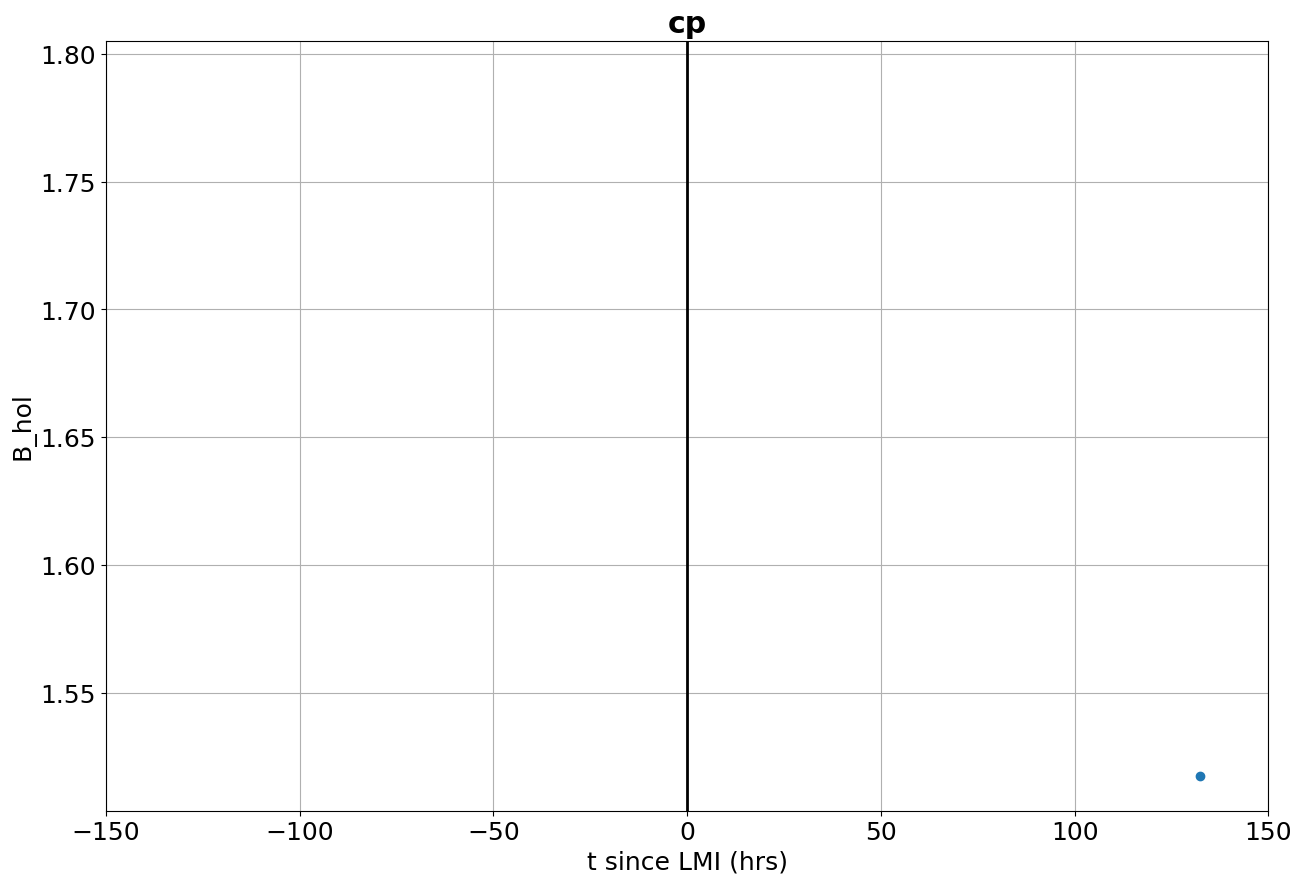

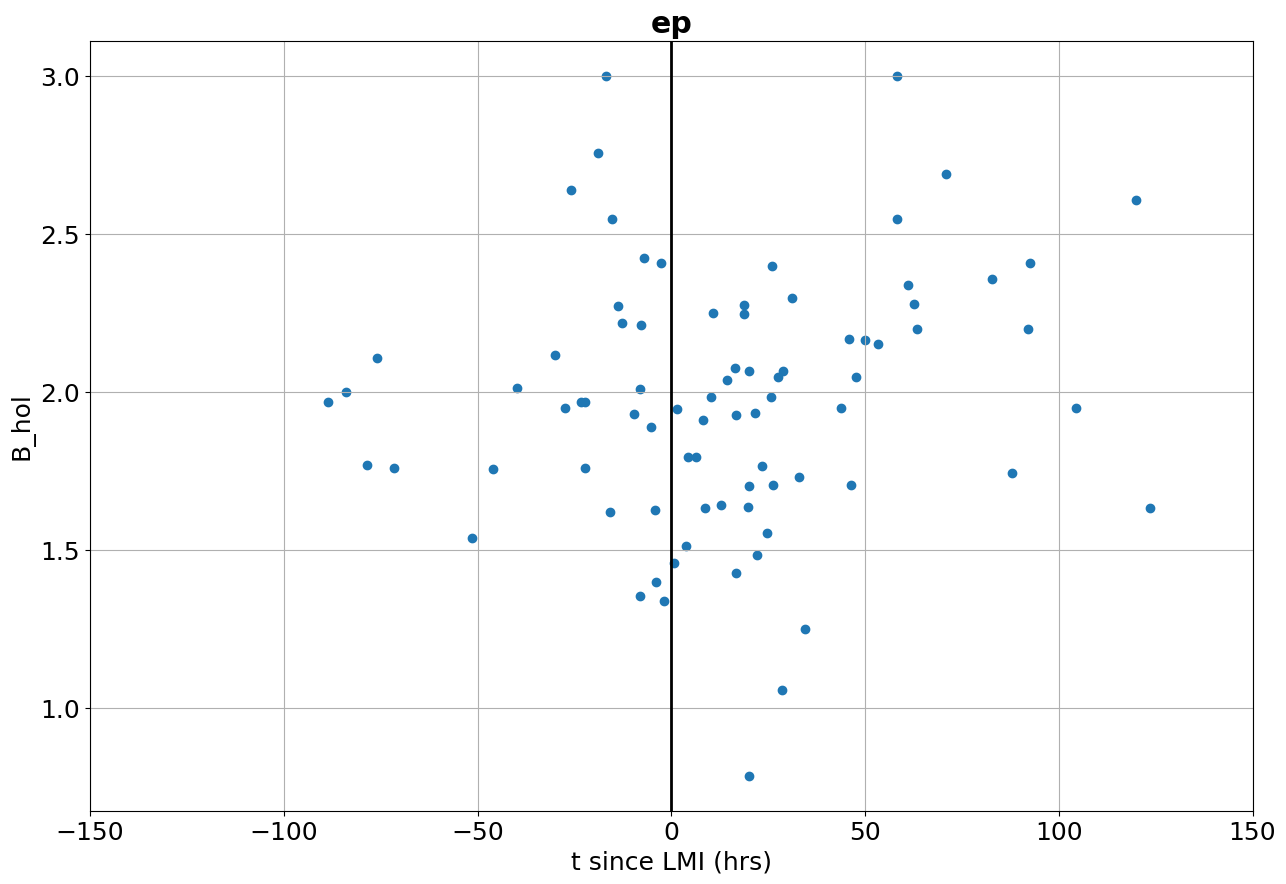

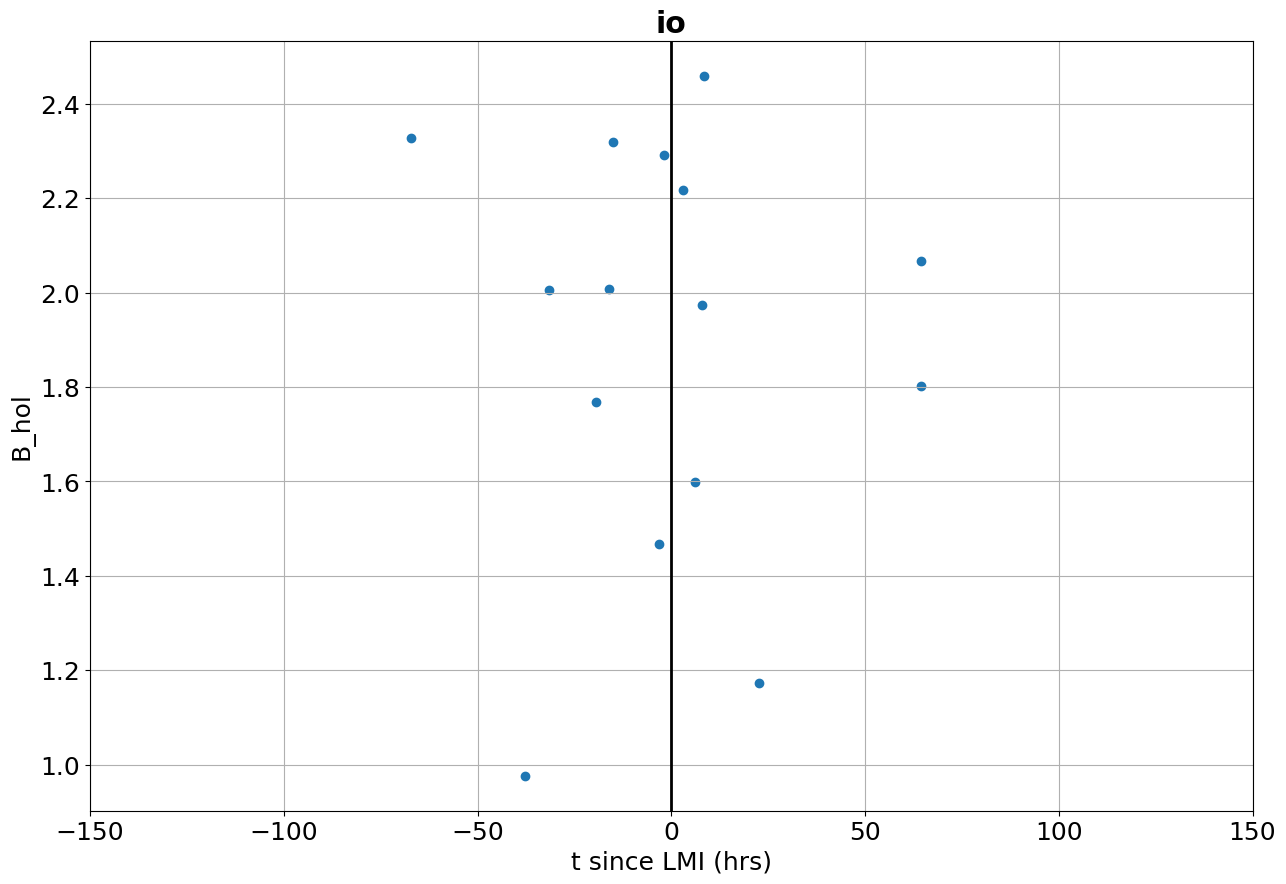

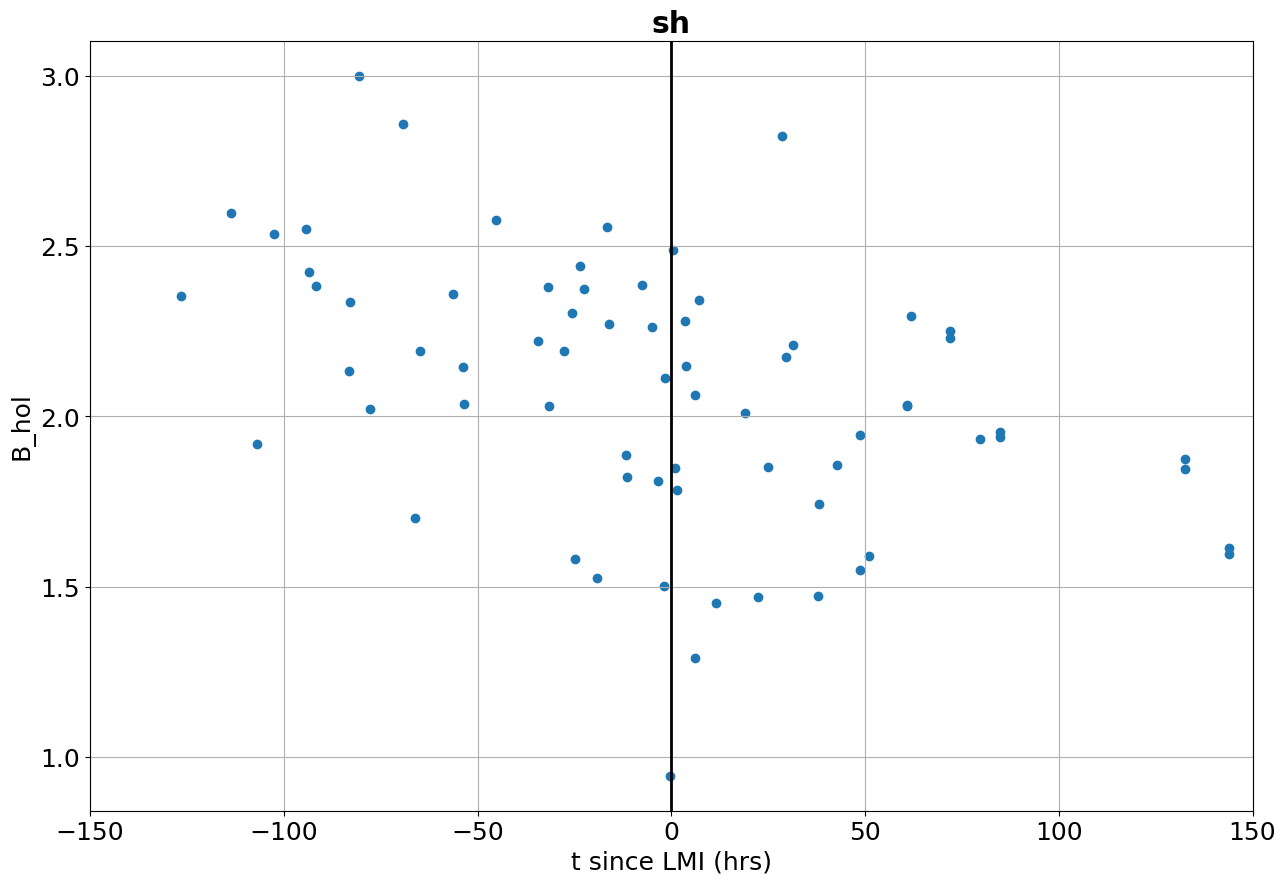

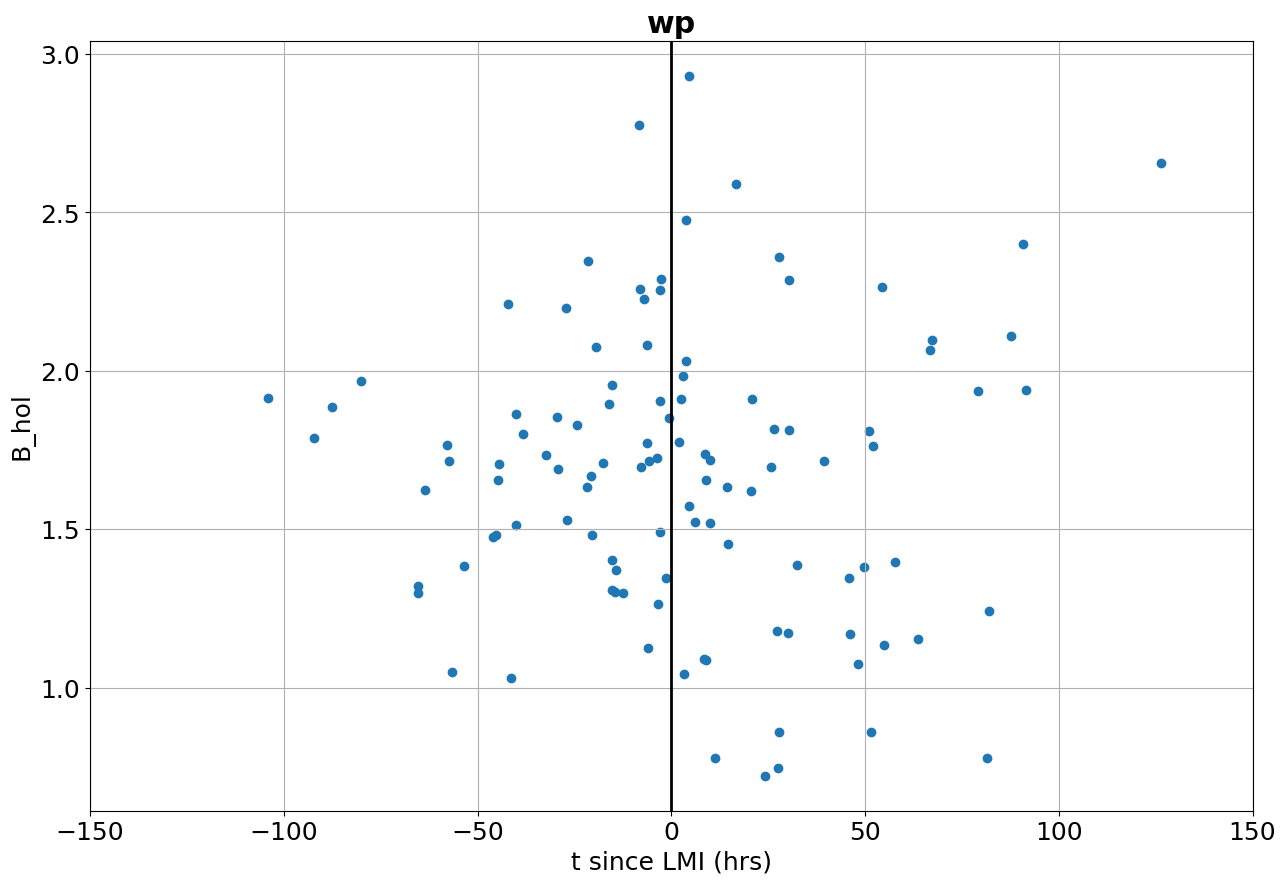

rsby


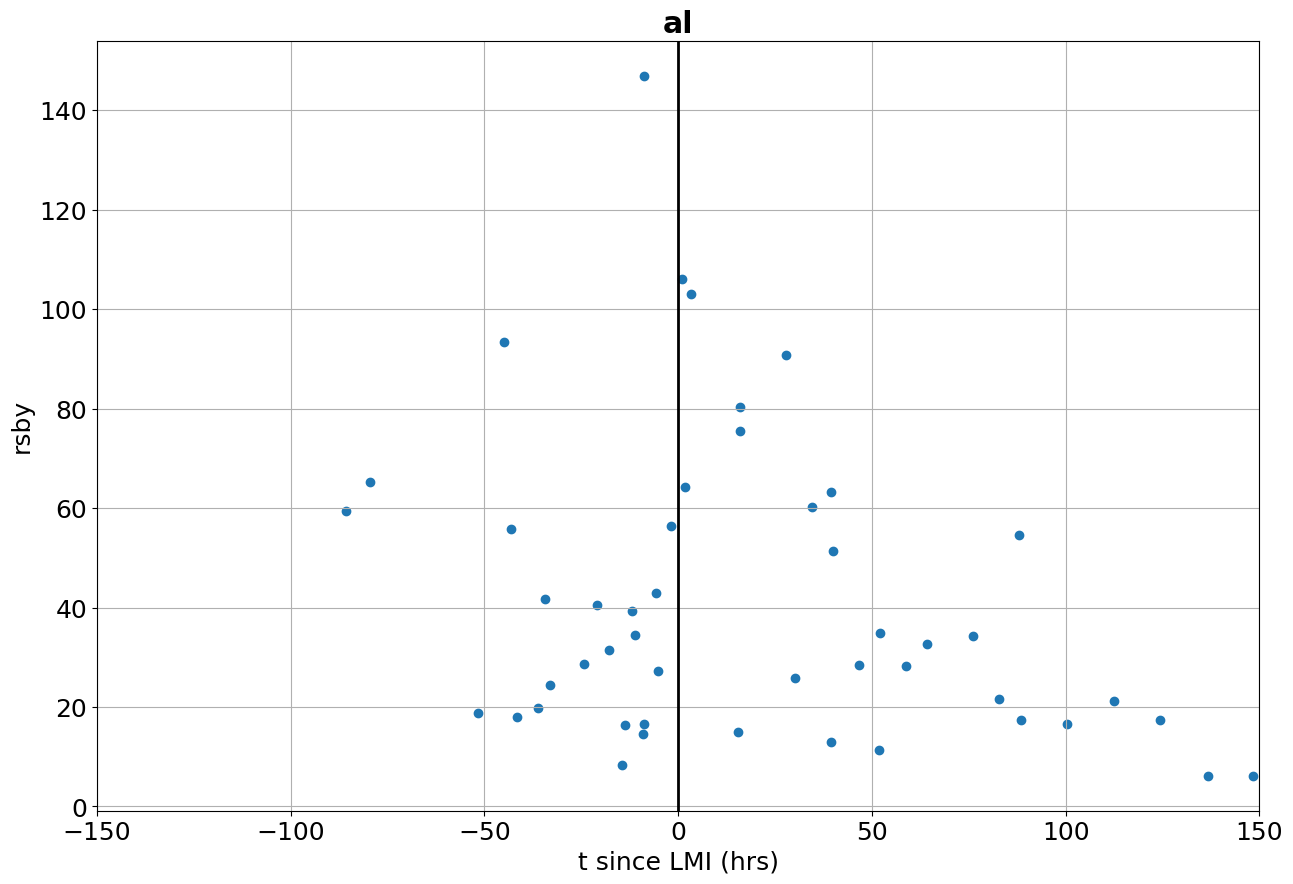

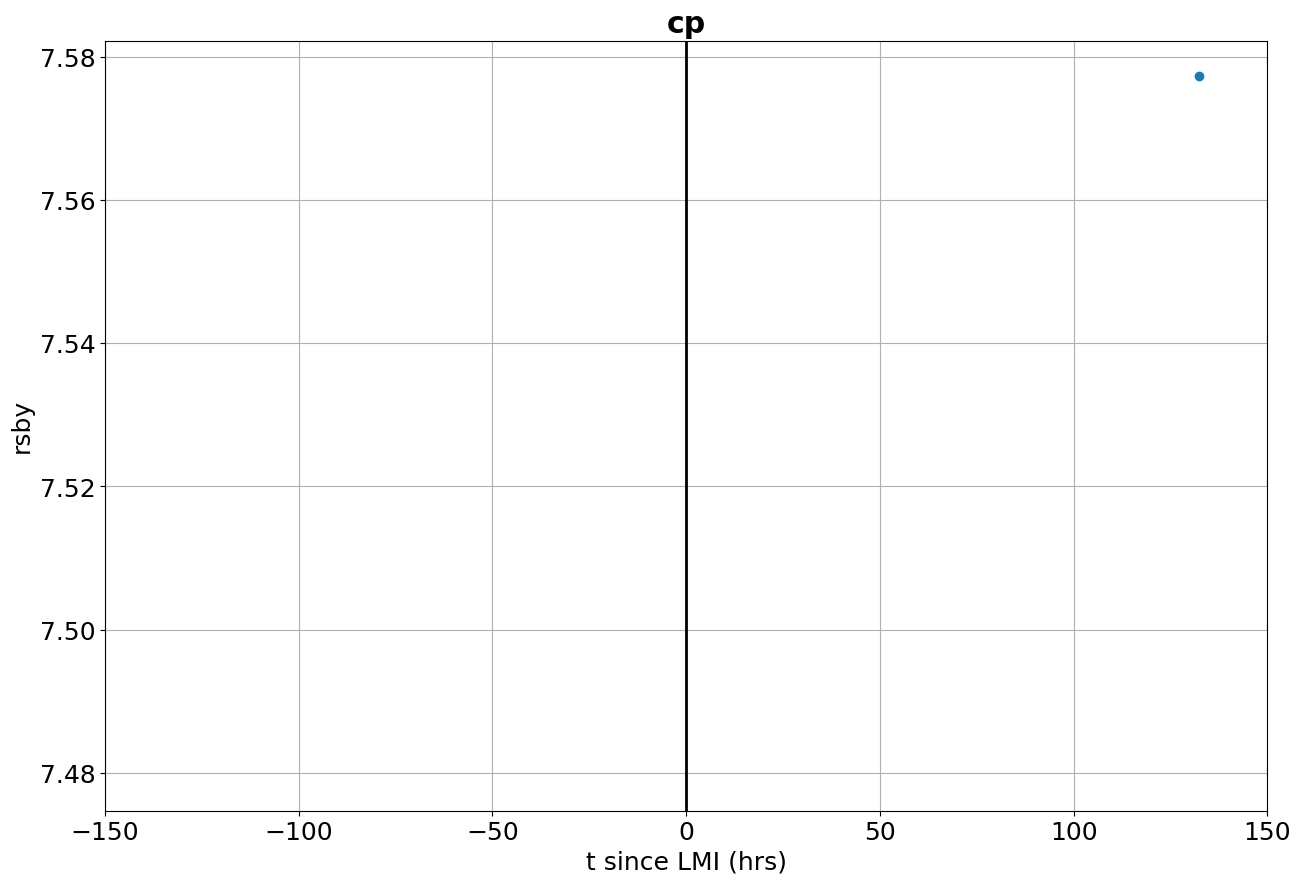

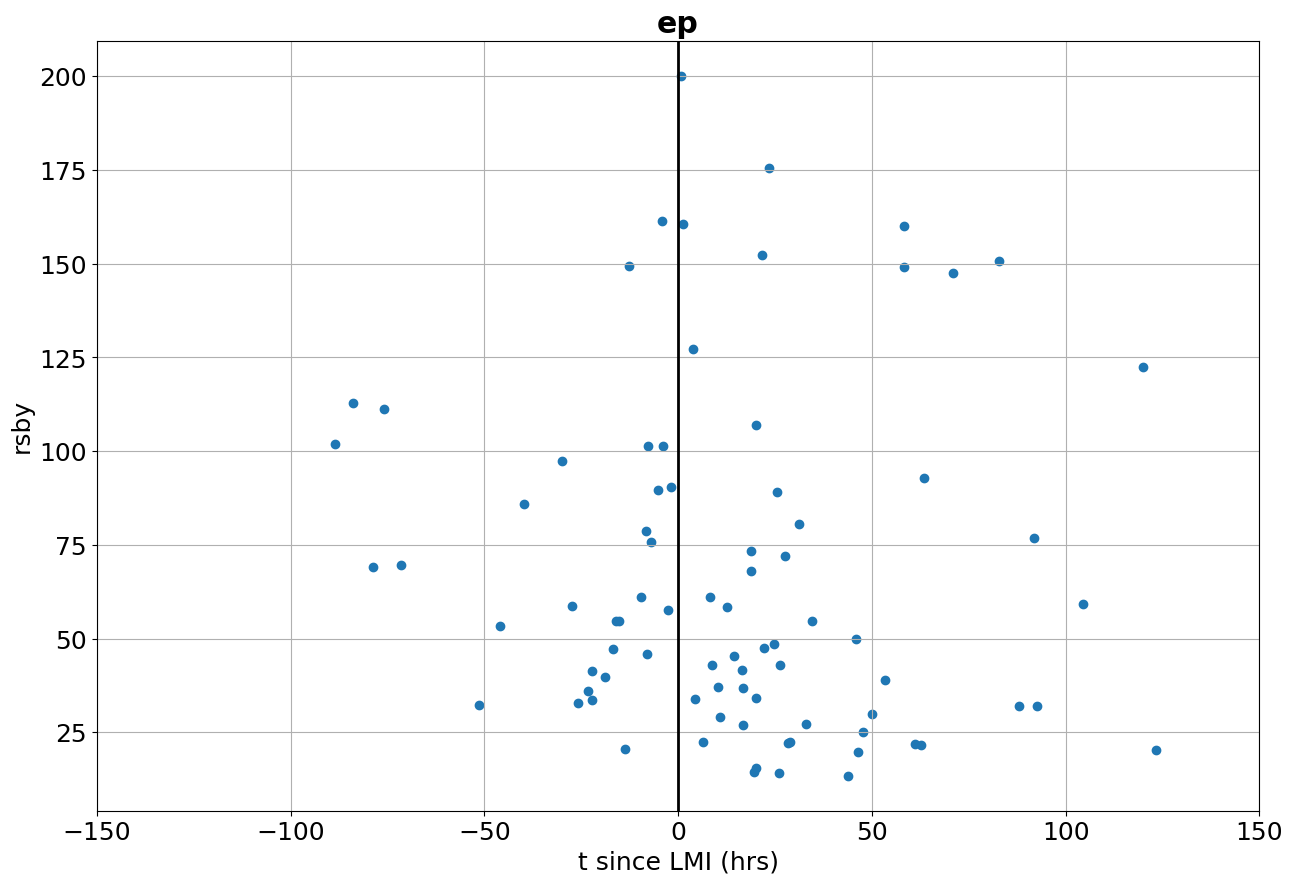

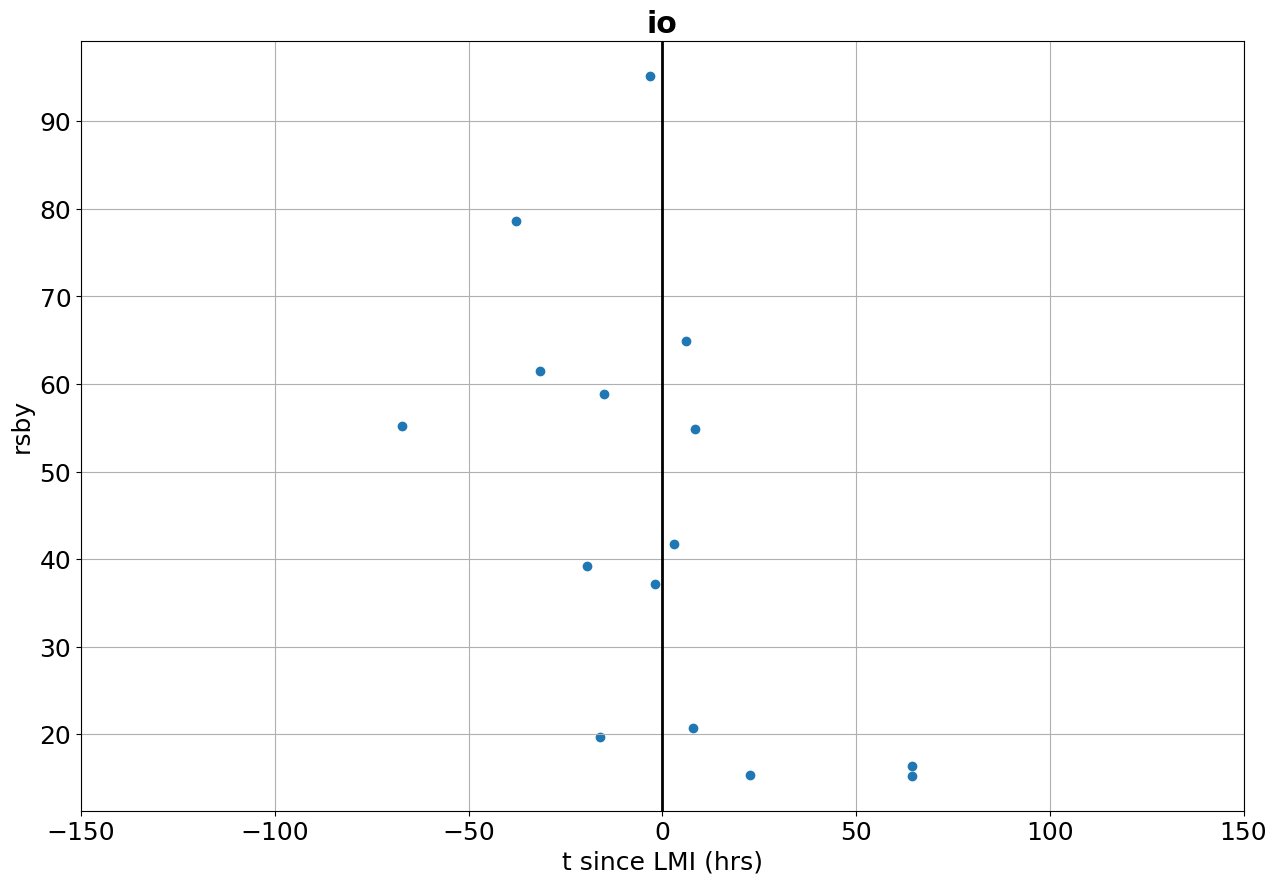

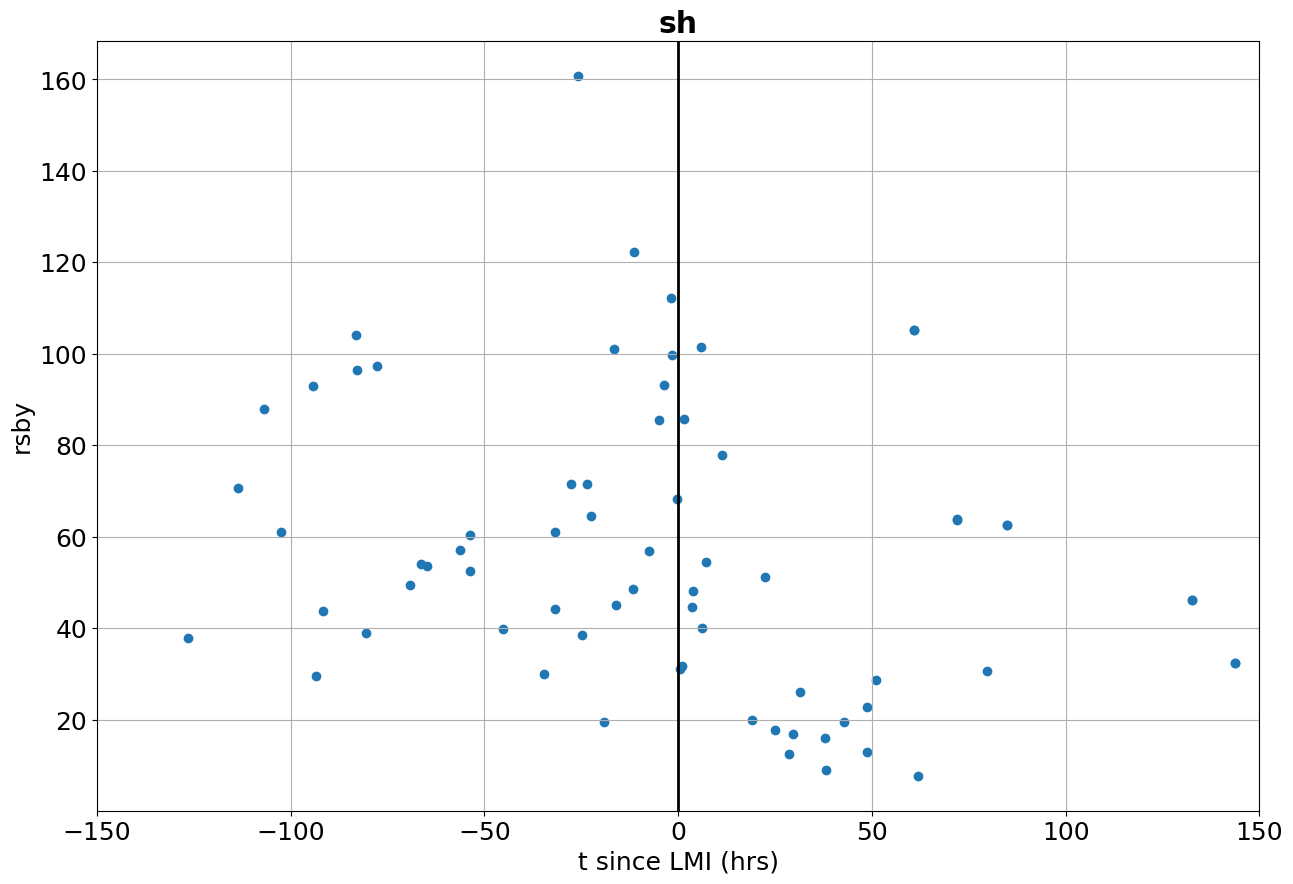

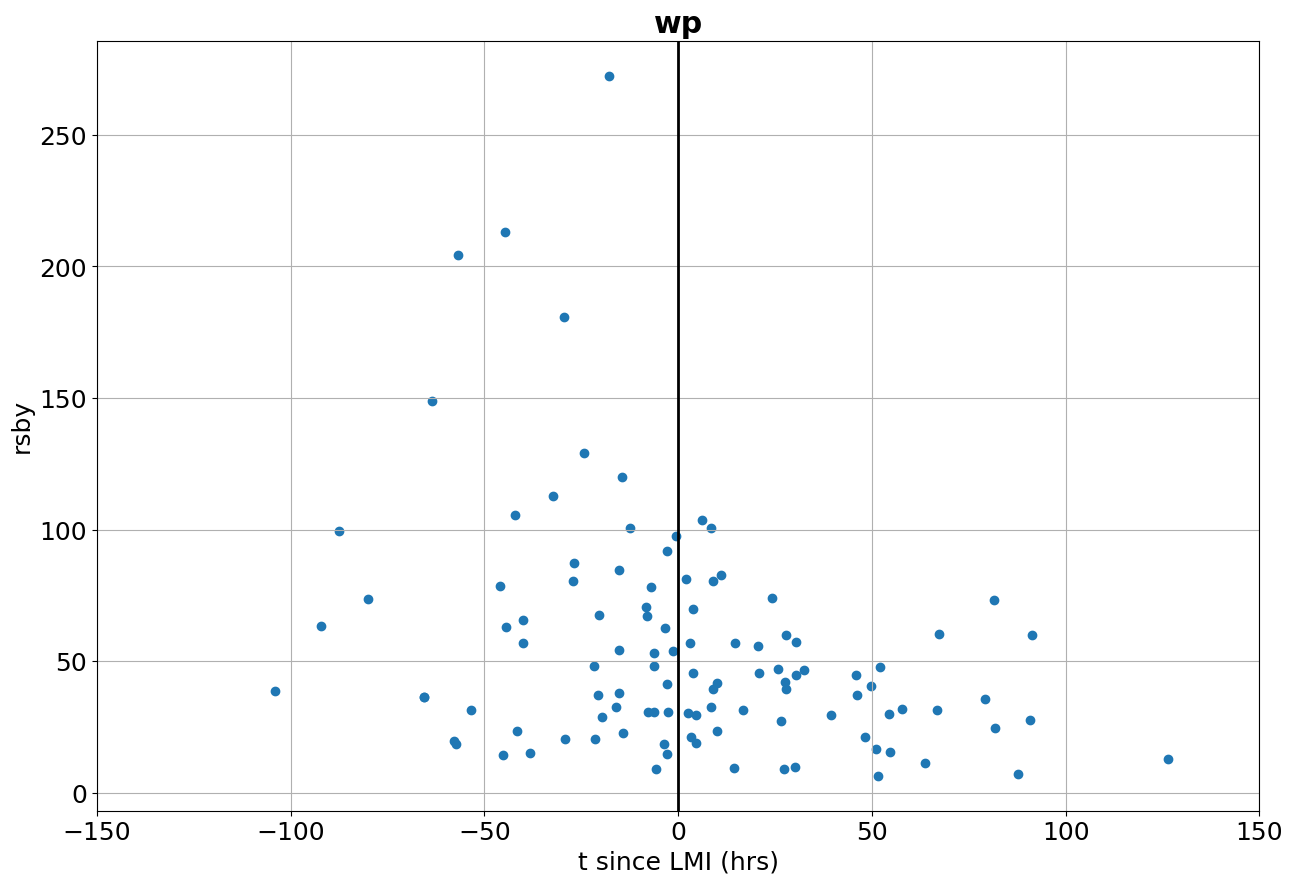

In [40]:
for prm in ['vmx', 'rmx', 'fcor', 'r34', 'r50', 'r64', 'uc', 'rps', 'vps', 'B_hol', 'rsby']:
    print(prm)
    for d_basin in [da, dc, de, di, ds, dw]:
        plt.title(np.unique(d_basin.basin).item(), weight='bold')
        plt.scatter(d_basin.t_since_lmi_ibt / 3600, d_basin[prm])
        plt.axvline(0, c='k', linewidth=2)
        plt.xlabel('t since LMI (hrs)')
        plt.ylabel(prm)
        plt.xlim(-150, 150)
        plt.grid()
        plt.show()